# libraries

In [258]:
library(plyr)
library(dplyr)
library(ggplot2)
library(ggalluvial)
library(reshape2)
library(stringr)

library(FactoMineR)
library(RColorBrewer)
library(plotly)
library(htmlwidgets)
library(tidyr)
library(ggforce)
library(data.table) 

In [2]:
library(permute)
library(lattice)
library(ade4)
library(vegan)
library(ape)


Attaching package: ‘ade4’


The following object is masked from ‘package:FactoMineR’:

    reconst


This is vegan 2.6-4


Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where




In [3]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:plotly’:

    select


The following object is masked from ‘package:dplyr’:

    select




In [4]:

library(pheatmap)

#library(ggformula)

library(gridExtra)

library(ggpubr)
library(ggExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ggpubr’


The following object is masked from ‘package:ape’:

    rotate


The following object is masked from ‘package:plyr’:

    mutate




## these should be selected based on the healthy datasets

In [5]:
# Prepare colours
# colours of ES
all_es_names = c("SS_g__Streptococcus", "SS_g__Prevotella", "SS_g__Neisseria", "SS_g__Rothia", "SS_g__Actinomyces", "SS_g__Porphyromonas")#, "SS_g__Veillonella", "SS_g__Fusobacterium", "SS_Enterococcaceae;g__GGB10485" ,"SS_g__Isoptericola" , "SS_g__Corynebacterium" )
# es2Col = c("#808000", "#FFEF00", "#C0C0C0", "#D55E00", "#023e8a", "#b52b5e") 
es2Col = c("#E69F00", "#009E73", "#483838", "#D55E00", "#023e8a", "#b52b5e")#, "#b59e8b", "#7f9c65", "#615C99", "#56B4E9", "#984ea3")
names(es2Col) = all_es_names

# colours of age categories
#age_cats = setNames(mdmx$AgeCat2, mdmx$SmplID)
#age2col = c("#E8C547", "#0c1b33", "#ee4266", "#00F0B5")
#names(age2col) = unique(age_cats)



In [6]:
# genera appearing in at least 4% of one ES across all ES nb
all_genera_4pc = c("g__Actinomyces", "g__Rothia", "g__Isoptericola", "g__Porphyromonas", "g__Prevotella", "g__Gemella", "g__Granulicatella", "g__GGB10485", "g__Streptococcus", "g__Eubacteriales_Family_XIII_Incertae_Sedis_unclassified", "g__Veillonella", "g__Parvimonas", "g__Fusobacterium", "g__Neisseria", "g__Haemophilus", "others")
# colours of genera 
#g4_colours = c("#FFFF33", "#ffa54d", "#ff7f00", "#FF9933", "#cc6600", "#994c00", "#ffb266", "#2e692c", "#3e8c3b", "#71bf6e", "#4daf4a", "#4b8bbf", "#d7e5f1", "#afcbe3", "#9bbfdc" , "#D3D3D3")
g4_colours = c("#FFFF33", "#ffa54d", "#ff7f00", "#FF9933", "#cc6600", "#994c00", "#ffb266", "#2e692c", "#3e8c3b", "#71bf6e", "#4daf4a", "#4b8bbf", "#d7e5f1", "#afcbe3", "#9bbfdc", "#73a5cd", "#2c6593", "#377eb8", "#5295cb", "#0b1925", "#214c6e", "#16324a", "#A65628", "#a260ac", "#5b2f62", "#b783bf", "#984ea3", "#7a3e82", "#3d1f41", "#c195c8", "#d6b8da", "#e94849", "#D3D3D3")
names(g4_colours) = all_genera_4pc



In [7]:
# colours of phyla 
all_phyla = c("p__Actinobacteria", "p__Bacteroidetes", "p__Firmicutes", "p__Fusobacteria", "p__Proteobacteria" , "others")
#phyla_cols = c("#CBEAA6", "#CBEAA6", "#CBEAA6", "#006D77", "#D3C2CE" , "#CBEAA6")
phyla_cols = c("#CBEAA6", "#CBEAA6", "#CBEAA6", "#006D77", "#D3C2CE", "#CBEAA6", "#CBEAA6", "#CBEAA6", "#CBEAA6", "#006494","#247BA0","#1B98E0","#0099E0", "#CBEAA6", "#CBEAA6", "#FF8A5B", "#CBEAA6", "#CBEAA6", "#CBEAA6", "#CBEAA6", "#CBEAA6", "#CBEAA6", "#1B98E0")
names(phyla_cols) = all_phyla

# functions 

In [8]:
setwd("/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/")

In [9]:
# Read and normalise abundance matric
read_normalise_abmatrix <- function(f) {
    # read abundance matrix
    mx = as.matrix(read.table(f, header=TRUE, row.names=1, sep="\t"))
    print(paste0("Data loaded: ", nrow(mx), " taxa, ", ncol(mx), " samples. "))
    # remove unknown bact
    #mx = mx[!rownames(mx) %in% c("?", "?;?;?;?;?;?","?;?;?;?;?","?;?;?;?","?;?;?","?;?"),]
    # print how many removed bact
    #print(paste0("After removing unknown taxa: ", nrow(mx) , " taxa, ", ncol(mx), " samples. "))
    # remove bact that were never observed
    #mx = mx[rowSums(mx > 0) > 0,]
    # print how many removed bact
    #print(paste0("After removing non-observed taxa: ", nrow(mx), " taxa, ", ncol(mx), " samples. "))
    # remove samples that were not observed
    #mx = mx[,colSums(mx > 0) > 0]
    # print how many removed samples
    #print(paste0("After removing unobserved samples: ", nrow(mx), " taxa, ", ncol(mx), " samples. "))
    # normalize by sum of all reads in a sample (i.e. column)
    #mx_norm = sweep(mx,2,colSums(mx),"/")
    head(mx)
    mx_norm <- mx
    head(mx_norm)
    return(mx_norm)
}

In [10]:
# retrieve the nth element of each item in a list
n_elem_list <- function(lst, n){
         sapply(lst, `[`, n)
   }


In [11]:
# Shorten the names of taxa by keeping only the genus if not duplicated in the name vector
shorten_genus <- function(genus, genera_list){
    shorten <- gsub(".*;([^\\;?]+[;\\?]*)$", "\\1", genus, perl = TRUE)
    # print(paste("shorten ", shorten))
    # count how many times the shorten version of the genus appears in the vector
    if (grepl( ";", shorten, fixed = TRUE)) {
        nb_occ <- sum(str_count(genera_list, coll(shorten)))
    } else {
        nb_occ <- sum(str_count(genera_list, sprintf("\\b%s\\b", shorten)))
    } 
    # print(paste("nbocc ", nb_occ))
    # count how many times the shorten version of the genus appears in the shorten version of all x in the vector
    if (grepl( ";", shorten, fixed = TRUE)) {
        nb_occ2 <- sum(str_count(gsub(".*;([^\\;?]+[;\\?]*)$", "\\1", genera_list), coll(shorten)))
    } else {
        nb_occ2 <- sum(str_count(gsub(".*;([^\\;?]+[;\\?]*)$", "\\1", genera_list), sprintf("\\b%s\\b", shorten)))
    } 
    # print(paste("nbocc2 ", nb_occ2))
    shorten2= ifelse(nb_occ2 > 1, gsub(".*;([a-zA-Z0-9-\\?]+;[a-zA-Z0-9-\\?]+;[a-zA-Z0-9-\\?]+)$", "\\1", genus, perl = TRUE), shorten)
    # print(paste("shorten ", shorten))
    return(ifelse(nb_occ == 1, shorten, ifelse(nb_occ2 ==1, gsub(".*;([a-zA-Z0-9-]+;[a-zA-Z0-9-]+)$", "\\1", genus, perl = TRUE), shorten2)))
}

In [12]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
    library(grid)
    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)
    numPlots = length(plots)
    # If layout is NULL, then use 'cols' to determine layout
    if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                        ncol = cols, nrow = ceiling(numPlots/cols))
    }
    if (numPlots==1) {
    print(plots[[1]])
    } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
        # Get the i,j matrix positions of the regions that contain this subplot
        matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))  
        print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                        layout.pos.col = matchidx$col))
        }
    }
}


In [13]:
# JensenShannon distance caculation
dist.JSD <- function(inMatrix, pseudocount=0.000001, ...) {
    KLD <- function(x,y) sum(x *log(x/y))
    JSD<- function(x,y) sqrt(0.5 * KLD(x, (x+y)/2) + 0.5 * KLD(y, (x+y)/2))
    matrixColSize <- length(colnames(inMatrix))
    matrixRowSize <- length(rownames(inMatrix))
    colnames <- colnames(inMatrix)
    resultsMatrix <- matrix(0, matrixColSize, matrixColSize)

    inMatrix = apply(inMatrix,1:2,function(x) ifelse (x==0,pseudocount,x))

    for(i in 1:matrixColSize) {
    for(j in 1:matrixColSize) { 
        resultsMatrix[i,j]=JSD(as.vector(inMatrix[,i]),
                                as.vector(inMatrix[,j]))
    }
    }
    colnames -> colnames(resultsMatrix) -> rownames(resultsMatrix)
    as.dist(resultsMatrix)->resultsMatrix
    attr(resultsMatrix, "method") <- "dist"
    return(resultsMatrix) 
}


In [14]:
# Plot the content of ES 
es_content <- function(W_mat, es2col) {
    # W_mat is p x r (p: features, r: signatures)
    # normalize W by col (sum of expression of all features in a sig = 1)
    W = sweep(W_mat,2,colSums(W_mat),"/") # W is now n x r (n: measured features (bact) in row, r: signatures in columns)
    cat(colSums(W))
    es2Col = c("#E69F00", "#483838", "#009E73", "#56B4E9", "#023e8a", "#B0437F", "#D55E00", "#D8EEFD", "#615C99", "#6C6F7F", "#FF9E51", "#FCACD8")
    es2col = es2col[colnames(W)]
    # plot
    par(las = 1, mar = c(5.1, 15.1, 2.1, 2.1));
    sigPickup=0.04 #originally 0.05
    m = W[rowSums(W >= sigPickup) > 0,]
    plot(0, pch = "", ylim = c(0, nrow(m)+1), xlim = c(0, ncol(m)+1), yaxt="n", axes = F, xlab = "", ylab ="") 
    axis(1, 1:ncol(m), colnames(m))
    rn = gsub(".*;([^\\;?]+[;\\?]*)$", "\\1", row.names(m), perl = TRUE)
    axis(2, 1:nrow(m), rn, cex.axis=0.8)
    abline(h=1:nrow(m), col="gray", lty=3)
    for(i in 1:ncol(m)) {
    use = m[,i] > 0.01
    if (length(use)==0 || sum(use)==0){next}
    points(rep(i, nrow(m))[use], (1:nrow(m))[use], col = es2col[i], cex = 10*m[use,i], pch = 19)
    points(rep(i, nrow(m))[use], (1:nrow(m))[use], cex = 10*m[use,i])
    text(rep(i, nrow(m))[use] + max(m[,i])/4, (1:nrow(m))[use], paste0(round(100*m[use,i]), "%"), pos = 4, cex = 0.8, col = "black")
    }
}

In [15]:
setwd("/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test/")

In [16]:
res_dir0 <- "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test"

In [17]:
nmf_data_dir <- "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test"

In [18]:
min_rank <- 6
max_rank <- 6

# read input files: 

In [259]:
setwd("/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/input_tsv/")

In [20]:
#res_dir0 <- "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/result_R_analysis"

In [260]:
abmatrix_file = "all_noncontrols_taxa.tsv"  # reading the abundance matrix

In [261]:
mx_norm <- read_normalise_abmatrix(abmatrix_file)

[1] "Data loaded: 279 taxa, 224 samples. "


In [262]:

head(mx_norm)
dim(mx_norm)

,SRR21765456,SRR21765466,SRR21765481,SRR21765484,SRR21765486,SRR21765496,ERR2764879,ERR2764880,ERR2764881,ERR2764878,⋯,SRR23512052,SRR23512047,SRR23512043,SRR23512039,SRR23512034,SRR23512222,SRR23512218,SRR23512214,SRR23512210,SRR23512205
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000,0.0000000,0.000000000,0.0000000,0.00000000,0.000000,0.000000e+00,0.00000000,0.00000000,0.000000
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000,0.0000000,0.000000000,0.0000000,0.00000000,0.000000,0.000000e+00,0.00000000,0.00000000,0.000000
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0006124001,0.0005421003,0.0004201996,0.0004811999,⋯,0.0002585,0.0003311,0.001940801,0.0013582,0.00000000,0.000000,4.789999e-05,0.00000000,0.00000000,0.000000
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.0185155,0.04010099,0.0049532,0.02911629,0.07818301,0.03057681,0.0220375022,0.0195570098,0.0292813736,0.0225340932,⋯,0.0414419,0.1170684,0.060282618,0.0358629,0.05975929,0.010397,2.861249e-02,0.01655159,0.02454589,0.020061
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000,0.0000000,0.000000000,0.0000000,0.00000000,0.000000,0.000000e+00,0.00000000,0.00000000,0.000000
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000,0.0018294,0.000000000,0.0000000,0.00000000,0.000000,0.000000e+00,0.00000000,0.00000000,0.000000


[1] 279 224

In [263]:
metadata_matrix = "noncontrols_meta(noNA).txt"

In [264]:
mdmx = as.data.frame(read.table(metadata_matrix, header=TRUE, sep="\t"))

In [265]:
head(mdmx)

,accession,sampleid,age,disease_status,sex,race.country,BMI
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA


In [266]:
colnames(mdmx)[colnames(mdmx) == "sampleid"] <- "SmplID"
head(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA


In [267]:
dim(mdmx)

[1] 275   7

In [268]:
mdmx <- mdmx[mdmx$SmplID %in% colnames(mx_norm),]
head(mdmx)
dim(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA


[1] 224   7

In [639]:
head(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3,age_category
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID,70s&more
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID,50s
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID,50s
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID,40s
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID,70s&more
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID,60s


In [648]:
dim(mdmx)
table(mdmx$sex)

[1] 224   9


  0   F   M 
  6 156  62 

In [652]:
table(mdmx$age_category)
sum(is.na(mdmx$age_category))


      19      20s      30s      40s      50s      60s 70s&more 
       4       56       49        2       13       38       56 

[1] 6

In [658]:
unique(mdmx$race.country)
table(mdmx$race.country)
sum(is.na(mdmx$race.country))

[1] "white"                    "black"                   
[3] "France"                   "Brazil: Amazonas, Manaus"
[5] "Japan "                   "Turkey"


                   black Brazil: Amazonas, Manaus                   France 
                       1                        6                       57 
                  Japan                    Turkey                    white 
                      46                      109                        5 

[1] 0

In [662]:
head(mdmx)
dim(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3,age_category
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID,70s&more
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID,50s
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID,50s
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID,40s
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID,70s&more
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID,60s


[1] 224   9

In [663]:
mdmx1 <- mdmx %>%
  mutate(BMI_category = case_when(
    BMI < 25 ~ "normal_weight",
    BMI >= 25 & BMI < 30 ~ "over_weight",
    BMI >= 30 ~ "obese", 
    TRUE ~ NA_character_  # Default value if none of the conditions are met
  ))
head(mdmx1)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3,age_category,BMI_category
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<chr>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID,70s&more,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID,50s,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID,50s,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID,40s,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID,70s&more,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID,60s,NA


In [666]:
unique(mdmx1$BMI_category)
table(mdmx1$BMI_category)
sum(is.na(mdmx1$BMI_category))


[1] NA              "normal_weight" "over_weight"   "obese"


normal_weight         obese   over_weight 
           88            27            51 

[1] 58

In [665]:
sum(is.na(mdmx$BMI))

[1] 58

In [653]:
table(mdmx$age)
#sum(is.na(mdmx$age_category))


19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 44 49 50 53 54 55 
 4  4  8  6  4  6  7  9  7  5  7  7  5  5  1  4  8  4  6  2  1  1  1  5  2  5 
60 62 63 64 65 67 68 69 70 73 76 79 80 91 
 1  5  6  5  1  5  5 10 46  6  1  1  1  1 

In [270]:
# colours of (disease)age categories : at first u need to modify meta data
age_cats = setNames(mdmx$disease_status, mdmx$SmplID ) #, mdmx$sex)
unique(age_cats)


[1] "COVID"              "colorectal cancer"  "small adenoma"     
[4] "periodontitis"      "PDAC"               "full-term delivery"
[7] "pre-term delivery"  "pre-eclampsia"

In [271]:
age2col <- c("#C0FF3E", "#0000EE", "#EE6A50", "#9A32CD","#458B00", "#EE2C2C", "#FF6EB4", "#2E8B57")
age2col_pch <- c("21", "24", "25", "26", "27", "28", "29","0")

In [272]:
names(age2col) = unique(age_cats)
names(age2col_pch) = unique(age_cats)

In [273]:
mdmx <- mdmx %>% mutate(sex = ifelse(is.na(sex), 0, sex))
unique(mdmx$sex)

[1] "F" "M" "0"

In [274]:
sex_cats = setNames(mdmx$sex, mdmx$SmplID ) 
head(sex_cats)
sex2col = c("#ee4266", "#00F0B5", "#8B8682")
names(sex2col) = unique(sex_cats)


SRR21765456 SRR21765466 SRR21765481 SRR21765484 SRR21765486 SRR21765496 
        "F"         "M"         "M"         "F"         "F"         "M"

In [275]:
getwd()


[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/input_tsv"

In [276]:
nmf_data_dir <- "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test"

In [277]:
nmf_data = list()
ranks = c(min_rank:max_rank)

for (rank in ranks){
    rank = as.character(rank)
    
    H_path = paste0(nmf_data_dir, '/', rank, '_H.tsv')
    W_path = paste0(nmf_data_dir, '/', rank, '_W.tsv')

    nmf_data[[rank]] <- list()

    current_H <- as.matrix(transpose(read.table(H_path, sep = '\t')))
    current_W <- as.matrix(read.table(W_path, sep = '\t'))

    colnames(current_H) <- colnames(mx_norm)
    rownames(current_W) <- rownames(mx_norm)

    nmf_data[[rank]][['H']] <- current_H
    nmf_data[[rank]][['W']] <- current_W
    }

# ANALYSIS 

In [278]:
setwd("/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test")

In [279]:
# retrieve the phyla of each genus
phyla_mx = n_elem_list(str_split(rownames(mx_norm), ";"),2)
names(phyla_mx) = rownames(mx_norm)
phyla_mx = as.factor(phyla_mx)



In [280]:

head(phyla_mx)

k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949 
                                                                                                 p__Euryarchaeota 
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter 
                                                                                                 p__Euryarchaeota 
           k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum 
                                                                                                p__Actinobacteria 
             k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces 
                                                                                                p__Actinobacteria 
             k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea 
                                                                                                p__Actinobacteria 
                 k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835 
                                                                                                p__Actinobacteria 
17 Levels: p__Actinobacteria p__Ascomycota ... p__Tenericutes

In [281]:
# PCoA of samples abundances
#print("Calculating Bray-Curtis distance matrix, this may take a while...")
mx_norm.bray <- vegdist(t(mx_norm), "bray") # bray-curtis distance


In [282]:
str(mx_norm.bray)

 'dist' num [1:24976] 0.681 0.623 0.641 0.758 0.545 ...
 - attr(*, "maxdist")= num 1
 - attr(*, "Size")= int 224
 - attr(*, "Labels")= chr [1:224] "SRR21765456" "SRR21765466" "SRR21765481" "SRR21765484" ...
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "bray"
 - attr(*, "call")= language vegdist(x = t(mx_norm), method = "bray")


In [283]:
head(mx_norm.bray)

[1] 0.6813762 0.6231919 0.6414077 0.7584793 0.5447902 0.7492250

In [284]:
mx_norm.b.pcoa <- stats::cmdscale(mx_norm.bray, k=(ncol(mx_norm)-1), eig=TRUE)

Warning message in stats::cmdscale(mx_norm.bray, k = (ncol(mx_norm) - 1), eig = TRUE):
“only 104 of the first 223 eigenvalues are > 0”


In [46]:
head(scores(mx_norm.b.pcoa, choices=c(1,3)))

,Dim1,Dim3
SRR21765456,0.2092211,0.02943314
SRR21765466,0.2109088,0.07352483
SRR21765481,0.2388132,-0.04702505
SRR21765484,0.1332855,-0.06830315
SRR21765486,-0.1945827,0.09960756
SRR21765496,0.1650821,0.02477096


In [285]:
head(scores(mx_norm.b.pcoa, choices=c(1,2)))

,Dim1,Dim2
SRR21765456,0.2092211,-0.32783505
SRR21765466,0.2109088,-0.03505336
SRR21765481,0.2388132,-0.44149306
SRR21765484,0.1332855,-0.49053479
SRR21765486,-0.1945827,-0.11172799
SRR21765496,0.1650821,-0.47481246


In [286]:
pcoa <- as.data.frame(scores(mx_norm.b.pcoa, choices=c(1,2)))
head(pcoa)

,Dim1,Dim2
,<dbl>,<dbl>
SRR21765456,0.2092211,-0.32783505
SRR21765466,0.2109088,-0.03505336
SRR21765481,0.2388132,-0.44149306
SRR21765484,0.1332855,-0.49053479
SRR21765486,-0.1945827,-0.11172799
SRR21765496,0.1650821,-0.47481246


In [287]:
pcoa <- tibble::rownames_to_column(pcoa, "Samples")

In [48]:
total_variance <- sum(mx_norm.b.pcoa$eig)

In [49]:
head(total_variance)

[1] 31.51153

In [50]:
variance_explained <- (mx_norm.b.pcoa$eig / total_variance) * 100
head(variance_explained)

[1] 22.766873 20.920618 14.816362  6.806963  5.051697  3.525280

In [51]:
head(mdmx)
dim(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA


[1] 224   7

In [288]:
ad_x <- mdmx[c(2,3,4,5)]
rownames(ad_x) <- ad_x[,1]
head(ad_x)

,SmplID,age,disease_status,sex
,<chr>,<int>,<chr>,<chr>
SRR21765456,SRR21765456,91,COVID,F
SRR21765466,SRR21765466,54,COVID,M
SRR21765481,SRR21765481,50,COVID,M
SRR21765484,SRR21765484,49,COVID,F
SRR21765486,SRR21765486,73,COVID,F
SRR21765496,SRR21765496,65,COVID,M


In [289]:
mds_data_ait <- merge(x=ad_x, y=pcoa, by.x="SmplID" , by.y="Samples")
head(mds_data_ait)
dim(mds_data_ait)

,SmplID,age,disease_status,sex,Dim1,Dim2
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,ERR2764877,62,colorectal cancer,F,0.3493289,0.2217070
2,ERR2764878,62,colorectal cancer,F,0.3433344,0.2216985
3,ERR2764879,62,colorectal cancer,F,0.3514684,0.2187840
4,ERR2764880,62,colorectal cancer,F,0.3500559,0.2192902
5,ERR2764881,62,colorectal cancer,F,0.3410541,0.2190539
6,ERR2764909,63,colorectal cancer,M,0.1001265,-0.3211594


[1] 224   6

In [290]:
table(mds_data_ait$sex)
table(mds_data_ait$disease_status)


  0   F   M 
  6 156  62 


 colorectal cancer              COVID full-term delivery               PDAC 
                56                  6                 38                 46 
     periodontitis      pre-eclampsia  pre-term delivery      small adenoma 
                 6                 28                 43                  1 

In [292]:
head(mx_norm.bray)

[1] 0.6813762 0.6231919 0.6414077 0.7584793 0.5447902 0.7492250

,SmplID,age,disease_status,sex,Dim1,Dim2
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,ERR2764877,62,colorectal cancer,F,0.3493289,0.2217070
2,ERR2764878,62,colorectal cancer,F,0.3433344,0.2216985
3,ERR2764879,62,colorectal cancer,F,0.3514684,0.2187840
4,ERR2764880,62,colorectal cancer,F,0.3500559,0.2192902
5,ERR2764881,62,colorectal cancer,F,0.3410541,0.2190539
6,ERR2764909,63,colorectal cancer,M,0.1001265,-0.3211594


In [293]:
adonis2(mx_norm.bray ~ sex , data=mds_data_ait, perm=999, na.action=na.omit)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sex,2,2.409983,0.07647942,9.150826,0.001
Residual,221,29.101542,0.92352058,NA,NA
Total,223,31.511526,1.00000000,NA,NA


In [294]:
adonis2(mx_norm.bray ~ disease_status , data=mds_data_ait, perm=999, na.action=na.omit)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
disease_status,7,6.201379,0.1967972,7.560479,0.001
Residual,216,25.310147,0.8032028,NA,NA
Total,223,31.511526,1.0000000,NA,NA


species scores not available



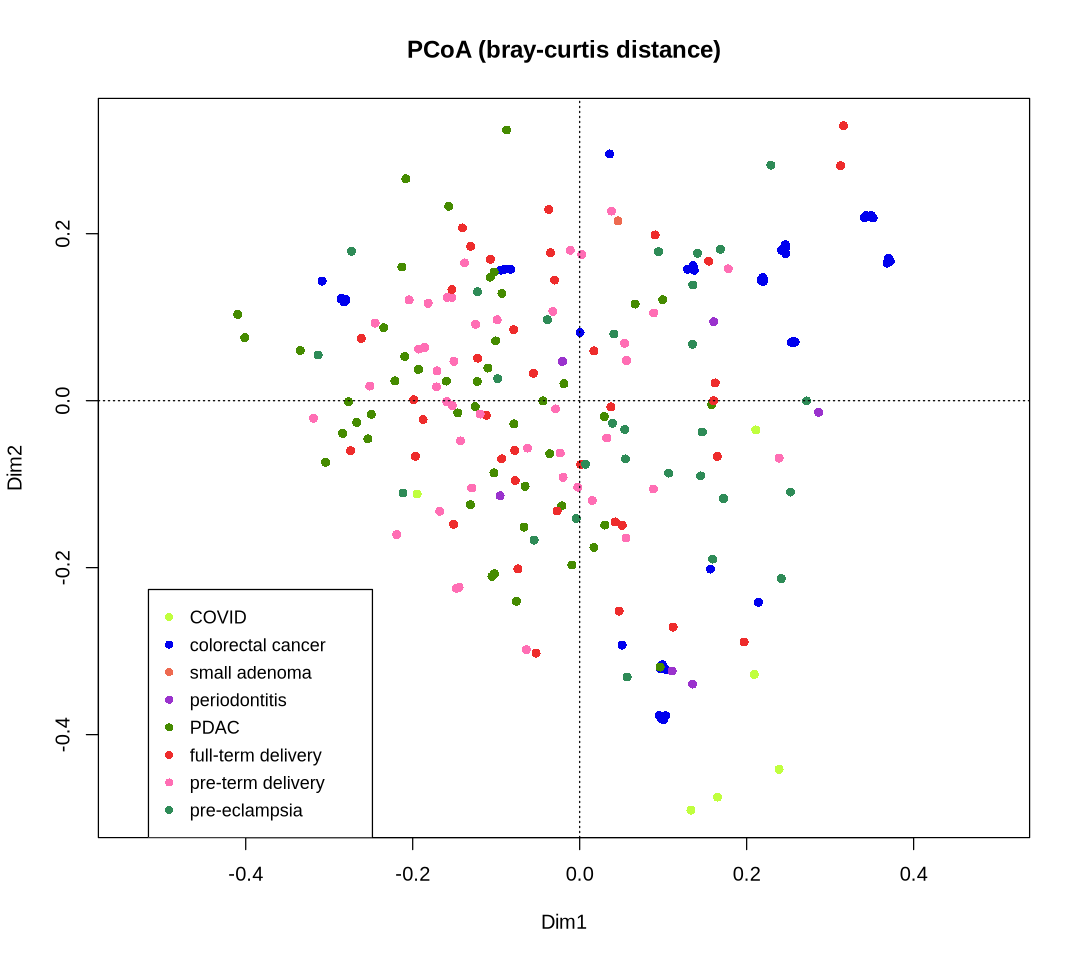

In [305]:
# PcoA plot coloured by health
options(repr.plot.width=9 , repr.plot.height= 8)
#pdf(paste0(res_dir0, "/pcoa_abundance_col_by_health.pdf"), width = 9, height = 7 ) 
ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main="PCoA (bray-curtis distance)")
points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = age2col[age_cats[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))]], pch=16, cex=1)
abline(h=0, lty=3)
abline(v=0, lty=3)
legend("bottomleft", legend=unique(age_cats), pch=16, col=age2col[unique(age_cats)], cex=0.9)
#ordiellipse(mx_norm.b.pcoa, groups = age_cats, conf = 0.95, col=age2col[unique(age_cats)])
#dev.off()

species scores not available



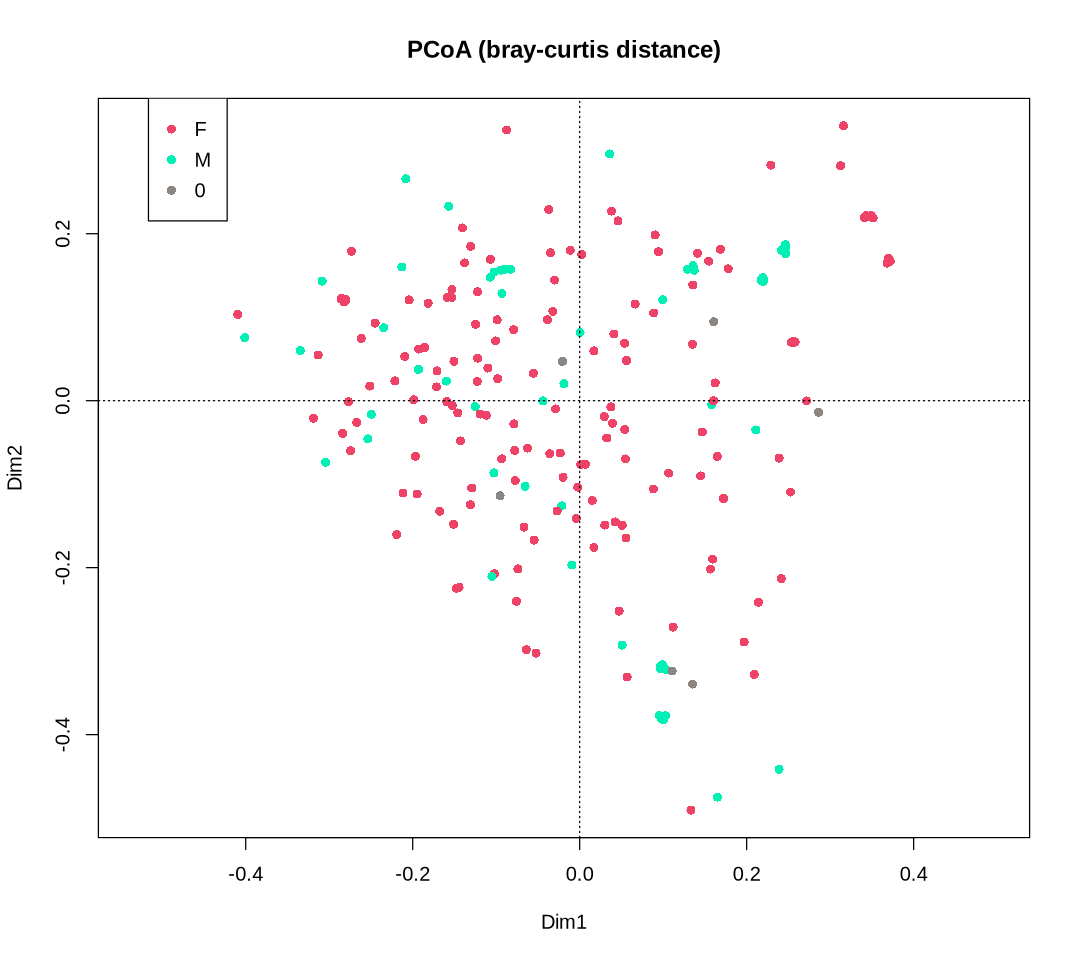

In [306]:
# PcoA plot coloured by sex
#pdf(paste0(res_dir0, "/pcoa_abundance_col_by_health.pdf"), width = 9, height = 7 ) 
ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main="PCoA (bray-curtis distance)")
points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = sex2col[sex_cats[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))]], pch=16, cex=1)
abline(h=0, lty=3)
abline(v=0, lty=3)
legend("topleft", legend=unique(sex_cats), pch=16, col=sex2col[unique(sex_cats)])
#dev.off()

In [307]:
all_genera = rownames(mx_norm)
all_samples = as.data.frame(colnames(mx_norm))
names(all_samples) = c("sample")
all_samples_prob <- all_samples


In [308]:
str(all_samples)

'data.frame':	224 obs. of  1 variable:
 $ sample: chr  "SRR21765456" "SRR21765466" "SRR21765481" "SRR21765484" ...


In [309]:
head(all_samples)

,sample
,<chr>
1,SRR21765456
2,SRR21765466
3,SRR21765481
4,SRR21765484
5,SRR21765486
6,SRR21765496


In [310]:
str(all_genera)
head(all_genera)

 chr [1:279] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949" ...


[1] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949"          
[2] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter"
[3] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum"           
[4] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces"             
[5] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea"             
[6] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835"

In [311]:
# retrieve the sample names
outg <- str_split(as.character(all_genera),';') 

all_genera_df = as.data.frame(do.call(rbind, outg))
names(all_genera_df) = c("k","p","c","o","f","g")
all_genera_df$full = all_genera
all_genera_df = all_genera_df[,c("full","k","p","c","o","f","g")]

In [312]:
head(all_genera_df)

,full,k,p,c,o,f,g
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,k__Archaea,p__Euryarchaeota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__GGB50949
2,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,k__Archaea,p__Euryarchaeota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter
3,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,k__Bacteria,p__Actinobacteria,c__Actinomycetia,o__Actinomycetales,f__Actinomycetaceae,g__Actinobaculum
4,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,k__Bacteria,p__Actinobacteria,c__Actinomycetia,o__Actinomycetales,f__Actinomycetaceae,g__Actinomyces
5,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,k__Bacteria,p__Actinobacteria,c__Actinomycetia,o__Actinomycetales,f__Actinomycetaceae,g__Fannyhessea
6,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,k__Bacteria,p__Actinobacteria,c__Actinomycetia,o__Actinomycetales,f__Actinomycetaceae,g__GGB9835


In [313]:
str(all_genera_df)

'data.frame':	279 obs. of  7 variables:
 $ full: chr  "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949" "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter" "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum" "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces" ...
 $ k   : chr  "k__Archaea" "k__Archaea" "k__Bacteria" "k__Bacteria" ...
 $ p   : chr  "p__Euryarchaeota" "p__Euryarchaeota" "p__Actinobacteria" "p__Actinobacteria" ...
 $ c   : chr  "c__Methanobacteria" "c__Methanobacteria" "c__Actinomycetia" "c__Actinomycetia" ...
 $ o   : chr  "o__Methanobacteriales" "o__Methanobacteriales" "o__Actinomycetales" "o__Actinomycetales" ...
 $ f   : chr  "f__Methanobacteriaceae" "f__Methanobacteriaceae" "f__Actinomycetaceae" "f__Actinomycetaceae" ...
 $ g   : chr  "g__GGB50949

In [314]:
# initialise the df with ES assignments of genera
df <- dplyr::select(all_genera_df, full, p ) #df <- all_genera_df[,c("full","p")]


In [315]:
str(df)
head(df)

'data.frame':	279 obs. of  2 variables:
 $ full: chr  "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949" "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter" "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum" "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces" ...
 $ p   : chr  "p__Euryarchaeota" "p__Euryarchaeota" "p__Actinobacteria" "p__Actinobacteria" ...


,full,p
,<chr>,<chr>
1,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,p__Euryarchaeota
2,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,p__Euryarchaeota
3,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,p__Actinobacteria
4,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,p__Actinobacteria
5,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,p__Actinobacteria
6,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,p__Actinobacteria


In [316]:
# initialise the df with probabilitity of ES assignments of genera
#df_prob <- dplyr::select(all_genera_df, full) #
df_prob <- all_genera_df[,c("full"), drop=FALSE]
head(df_prob)

,full
,<chr>
1,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949
2,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter
3,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum
4,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces
5,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea
6,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835


In [320]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test/6"

In [319]:
for (es_nb in ranks){

    # Get H and W matrices
    W = nmf_data[[as.character(es_nb)]][['W']]
    H = nmf_data[[as.character(es_nb)]][['H']]

    res_dir = paste0(res_dir0, "/", es_nb, "/")
    
    dir.create(file.path(res_dir), showWarnings = FALSE)
    dir.create(file.path(paste0(res_dir, "/compo")), showWarnings = FALSE)

    W_norm = W/rowSums(W) # W is n x r (n: measured features (bact) in row, r: signatures in columns)
    W_norm_byES = sweep(W,2,colSums(W),"/") # W is n x r (n: measured features (bact) in row, r: signatures in columns)
    W_norm[is.nan(W_norm)] <- 0
    H_norm = sweep(H,2,colSums(H),"/")
    

    rownames(W_norm_byES) <- lapply(rownames(W_norm_byES), shorten_genus, genera=rownames(W_norm_byES))

    # Identify the ES
           
    W_norm_byES_no0 <- W_norm_byES[rowSums(W_norm_byES) != 0, ]
    
    # Function to find indices of top n maximum values
        find_top_n_indices <- function(vec, n) {
          max_indices <- order(vec, decreasing = TRUE)
          return(max_indices[1:n])
            }

        # Apply the function to each column of W_norm_byES_no0
        max_indices <- apply(W_norm_byES_no0, 2, function(x) find_top_n_indices(x, 2))

        # Extract the row names corresponding to the maximum and second maximum values
        main_genera_by_es <- lapply(max_indices, function(indices) rownames(W_norm_byES_no0)[indices])

        # Create a data frame with maximum and second maximum values
        max_df <- data.frame(Maximum = rownames(W_norm_byES_no0)[max_indices[1,]],
                     Second_Maximum = rownames(W_norm_byES_no0)[max_indices[2,]])

        # Check for duplicate row names in the first column and replace them with values from the second column
            dup_row_names <- duplicated(max_df$Maximum)
            max_df$Maximum[dup_row_names] <- max_df$Second_Maximum[dup_row_names]

                main_genera_by_es <- max_df$Maximum

             shortened_main_genera = c()
            for (elem in main_genera_by_es){
                if (elem == "g__Streptococcus"){
                shortened_main_genera = c(shortened_main_genera, "g__Streptococcus")
                } else if(elem == "g__Prevotella"){
                shortened_main_genera = c(shortened_main_genera, "g__Prevotella")
                } else if(elem == "g__Neisseria"){
                shortened_main_genera = c(shortened_main_genera, "g__Neisseria")
                }else if(elem == "g__GGB10485"){
                shortened_main_genera = c(shortened_main_genera, "Enterococcaceae;g__GGB10485")
                }else{
                    shortened_main_genera = c(shortened_main_genera, substring(
                                gsub(".*;([^\\;?]+[;\\?]*)$", "\\1", 
                                    elem, 
                                perl = TRUE),
                            1, 17))
                    }
                }
    es_names = paste0("SS_", shortened_main_genera)
 colnames(W_norm) = colnames(W) = colnames(W_norm_byES)= colnames(W_norm_byES_no0) = es_names
    rownames(H_norm) = rownames(H) = es_names
                # Export the H and W matrices
    write.table(H, file=paste0(res_dir, "H_trial", es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE)
    write.table(W, file=paste0(res_dir, "W_trial", es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE)
    # write.table(all_genera_df, file=paste0(res_dir0, "allgenera", es_nb , ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE)
        
    # plot the contents of each ES
    pdf(paste0(res_dir, es_nb, "contents_trial.pdf"), width = 25, height = 12)
    es_content(W, es2Col)
    dev.off()

                # summary of signatures contents
    sigPickup=0.01
    sigbact_mat = 100* W[rowSums(W >= sigPickup) > 0,]
    rownames(sigbact_mat) = gsub(".*;([^\\;?]+[;\\?]*)$", "\\1", row.names(sigbact_mat), perl = TRUE)
    sigbact_mat = as.data.frame(sigbact_mat)
    library(data.table)
    setDT(sigbact_mat, keep.rownames = TRUE)[]
    # get a character for each sig stating its contents in bacteria
    sig_et_contents = list()
    for (sign in es_names) {
        # order by column matching this sign
        sigbact_mat = sigbact_mat[order(sigbact_mat[[sign]],decreasing = TRUE),]
        # select content: bact > 1% in sign
        signame = paste(sigbact_mat[sigbact_mat[[sign]]>1,]$rn, collapse = " - ") # not ordered by prevalence here
        sig_et_contents[[sign]] <- signame
    }
    capture.output(sig_et_contents, file = paste0(res_dir, es_nb,"_sig_contents_trial.txt"))


         # pie plots of the contents of each sig, leaving what is below 4% in "others"
    sigPickup=0.04 
    for (sig in es_names){
        compo = as.data.frame(W_norm_byES[, sig, drop=FALSE])
        compo$genus = rownames(compo)
        names(compo) = c("percentage", "genus")
        compo = compo[,c("genus","percentage")]
        compo = compo[compo$percentage >= sigPickup,]
        compo = compo[order(compo$percentage, decreasing = TRUE),]
        compo$genus_simp = unlist(lapply(compo$genus, shorten_genus, genera=compo$genus))
        compo <- rbind(compo, c("others", 1-sum(compo$percentage), "others"))
        compo$colors = g4_colours[unlist(compo$genus_simp)]
        all_genera_4pc = c(all_genera_4pc, compo$genus)
        write.table(compo, file=paste0(res_dir,"trialnorm_compo_", sig,"_" , es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE)

        
        p <- plot_ly(compo, labels = ~genus_simp, values = ~percentage, type = 'pie',textposition = 'outside',textinfo = 'label', sort = TRUE, marker = list(colors=~colors)) %>% #  textinfo = 'label+value'
        layout(xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
                yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
                showlegend = F) %>% #,
                #margin = list(b = 180, l = 50, r = 50, t = 10)) 
                add_trace(showlegend = FALSE)
        
        setwd(res_dir)
        #namefig = paste0(sig, "_es_", es_nb, "_compo.pdf")
        #orca(p, namefig, width=400, height=300)
        # Generate the file name
            namefig <- paste0(sig, "_es_", es_nb, "_compo_trial.html")

            # Save the plot as an HTML file
           htmlwidgets::saveWidget(p, file = namefig)
        
    }       


                  # ES assignments of genera

    W_norm_no0 <- W_norm[rowSums(W_norm) != 0, ]
 
    assignments = as.data.frame(apply(W_norm_no0,1,function(x) which(x==max(x))))
# ES assignments of samples
    sample_assignments = as.data.frame(apply(H_norm,2,function(x) which(x==max(x)))) 
  
    names(assignments) = names(sample_assignments) = c("prediction")

    # associate the name of ES to the assignment
    assignments$prediction_nm = es_names[assignments$prediction]
    sample_assignments$prediction_nm = es_names[sample_assignments$prediction]                                         
   

      # add genus or sample as a column to the df
    assignments$genus <- rownames(assignments)
    sample_assignments$sample <- rownames(sample_assignments)                                        
                                             
    
    # retrieve assignment probability
    prob = as.data.frame(apply(W_norm_no0,1,max)) 
    sample_prob = as.data.frame(apply(H_norm,2,max)) 
    names(prob) =  names(sample_prob) = c("probability")
    prob$genus <- rownames(prob)
    sample_prob$sample <- rownames(sample_prob)
    print(es_nb)
    print(summary(prob))
    print(summary(sample_prob))


    assigned_sample_color = es2Col[sample_assignments$prediction_nm]
    names(assigned_sample_color) = sample_assignments$sample

    es_pointshape=c(0,1,17,3,4,18,6,8,13,9,2,10)
    names(es_pointshape) = all_es_names
    sample_shape = es_pointshape[sample_assignments$prediction_nm] 
    names(sample_shape) = sample_assignments$sample 
    write.table(assignments, file=paste0(res_dir, "assignments_trial", es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE) 
    write.table(sample_assignments, file=paste0(res_dir, "sample_assignments_trial", es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE) 
 
                                                 
        # PcoA plot -dim1- dim2
pdf(paste0(res_dir, es_nb, "pcoa_abundance_col_by_es_trial_dim1_dim2.pdf"), width = 10, height = 10 ) 

# Create the ordination plot
        ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main="PCoA (bray-curtis distance)")
points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = assigned_sample_color[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))], pch=sample_shape, cex=0.7)
abline(h=0, lty=3)
abline(v=0, lty=3)
legend("topleft", legend=es_names, pch=es_pointshape[es_names], col=es2Col[es_names])

# Annotate plot with variance explained
total_variance <- sum(mx_norm.b.pcoa$eig)
variance_explained <- (mx_norm.b.pcoa$eig / total_variance) * 100
mtext(paste("Variance explained:\nPCoA Axis 1:", round(variance_explained[1], 2), "%\nPCoA Axis 2:", round(variance_explained[2], 2), "%"), side = 3, line = 0.5, adj = 0, cex = 0.8)

ordiellipse(mx_norm.b.pcoa, groups = sample_assignments$prediction_nm, conf = 0.95, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])

        # Add a pie chart in the margin
        par(fig= c(0.72,0.97,0.1,0.2), new=TRUE, mar=c(0,0,0,0))
        pie(summary(as.factor(sample_assignments$prediction_nm)), labels=NA, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])

        # Close the PDF device
dev.off()
             
   # pdf(paste0(res_dir, es_nb, "pcoa_abundance_col_by_es_trial.pdf"), width = 10, height = 10 ) 
   # ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main="PCoA (bray-curtis distance)")
   # points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = assigned_sample_color[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))], pch=sample_shape, cex=0.8)
   #                                     abline(h=0, lty=3)
   # abline(v=0, lty=3)
   # legend("topleft", legend=es_names, pch=es_pointshape[es_names], col=es2Col[es_names])
    # Annotate plot with variance explained
   #total_variance <- sum(mx_norm.b.pcoa$eig)
    
    # Calculate the proportion of variance explained by each axis
    #variance_explained <- (mx_norm.b.pcoa$eig/ total_variance) *100
    # print(variance_explained)  
    #print(round(variance_explained[1], 2))
    
   #mtext(paste("Variance explained:\nPCoA Axis 1: ", round(variance_explained[1], 2), "%\nPCoA Axis 2: ", round(variance_explained[2], 2), "%"), side = 3, line = 0.5, adj = 0, cex = 0.8)
      # Draw ordiellipse with colors matching points

    #    ordiellipse(mx_norm.b.pcoa, groups = sample_assignments$prediction_nm, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))], conf = 0.95)                          
    #par(fig= c(0.72,0.97,0.15,0.4), new=TRUE, mar=c(0,0,0,0)) #oma=c(3.2,2,1,1),mar = c(1,3,0,0)
    #pie(summary(as.factor(sample_assignments$prediction_nm)), labels=NA, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])
    #dev.off()


                          
           # PcoA plot -dim1-dim3                                             
            # Set up the PDF output
 pdf(paste0(res_dir, es_nb, "pcoa_abundance_col_by_es_trial_dim1_dim3.pdf"), width = 10, height = 10 ) 

# Create the ordination plot
        ordiplot(scores(mx_norm.b.pcoa, choices=c(1,3)), type="none", main="PCoA (bray-curtis distance)")
points(scores(mx_norm.b.pcoa, choices=c(1,3)), col = assigned_sample_color[rownames(scores(mx_norm.b.pcoa, choices=c(1,3)))], pch=sample_shape, cex=0.7)
abline(h=0, lty=3)
abline(v=0, lty=3)
legend("topleft", legend=es_names, pch=es_pointshape[es_names], col=es2Col[es_names])

# Annotate plot with variance explained
total_variance <- sum(mx_norm.b.pcoa$eig)
variance_explained <- (mx_norm.b.pcoa$eig / total_variance) * 100
mtext(paste("Variance explained:\nPCoA Axis 1:", round(variance_explained[1], 2), "%\nPCoA Axis 3:", round(variance_explained[3], 2), "%"), side = 3, line = 0.5, adj = 0, cex = 0.8)

ordiellipse(mx_norm.b.pcoa, groups = sample_assignments$prediction_nm, conf = 0.95, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])

        # Add a pie chart in the margin
        par(fig= c(0.72,0.97,0.1,0.2), new=TRUE, mar=c(0,0,0,0))
        pie(summary(as.factor(sample_assignments$prediction_nm)), labels=NA, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])

        # Close the PDF device
dev.off()



    varname = paste0("x", es_nb)
    # add the ES assignment of genera to df + their proba in another df
    df[[varname]] <- assignments[match(df$full, assignments$genus), "prediction_nm"]
    df_prob[[varname]] <- prob[match(df$full, prob$genus), "probability"]
    # add the ES assignment of samples to df + their proba in another df
    all_samples[[varname]] <- sample_assignments[match(all_samples$sample, sample_assignments$sample), "prediction_nm"]
    all_samples_prob[[varname]] <- sample_prob[match(all_samples_prob$sample, sample_prob$sample), "probability"]

    write.table(all_samples_prob, file=paste0(res_dir, "allsampleprob", es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE) 

write.table(df, file=paste0(res_dir, "df_trial", es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE) 
write.table(df_prob, file=paste0(res_dir, "df_prob_trial", es_nb, ".tsv"), sep="\t", row.names=TRUE, col.names=TRUE, quote = FALSE) 

         

                            
 }   

       

1 1 1 1 1 1[1] 6
  probability        genus          
 Min.   :0.3337   Length:222        
 1st Qu.:0.5903   Class :character  
 Median :0.8009   Mode  :character  
 Mean   :0.7709                     
 3rd Qu.:1.0000                     
 Max.   :1.0000                     
  probability        sample         
 Min.   :0.2237   Length:224        
 1st Qu.:0.3754   Class :character  
 Median :0.4461   Mode  :character  
 Mean   :0.4677                     
 3rd Qu.:0.5456                     
 Max.   :0.9529                     


species scores not available

species scores not available



In [321]:
rownames(mx_norm) <- lapply(rownames(mx_norm), shorten_genus, genera=rownames(mx_norm))

# order the ES assignment of genera dataframe by phylum
df <- df[order(df$p),]

In [322]:
head(df)

,full,p,x6
,<chr>,<chr>,<chr>
3,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,p__Actinobacteria,SS_g__Rothia
4,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,p__Actinobacteria,SS_g__Actinomyces
5,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,p__Actinobacteria,NA
6,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,p__Actinobacteria,SS_g__Prevotella
7,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,p__Actinobacteria,SS_g__Actinomyces
8,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,p__Actinobacteria,SS_g__Neisseria


In [323]:
df_melt <- df %>%
  tidyr::pivot_longer(cols = c(x6), names_to = "variable", values_to = "value")                                              
#df_melt = reshape2::melt(data = df1, id.vars = c("p", "full"), measure.vars = c("x2", "x3", "x4", "x5", "x6"))
names(df_melt) = c("genus","phylum", "ES_number", "ES")

In [324]:
head(df_melt)

genus,phylum,ES_number,ES
<chr>,<chr>,<chr>,<chr>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,p__Actinobacteria,x6,SS_g__Rothia
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,p__Actinobacteria,x6,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,p__Actinobacteria,x6,NA
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,p__Actinobacteria,x6,SS_g__Prevotella
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,p__Actinobacteria,x6,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,p__Actinobacteria,x6,SS_g__Neisseria


In [325]:
head(df_prob)

,full,x6
,<chr>,<dbl>
1,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,NA
2,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,NA
3,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.3403322
4,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.8044003
5,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,NA
6,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,1.0000000


In [326]:
df_prob_melt <- df_prob %>%
  tidyr::pivot_longer(cols = c( x6 ), names_to = "variable", values_to = "value")

names(df_prob_melt) = c("name", "ES_number", "prob")
df_prob_melt$type = "genera"

In [327]:
head(df_prob_melt,20)

name,ES_number,prob,type
<chr>,<chr>,<dbl>,<chr>
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,x6,NA,genera
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,x6,NA,genera
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,x6,0.3403322,genera
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,x6,0.8044003,genera
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,x6,NA,genera
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,x6,1.0000000,genera
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,x6,0.4219913,genera
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,x6,0.4467984,genera
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,x6,0.4197195,genera


In [328]:
all_samples_prob_melt <- all_samples_prob %>%
  tidyr::pivot_longer(cols = c( x6 ), names_to = "variable", values_to = "value")                                              
#all_samples_prob_melt = reshape2::melt(data = all_samples_prob, id.vars = c("sample"), measure.vars = c("x2", "x3", "x4", "x5", "x6"))
names(all_samples_prob_melt) = c("name", "ES_number", "prob")
all_samples_prob_melt$type = "samples"

In [329]:
head(all_samples_prob_melt)

name,ES_number,prob,type
<chr>,<chr>,<dbl>,<chr>
SRR21765456,x6,0.4880931,samples
SRR21765466,x6,0.5320635,samples
SRR21765481,x6,0.8252448,samples
SRR21765484,x6,0.9529060,samples
SRR21765486,x6,0.3112288,samples
SRR21765496,x6,0.8467506,samples


In [330]:
# merge the probability dataframes for genera and samples, "type" distinguish them
all_melt_prob = rbind(all_samples_prob_melt, df_prob_melt)
all_melt_prob$ES_number = gsub("^x", "", all_melt_prob$ES_number)
all_melt_prob$ES_number = factor(all_melt_prob$ES_number, levels = as.character(2:10))


In [331]:
head(all_melt_prob)
tail(all_melt_prob)

name,ES_number,prob,type
<chr>,<fct>,<dbl>,<chr>
SRR21765456,6,0.4880931,samples
SRR21765466,6,0.5320635,samples
SRR21765481,6,0.8252448,samples
SRR21765484,6,0.9529060,samples
SRR21765486,6,0.3112288,samples
SRR21765496,6,0.8467506,samples


name,ES_number,prob,type
<chr>,<fct>,<dbl>,<chr>
k__Bacteria;p__Tenericutes;c__CFGB40097;o__OFGB40097;f__FGB40097;g__GGB42243,6,NA,genera
k__Bacteria;p__Tenericutes;c__Mollicutes;o__Mycoplasmatales;f__Mycoplasmataceae;g__GGB4333,6,0.5419175,genera
k__Bacteria;p__Tenericutes;c__Mollicutes;o__Mycoplasmatales;f__Mycoplasmataceae;g__Mycoplasma,6,0.6079702,genera
k__Eukaryota;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Candida,6,NA,genera
k__Eukaryota;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Saccharomyces,6,1.0000000,genera
k__Eukaryota;p__Basidiomycota;c__Malasseziomycetes;o__Malasseziales;f__Malasseziaceae;g__Malassezia,6,NA,genera


In [332]:
dim(all_melt_prob)

[1] 503   4

In [333]:
head(df_melt)

genus,phylum,ES_number,ES
<chr>,<chr>,<chr>,<chr>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,p__Actinobacteria,x6,SS_g__Rothia
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,p__Actinobacteria,x6,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,p__Actinobacteria,x6,NA
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,p__Actinobacteria,x6,SS_g__Prevotella
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,p__Actinobacteria,x6,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,p__Actinobacteria,x6,SS_g__Neisseria


In [334]:
# remove the x prefix to the number of ES
df_melt$ES_number = gsub("^x", "", df_melt$ES_number)
df_melt$ES_number = factor(df_melt$ES_number, levels = as.character(2:10))

In [335]:
head(df_melt)
dim(df_melt)
tail(df_melt)

genus,phylum,ES_number,ES
<chr>,<chr>,<fct>,<chr>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,p__Actinobacteria,6,SS_g__Rothia
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,p__Actinobacteria,6,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,p__Actinobacteria,6,NA
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,p__Actinobacteria,6,SS_g__Prevotella
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,p__Actinobacteria,6,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,p__Actinobacteria,6,SS_g__Neisseria


[1] 279   4

genus,phylum,ES_number,ES
<chr>,<chr>,<fct>,<chr>
k__Bacteria;p__Synergistetes;c__Synergistia;o__Synergistales;f__Synergistaceae;g__GGB10852,p__Synergistetes,6,SS_g__Actinomyces
k__Bacteria;p__Synergistetes;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Pyramidobacter,p__Synergistetes,6,SS_g__Actinomyces
k__Bacteria;p__Tenericutes;c__CFGB1781;o__OFGB1781;f__FGB1781;g__GGB4733,p__Tenericutes,6,SS_g__Porphyromonas
k__Bacteria;p__Tenericutes;c__CFGB40097;o__OFGB40097;f__FGB40097;g__GGB42243,p__Tenericutes,6,NA
k__Bacteria;p__Tenericutes;c__Mollicutes;o__Mycoplasmatales;f__Mycoplasmataceae;g__GGB4333,p__Tenericutes,6,SS_g__Prevotella
k__Bacteria;p__Tenericutes;c__Mollicutes;o__Mycoplasmatales;f__Mycoplasmataceae;g__Mycoplasma,p__Tenericutes,6,SS_g__Prevotella


In [336]:
# plot the probabilities
m = ggplot(data=all_melt_prob, aes(x = type, y = prob, fill = type), show.legend = FALSE) +
        geom_boxplot() + #width=0.1, alpha=0.4
        facet_grid(~ ES_number, labeller = label_wrap_gen(width=10),  switch="both") +
        labs(y= "Probability of assignment", x="Number of saliva_signatures", fill="Type of SS assignment") +
        theme_classic() +
        theme(panel.grid = element_blank(),
            axis.text.x = element_blank(), #element_text(angle = 45, hjust = 1),
            # legend.position = "none",
            panel.border = element_rect(colour = "black", fill=NA),
            axis.text=element_text(size=15),
            axis.ticks.x = element_blank(),
            legend.text=element_text(size=12),
            legend.title=element_text(size=12),
            axis.title=element_text(size=15),
            strip.text.x=element_text(size=15)
            )

        

Warning message:
“Removed 57 rows containing non-finite outside the scale range (`stat_boxplot()`).”


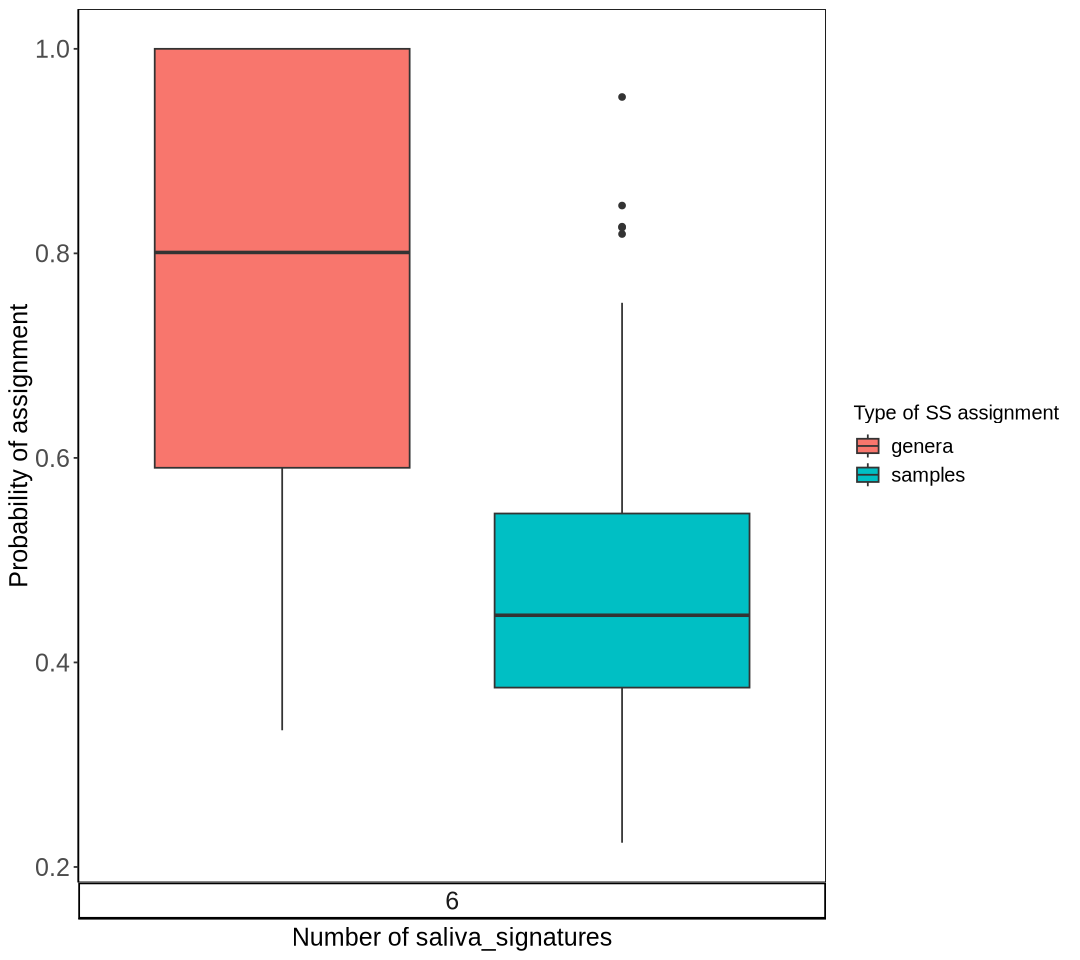

In [337]:
m

In [387]:
sum(is.na(df_melt$ES))

[1] 57

In [ ]:
#df_filtered <- df_melt %>% filter(!is.na(ES))

In [338]:
# plot the change in ES assignment for genera depending on ES number


library(ggplot2)
library(ggforce)

p=ggplot(df_melt,
       aes(x = as.factor(ES_number), stratum = ES, alluvium = genus,
           fill = as.factor(ES), label = ES)) +
  geom_flow(stat = "alluvium", lode.guidance = "frontback") +
  geom_stratum(width = 1/5, discern = TRUE) +
  scale_fill_manual(values = es2Col) +
  ggtitle("Evolution of genus association to ES",
          "with the chosen number of ES") +
  theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        legend.position = "bottom",
        panel.border = element_rect(colour = "black", fill = NA),
        axis.text = element_text(size = 15),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12),
        axis.title = element_text(size = 15),
        strip.text.x = element_text(size = 15))


Warning message in setup_data(...):
“Data is already in lodes format, so `discern` will be ignored.”


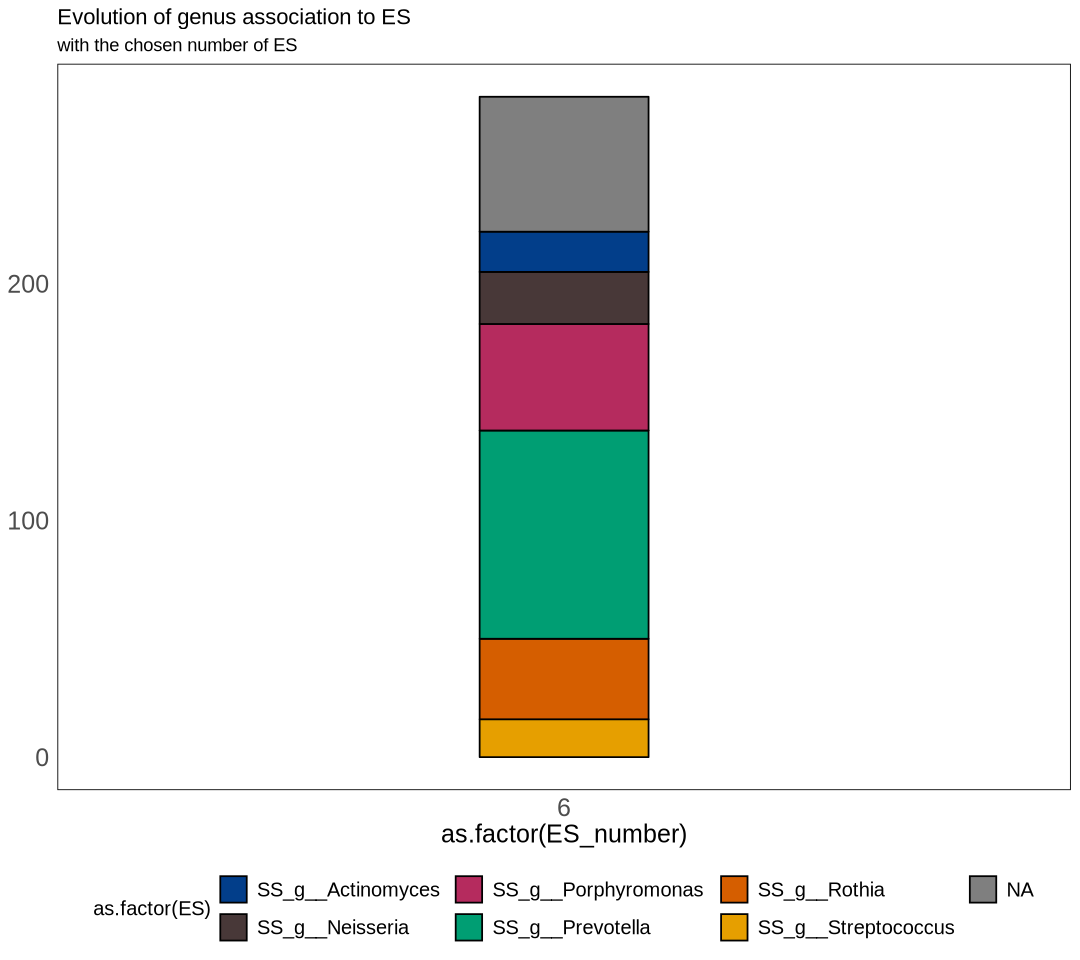

In [339]:
p

In [87]:
pdf(paste0(res_dir0, "/probability_of_ES.pdf"), width = 20, height = 14)
m
dev.off()

Warning message:
“Removed 57 rows containing non-finite outside the scale range (`stat_boxplot()`).”


png 
  2

In [88]:
pdf(paste0(res_dir0, "/alluvial_ES_genera_trial.pdf"), width = 20, height = 14)
p
dev.off()

Warning message in setup_data(...):
“Data is already in lodes format, so `discern` will be ignored.”


png 
  2

In [89]:
# plot the probabilities
m = ggplot(data=all_melt_prob, aes(x = type, y = prob, fill = type), show.legend = FALSE) +
        geom_boxplot() + #width=0.1, alpha=0.4
        facet_grid(~ ES_number, labeller = label_wrap_gen(width=10),  switch="both") +
        labs(y= "Probability of assignment", x="Number of enterosignatures", fill="Type of ES assignment") +
        theme_classic() +
        theme(panel.grid = element_blank(),
            axis.text.x = element_blank(), #element_text(angle = 45, hjust = 1),
            # legend.position = "none",
            panel.border = element_rect(colour = "black", fill=NA),
            axis.text=element_text(size=15),
            axis.ticks.x = element_blank(),
            legend.text=element_text(size=12),
            legend.title=element_text(size=12),
            axis.title=element_text(size=15),
            strip.text.x=element_text(size=15)
            )

pdf_file_1 = paste0(res_dir0, "/probability_assignment_genera_samples.pdf")                                      
   pdf(pdf_file_1, width = 9, height = 7 ) 
    m
dev.off()

Warning message:
“Removed 57 rows containing non-finite outside the scale range (`stat_boxplot()`).”


png 
  2

# proportion of signatures in unhealthy datasets 

In [340]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test/6"

In [341]:
setwd("/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/")

In [342]:
es_nb = 6

In [343]:
 # Get H and W matrices
    W = nmf_data[[as.character(es_nb)]][['W']]
    H = nmf_data[[as.character(es_nb)]][['H']]


In [344]:
head(W)
head(H)

,V1,V2,V3,V4,V5,V6
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,0.0000000000,0.000000000,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0.0000000000,0.000000000,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.0008419212,0.006402680,0.005053788,7.035763e-03,9.974770e-03,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.1817434622,0.092222686,0.146778541,1.730332e+00,2.451473e-09,6.663451e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,0.0000000000,0.000000000,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.0000000000,0.004167554,0.000000000,3.107907e-13,0.000000e+00,0.000000e+00


SRR21765456,SRR21765466,SRR21765481,SRR21765484,SRR21765486,SRR21765496,ERR2764879,ERR2764880,ERR2764881,ERR2764878,⋯,SRR23512052,SRR23512047,SRR23512043,SRR23512039,SRR23512034,SRR23512222,SRR23512218,SRR23512214,SRR23512210,SRR23512205
2.957466e-21,0.010800511,4.080600e-03,8.416935e-03,7.849754e-02,6.991889e-10,0.023674705,0.0247320677,0.0244539213,0.0245254590,⋯,0.1019176076,0.118474250,0.071397995,0.0729682136,3.729485e-02,6.848899e-02,1.420069e-01,2.880067e-02,8.914109e-02,5.846172e-02
1.097709e-01,0.072893795,1.795050e-01,1.951655e-01,5.936609e-02,1.831000e-01,0.025415511,0.0252512184,0.0240255249,0.0243147038,⋯,0.0491427795,0.062206449,0.067927517,0.0239111434,2.897690e-02,4.005160e-02,7.403936e-03,1.090839e-01,8.085739e-02,1.123312e-01
9.742042e-25,0.140400179,4.027528e-20,2.110621e-08,3.518643e-08,1.967681e-29,0.074588641,0.0745852456,0.0738619905,0.0726357403,⋯,0.0407710661,0.002221537,0.010518397,0.1198179628,1.309130e-01,9.587158e-02,2.848455e-02,2.733295e-02,5.144047e-02,4.820713e-02
8.032377e-03,0.009374659,8.890071e-13,1.228401e-03,5.968550e-02,4.141526e-03,0.003075702,0.0026523758,0.0060581544,0.0039869670,⋯,0.0039565644,0.044295239,0.017979728,0.0005443226,1.080155e-02,2.991580e-13,1.684375e-06,1.378494e-06,1.391093e-06,2.764104e-07
1.271897e-01,0.002756781,2.901388e-11,1.675711e-15,4.328951e-02,2.899687e-02,0.000132765,0.0005412744,0.0002399635,0.0005376709,⋯,0.0008156656,0.001163415,0.004273136,0.0003877964,4.009639e-08,5.615158e-04,1.827037e-08,2.814393e-02,5.834018e-03,1.426818e-03
1.559193e-02,0.027652711,3.393168e-02,6.465201e-14,1.137940e-02,8.574119e-24,0.170614142,0.1692672398,0.1693499912,0.1719870192,⋯,0.0470720128,0.001741805,0.079631780,0.0475927824,6.939978e-02,5.545433e-02,7.310796e-02,5.206511e-02,1.038886e-03,4.631879e-03


In [345]:
 W_norm = W/rowSums(W) # W is n x r (n: measured features (bact) in row, r: signatures in columns)
    W_norm_byES = sweep(W,2,colSums(W),"/") # W is n x r (n: measured features (bact) in row, r: signatures in columns)
    W_norm[is.nan(W_norm)] <- 0
    H_norm = sweep(H,2,colSums(H),"/")
    

   

In [346]:
head(W_norm)
head(H_norm)

,V1,V2,V3,V4,V5,V6
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.02872577,0.21845499,0.1724317,2.400553e-01,3.403322e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.08448926,0.04287267,0.0682347,8.044003e-01,1.139646e-09,3.097719e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.00000000,1.00000000,0.0000000,7.457388e-11,0.000000e+00,0.000000e+00


SRR21765456,SRR21765466,SRR21765481,SRR21765484,SRR21765486,SRR21765496,ERR2764879,ERR2764880,ERR2764881,ERR2764878,⋯,SRR23512052,SRR23512047,SRR23512043,SRR23512039,SRR23512034,SRR23512222,SRR23512218,SRR23512214,SRR23512210,SRR23512205
1.134934e-20,0.04092984,1.875988e-02,4.109615e-02,3.112288e-01,3.233417e-09,0.0795784485,0.083264707,0.0820630176,0.08230363,⋯,0.418251017,0.514875543,0.28363089,0.275121041,1.344511e-01,2.629862e-01,5.657532e-01,1.173488e-01,3.904333e-01,2.597617e-01
4.212482e-01,0.27623985,8.252448e-01,9.529060e-01,2.353760e-01,8.467506e-01,0.0854298673,0.085012516,0.0806253952,0.08159637,⋯,0.201672880,0.270342113,0.26984431,0.090155128,1.044641e-01,1.537915e-01,2.949716e-02,4.444639e-01,3.541511e-01,4.991190e-01
3.738529e-24,0.53206346,1.851590e-19,1.030522e-07,1.395079e-07,9.099591e-29,0.2507168855,0.251103898,0.2478677238,0.24375427,⋯,0.167316917,0.009654546,0.04178468,0.451764420,4.719522e-01,3.681308e-01,1.134820e-01,1.113686e-01,2.253065e-01,2.141977e-01
3.082441e-02,0.03552640,4.087063e-12,5.997733e-03,2.366424e-01,1.915260e-02,0.0103384437,0.008929674,0.0203300904,0.01337964,⋯,0.016237009,0.192502044,0.07142507,0.002052327,3.894050e-02,1.148717e-12,6.710521e-06,5.616698e-06,6.092914e-06,1.228168e-06
4.880931e-01,0.01044715,1.333865e-10,8.181748e-15,1.716353e-01,1.340968e-01,0.0004462666,0.001822292,0.0008052748,0.00180434,⋯,0.003347341,0.005056069,0.01697517,0.001462157,1.445508e-07,2.156127e-03,7.278886e-08,1.146729e-01,2.555269e-02,6.339751e-03
5.983435e-02,0.10479329,1.559953e-01,3.156670e-13,4.511730e-02,3.965124e-23,0.5734900884,0.569866914,0.5683084981,0.57716174,⋯,0.193174837,0.007569686,0.31633988,0.179444928,2.501920e-01,2.129353e-01,2.912609e-01,2.121402e-01,4.550265e-03,2.058072e-02


In [347]:
which.max(W_norm[,1] )

k__Bacteria;p__Proteobacteria;c__CFGB76657;o__OFGB76657;f__FGB76657;g__GGB7107 
                                                                           226

In [348]:
head(W_norm_byES)

,V1,V2,V3,V4,V5,V6
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,0.0000000000,0.0000000000,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0.0000000000,0.0000000000,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.0001836402,0.0013048324,0.001497536,2.302079e-03,3.253899e-03,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.0396419569,0.0187944954,0.043493358,5.661590e-01,7.997023e-10,2.250243e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,0.0000000000,0.0000000000,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.0000000000,0.0008493254,0.000000000,1.016897e-13,0.000000e+00,0.000000e+00


In [349]:
W_norm_byES_no0 <- W_norm_byES[rowSums(W_norm_byES) != 0, ]
head(W_norm_byES_no0)
dim(W_norm_byES_no0)

,V1,V2,V3,V4,V5,V6
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.0001836402,0.0013048324,1.497536e-03,2.302079e-03,3.253899e-03,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.0396419569,0.0187944954,4.349336e-02,5.661590e-01,7.997023e-10,2.250243e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.0000000000,0.0008493254,0.000000e+00,1.016897e-13,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,0.0006285408,0.0009883835,0.000000e+00,2.251708e-03,5.528084e-04,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,0.0003446604,0.0000000000,1.494138e-03,9.047131e-04,6.191340e-04,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,0.0034859425,0.0019348315,1.453127e-09,2.335793e-03,0.000000e+00,7.966415e-03


[1] 222   6

In [350]:
# Identify the ES
           
    W_norm_byES_no0 <- W_norm_byES[rowSums(W_norm_byES) != 0, ]
    
    # Function to find indices of top n maximum values
        find_top_n_indices <- function(vec, n) {
          max_indices <- order(vec, decreasing = TRUE)
          return(max_indices[1:n])
            }
# Apply the function to each column of W_norm_byES_no0
        max_indices <- apply(W_norm_byES_no0, 2, function(x) find_top_n_indices(x, 2))
head(max_indices)
        # Extract the row names corresponding to the maximum and second maximum values
        main_genera_by_es <- lapply(max_indices, function(indices) rownames(W_norm_byES_no0)[indices])
main_genera_by_es
       
         max_df <- data.frame(Maximum = rownames(W_norm_byES_no0)[max_indices[1,]],
                     Second_Maximum = rownames(W_norm_byES_no0)[max_indices[2,]])
# Check for duplicate row names in the first column and replace them with values from the second column
            dup_row_names <- duplicated(max_df$Maximum)
            max_df$Maximum[dup_row_names] <- max_df$Second_Maximum[dup_row_names]

                head(max_df)
                                    main_genera_by_es <- max_df$Maximum

        

V1,V2,V3,V4,V5,V6
106,43,181,2,16,36
157,157,16,16,106,181


[[1]]
[1] "k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"

[[2]]
[1] "k__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella"

[[3]]
[1] "k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella"

[[4]]
[1] "k__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella"

[[5]]
[1] "k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria"

[[6]]
[1] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Micrococcales;f__Micrococcaceae;g__Rothia"

[[7]]
[1] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces"

[[8]]
[1] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Micrococcales;f__Micrococcaceae;g__Rothia"

[[9]]
[1] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Micrococcales;f__Micrococcaceae;g__Rothia"

[[10]]
[1] "k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"

[[11]]
[1] "k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas"

[[12]]
[1] "k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria"

,Maximum,Second_Maximum
,<chr>,<chr>
1,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,k__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella
2,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella,k__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella
3,k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Micrococcales;f__Micrococcaceae;g__Rothia
4,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Micrococcales;f__Micrococcaceae;g__Rothia
5,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Micrococcales;f__Micrococcaceae;g__Rothia,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus
6,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas,k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria


In [351]:
# Identify the ES

    main_genera_by_es = rownames(W_norm_byES_no0)[apply(W_norm_byES_no0, 2, function(x) which(x==max(x))) ]

In [352]:
main_genera_by_es

[1] "k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus"        
[2] "k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella"        
[3] "k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria"   
[4] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces"
[5] "k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Micrococcales;f__Micrococcaceae;g__Rothia"         
[6] "k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas"

In [353]:
 
    shortened_main_genera = c()
    for (elem in main_genera_by_es){
        if (elem == "g__Streptococcus"){
            shortened_main_genera = c(shortened_main_genera, "g__Streptococcus")
        } else if(elem == "g__Prevotella"){
            shortened_main_genera = c(shortened_main_genera, "g__Prevotella")
        } else if(elem == "g__Neisseria"){
            shortened_main_genera = c(shortened_main_genera, "g__Neisseria")
        }else{
            shortened_main_genera = c(shortened_main_genera, substring(
                                gsub(".*;([^\\;?]+[;\\?]*)$", "\\1", 
                                    elem, 
                                perl = TRUE),
                            1, 17))
        }
    }
    es_names = paste0("SS_", shortened_main_genera)


In [354]:
es_names

[1] "SS_g__Streptococcus" "SS_g__Prevotella"    "SS_g__Neisseria"    
[4] "SS_g__Actinomyces"   "SS_g__Rothia"        "SS_g__Porphyromonas"

In [355]:

    colnames(W_norm) = colnames(W) = colnames(W_norm_byES)= colnames(W_norm_byES_no0) = es_names
    rownames(H_norm) = rownames(H) = es_names

In [356]:
head(W_norm)

,SS_g__Streptococcus,SS_g__Prevotella,SS_g__Neisseria,SS_g__Actinomyces,SS_g__Rothia,SS_g__Porphyromonas
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.02872577,0.21845499,0.1724317,2.400553e-01,3.403322e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.08448926,0.04287267,0.0682347,8.044003e-01,1.139646e-09,3.097719e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.00000000,1.00000000,0.0000000,7.457388e-11,0.000000e+00,0.000000e+00


In [357]:
head(H_norm)

,SRR21765456,SRR21765466,SRR21765481,SRR21765484,SRR21765486,SRR21765496,ERR2764879,ERR2764880,ERR2764881,ERR2764878,⋯,SRR23512052,SRR23512047,SRR23512043,SRR23512039,SRR23512034,SRR23512222,SRR23512218,SRR23512214,SRR23512210,SRR23512205
SS_g__Streptococcus,1.134934e-20,0.04092984,1.875988e-02,4.109615e-02,3.112288e-01,3.233417e-09,0.0795784485,0.083264707,0.0820630176,0.08230363,⋯,0.418251017,0.514875543,0.28363089,0.275121041,1.344511e-01,2.629862e-01,5.657532e-01,1.173488e-01,3.904333e-01,2.597617e-01
SS_g__Prevotella,4.212482e-01,0.27623985,8.252448e-01,9.529060e-01,2.353760e-01,8.467506e-01,0.0854298673,0.085012516,0.0806253952,0.08159637,⋯,0.201672880,0.270342113,0.26984431,0.090155128,1.044641e-01,1.537915e-01,2.949716e-02,4.444639e-01,3.541511e-01,4.991190e-01
SS_g__Neisseria,3.738529e-24,0.53206346,1.851590e-19,1.030522e-07,1.395079e-07,9.099591e-29,0.2507168855,0.251103898,0.2478677238,0.24375427,⋯,0.167316917,0.009654546,0.04178468,0.451764420,4.719522e-01,3.681308e-01,1.134820e-01,1.113686e-01,2.253065e-01,2.141977e-01
SS_g__Actinomyces,3.082441e-02,0.03552640,4.087063e-12,5.997733e-03,2.366424e-01,1.915260e-02,0.0103384437,0.008929674,0.0203300904,0.01337964,⋯,0.016237009,0.192502044,0.07142507,0.002052327,3.894050e-02,1.148717e-12,6.710521e-06,5.616698e-06,6.092914e-06,1.228168e-06
SS_g__Rothia,4.880931e-01,0.01044715,1.333865e-10,8.181748e-15,1.716353e-01,1.340968e-01,0.0004462666,0.001822292,0.0008052748,0.00180434,⋯,0.003347341,0.005056069,0.01697517,0.001462157,1.445508e-07,2.156127e-03,7.278886e-08,1.146729e-01,2.555269e-02,6.339751e-03
SS_g__Porphyromonas,5.983435e-02,0.10479329,1.559953e-01,3.156670e-13,4.511730e-02,3.965124e-23,0.5734900884,0.569866914,0.5683084981,0.57716174,⋯,0.193174837,0.007569686,0.31633988,0.179444928,2.501920e-01,2.129353e-01,2.912609e-01,2.121402e-01,4.550265e-03,2.058072e-02


In [358]:
h_df <- as.data.frame(H_norm)
head(h_df)

,SRR21765456,SRR21765466,SRR21765481,SRR21765484,SRR21765486,SRR21765496,ERR2764879,ERR2764880,ERR2764881,ERR2764878,⋯,SRR23512052,SRR23512047,SRR23512043,SRR23512039,SRR23512034,SRR23512222,SRR23512218,SRR23512214,SRR23512210,SRR23512205
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SS_g__Streptococcus,1.134934e-20,0.04092984,1.875988e-02,4.109615e-02,3.112288e-01,3.233417e-09,0.0795784485,0.083264707,0.0820630176,0.08230363,⋯,0.418251017,0.514875543,0.28363089,0.275121041,1.344511e-01,2.629862e-01,5.657532e-01,1.173488e-01,3.904333e-01,2.597617e-01
SS_g__Prevotella,4.212482e-01,0.27623985,8.252448e-01,9.529060e-01,2.353760e-01,8.467506e-01,0.0854298673,0.085012516,0.0806253952,0.08159637,⋯,0.201672880,0.270342113,0.26984431,0.090155128,1.044641e-01,1.537915e-01,2.949716e-02,4.444639e-01,3.541511e-01,4.991190e-01
SS_g__Neisseria,3.738529e-24,0.53206346,1.851590e-19,1.030522e-07,1.395079e-07,9.099591e-29,0.2507168855,0.251103898,0.2478677238,0.24375427,⋯,0.167316917,0.009654546,0.04178468,0.451764420,4.719522e-01,3.681308e-01,1.134820e-01,1.113686e-01,2.253065e-01,2.141977e-01
SS_g__Actinomyces,3.082441e-02,0.03552640,4.087063e-12,5.997733e-03,2.366424e-01,1.915260e-02,0.0103384437,0.008929674,0.0203300904,0.01337964,⋯,0.016237009,0.192502044,0.07142507,0.002052327,3.894050e-02,1.148717e-12,6.710521e-06,5.616698e-06,6.092914e-06,1.228168e-06
SS_g__Rothia,4.880931e-01,0.01044715,1.333865e-10,8.181748e-15,1.716353e-01,1.340968e-01,0.0004462666,0.001822292,0.0008052748,0.00180434,⋯,0.003347341,0.005056069,0.01697517,0.001462157,1.445508e-07,2.156127e-03,7.278886e-08,1.146729e-01,2.555269e-02,6.339751e-03
SS_g__Porphyromonas,5.983435e-02,0.10479329,1.559953e-01,3.156670e-13,4.511730e-02,3.965124e-23,0.5734900884,0.569866914,0.5683084981,0.57716174,⋯,0.193174837,0.007569686,0.31633988,0.179444928,2.501920e-01,2.129353e-01,2.912609e-01,2.121402e-01,4.550265e-03,2.058072e-02


In [359]:
summary(colSums(h_df))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [360]:
# library(data.table) 
#transpose data frame
h_t <- transpose(h_df)

#rename row and column names
rownames(h_t) <- colnames(h_df)
colnames(h_t) <- rownames(h_df)
head(h_t)

,SS_g__Streptococcus,SS_g__Prevotella,SS_g__Neisseria,SS_g__Actinomyces,SS_g__Rothia,SS_g__Porphyromonas
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR21765456,1.134934e-20,0.4212482,3.738529e-24,3.082441e-02,4.880931e-01,5.983435e-02
SRR21765466,4.092984e-02,0.2762399,5.320635e-01,3.552640e-02,1.044715e-02,1.047933e-01
SRR21765481,1.875988e-02,0.8252448,1.851590e-19,4.087063e-12,1.333865e-10,1.559953e-01
SRR21765484,4.109615e-02,0.9529060,1.030522e-07,5.997733e-03,8.181748e-15,3.156670e-13
SRR21765486,3.112288e-01,0.2353760,1.395079e-07,2.366424e-01,1.716353e-01,4.511730e-02
SRR21765496,3.233417e-09,0.8467506,9.099591e-29,1.915260e-02,1.340968e-01,3.965124e-23


In [361]:
df_flip <- tibble::rownames_to_column(h_t, "Samples")
head(df_flip)

,Samples,SS_g__Streptococcus,SS_g__Prevotella,SS_g__Neisseria,SS_g__Actinomyces,SS_g__Rothia,SS_g__Porphyromonas
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SRR21765456,1.134934e-20,0.4212482,3.738529e-24,3.082441e-02,4.880931e-01,5.983435e-02
2,SRR21765466,4.092984e-02,0.2762399,5.320635e-01,3.552640e-02,1.044715e-02,1.047933e-01
3,SRR21765481,1.875988e-02,0.8252448,1.851590e-19,4.087063e-12,1.333865e-10,1.559953e-01
4,SRR21765484,4.109615e-02,0.9529060,1.030522e-07,5.997733e-03,8.181748e-15,3.156670e-13
5,SRR21765486,3.112288e-01,0.2353760,1.395079e-07,2.366424e-01,1.716353e-01,4.511730e-02
6,SRR21765496,3.233417e-09,0.8467506,9.099591e-29,1.915260e-02,1.340968e-01,3.965124e-23


In [362]:
df_x <- df_flip %>%
  mutate(group = case_when(
    startsWith(Samples, "ERR276") ~ "PRJEB28422",
    startsWith(Samples, "SRR2176") ~ "PRJNA883997",
    startsWith(Samples, "ERR1474") ~ "PRJEB14383",
    startsWith(Samples, "SRR14122") ~ "PRJNA717815",
    startsWith(Samples, "SRR19117") ~ "PRJNA832909",
      startsWith(Samples, "SRR2351") ~ "PRJNA934596",
    TRUE ~ "PRJNA48479"
  ))
head(df_x)
dim(df_x)

,Samples,SS_g__Streptococcus,SS_g__Prevotella,SS_g__Neisseria,SS_g__Actinomyces,SS_g__Rothia,SS_g__Porphyromonas,group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,SRR21765456,1.134934e-20,0.4212482,3.738529e-24,3.082441e-02,4.880931e-01,5.983435e-02,PRJNA883997
2,SRR21765466,4.092984e-02,0.2762399,5.320635e-01,3.552640e-02,1.044715e-02,1.047933e-01,PRJNA883997
3,SRR21765481,1.875988e-02,0.8252448,1.851590e-19,4.087063e-12,1.333865e-10,1.559953e-01,PRJNA883997
4,SRR21765484,4.109615e-02,0.9529060,1.030522e-07,5.997733e-03,8.181748e-15,3.156670e-13,PRJNA883997
5,SRR21765486,3.112288e-01,0.2353760,1.395079e-07,2.366424e-01,1.716353e-01,4.511730e-02,PRJNA883997
6,SRR21765496,3.233417e-09,0.8467506,9.099591e-29,1.915260e-02,1.340968e-01,3.965124e-23,PRJNA883997


[1] 224   8

In [363]:
table(df_x$group
     )


 PRJEB28422 PRJNA717815 PRJNA832909 PRJNA883997 PRJNA934596 
         57           6          46           6         109 

In [364]:
#library(tidyr)
df_long <- tidyr::pivot_longer(df_flip, cols = -Samples, names_to = "signatures", values_to = "Abundance")


In [365]:
df_long$Abundance <- as.numeric(df_long$Abundance)
head(df_long)

Samples,signatures,Abundance
<chr>,<chr>,<dbl>
SRR21765456,SS_g__Streptococcus,1.134934e-20
SRR21765456,SS_g__Prevotella,4.212482e-01
SRR21765456,SS_g__Neisseria,3.738529e-24
SRR21765456,SS_g__Actinomyces,3.082441e-02
SRR21765456,SS_g__Rothia,4.880931e-01
SRR21765456,SS_g__Porphyromonas,5.983435e-02


In [366]:
df_long_gr <- df_long %>%
  mutate(group = case_when(
    startsWith(Samples, "ERR276") ~ "PRJEB28422",
    startsWith(Samples, "SRR2176") ~ "PRJNA883997",
    startsWith(Samples, "ERR1474") ~ "PRJEB14383",
    startsWith(Samples, "SRR14122") ~ "PRJNA717815",
    startsWith(Samples, "SRR19117") ~ "PRJNA832909",
      startsWith(Samples, "SRR2351") ~ "PRJNA934596",
    TRUE ~ "PRJNA48479"
  ))

# Group the dataframe based on the 'group' column
df_flip_gr <- df_long_gr %>% group_by(group)
df_flip_gr <- df_flip_gr %>% relocate(group, .after = Samples)
head(df_flip_gr,10)
dim(df_flip_gr)

Samples,group,signatures,Abundance
<chr>,<chr>,<chr>,<dbl>
SRR21765456,PRJNA883997,SS_g__Streptococcus,1.134934e-20
SRR21765456,PRJNA883997,SS_g__Prevotella,4.212482e-01
SRR21765456,PRJNA883997,SS_g__Neisseria,3.738529e-24
SRR21765456,PRJNA883997,SS_g__Actinomyces,3.082441e-02
SRR21765456,PRJNA883997,SS_g__Rothia,4.880931e-01
SRR21765456,PRJNA883997,SS_g__Porphyromonas,5.983435e-02
SRR21765466,PRJNA883997,SS_g__Streptococcus,4.092984e-02
SRR21765466,PRJNA883997,SS_g__Prevotella,2.762399e-01
SRR21765466,PRJNA883997,SS_g__Neisseria,5.320635e-01


[1] 1344    4

In [367]:
df_flip_gr$Abundance <- as.numeric(df_flip_gr$Abundance)


In [614]:
custom_palette <- c("#cab2d6", "#ffff99", "#b15928", "#b2df8a", "#33a02c",
                    "#a6cee3", "#1f78b4")
options(repr.plot.width=50 , repr.plot.height= 25)

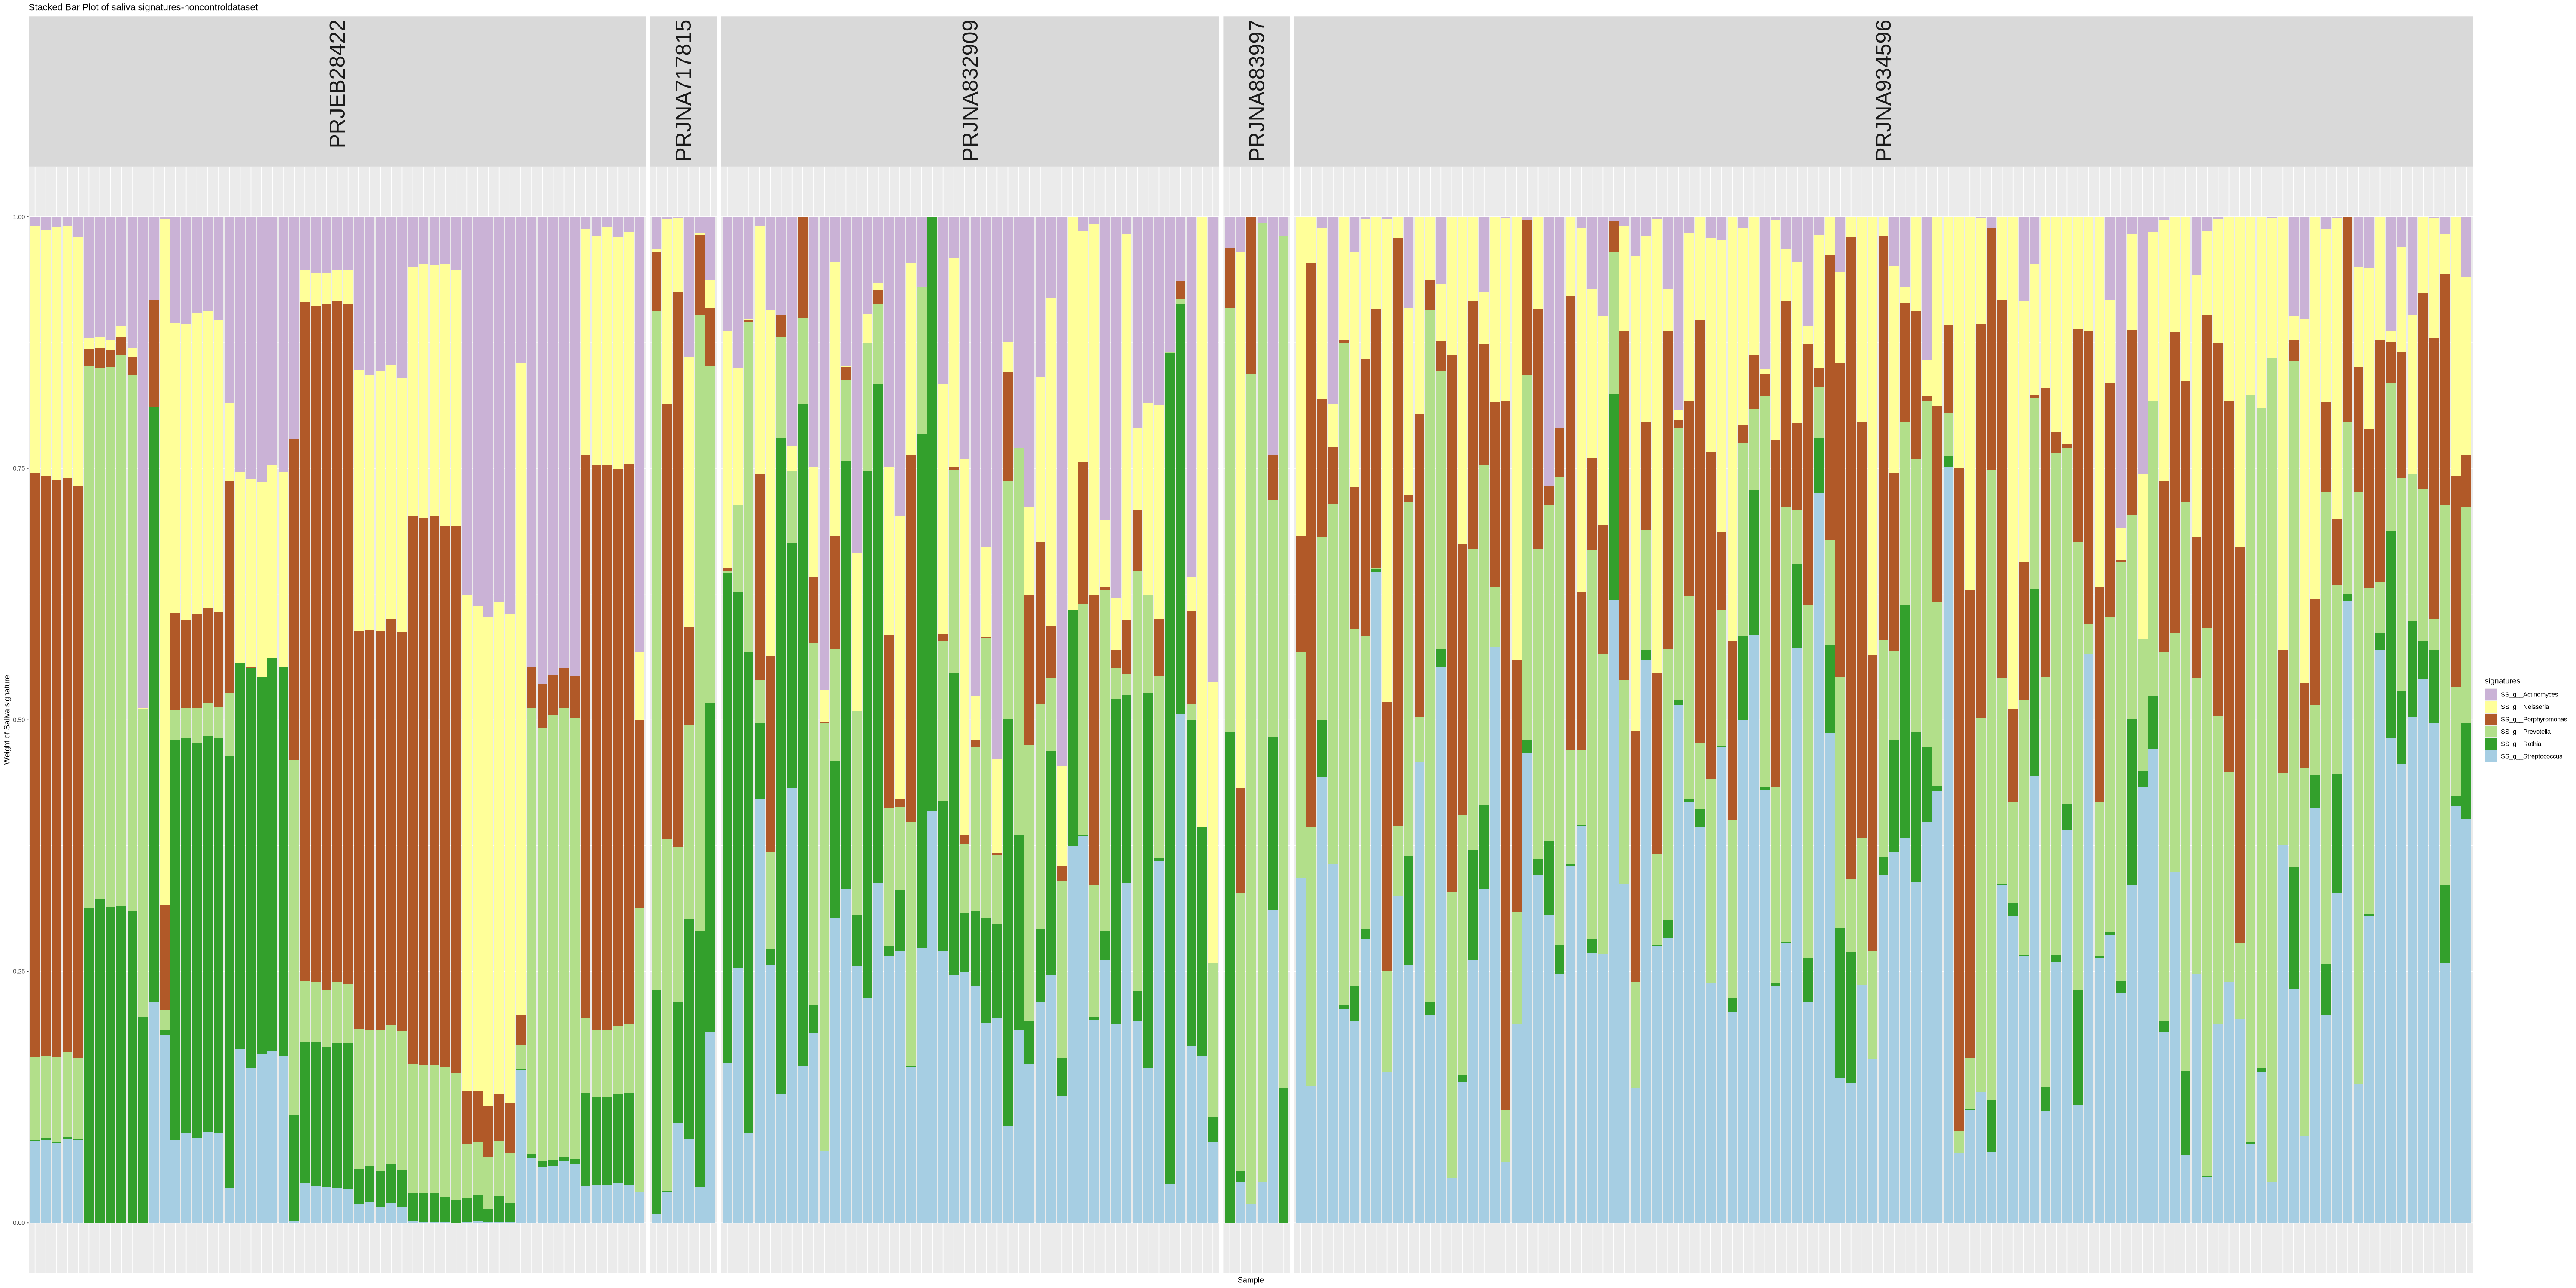

In [617]:


ggplot(df_flip_gr, aes(x = interaction(Samples, group), y = Abundance, fill = signatures)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Stacked Bar Plot of saliva signatures-noncontroldataset",
       x = "Sample",
       y = "Weight of Saliva signature") +
  scale_fill_manual(values = custom_palette) + 
  theme(axis.text.x = element_blank(), # Hide the x-axis text
        axis.ticks.x = element_blank(), # Hide the x-axis ticks
        strip.text.x = element_text(angle = 90, hjust = 1, size = 30)) + # Rotate and align facet labels with larger size
  facet_grid(~ group, scales = "free_x", space = "free_x")

In [618]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

In [622]:
 pdf("signpattern_unhealthy-224_stack_all-sep.pdf", width = 40, height = 20 )
ggplot(df_flip_gr, aes(x = interaction(Samples, group), y = Abundance, fill = signatures)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Stacked Bar Plot of saliva signatures",
       x = "Sample",
       y = "Weight of Saliva signature") +
  scale_fill_manual(values = custom_palette) + 
  theme(axis.text.x = element_blank(), # Hide the x-axis text
        axis.ticks.x = element_blank(), # Hide the x-axis ticks
        strip.text.x = element_text(angle = 90, hjust = 1, size = 30)) + # Rotate and align facet labels with larger size
  facet_grid(~ group, scales = "free_x", space = "free_x")
dev.off()

png 
  2

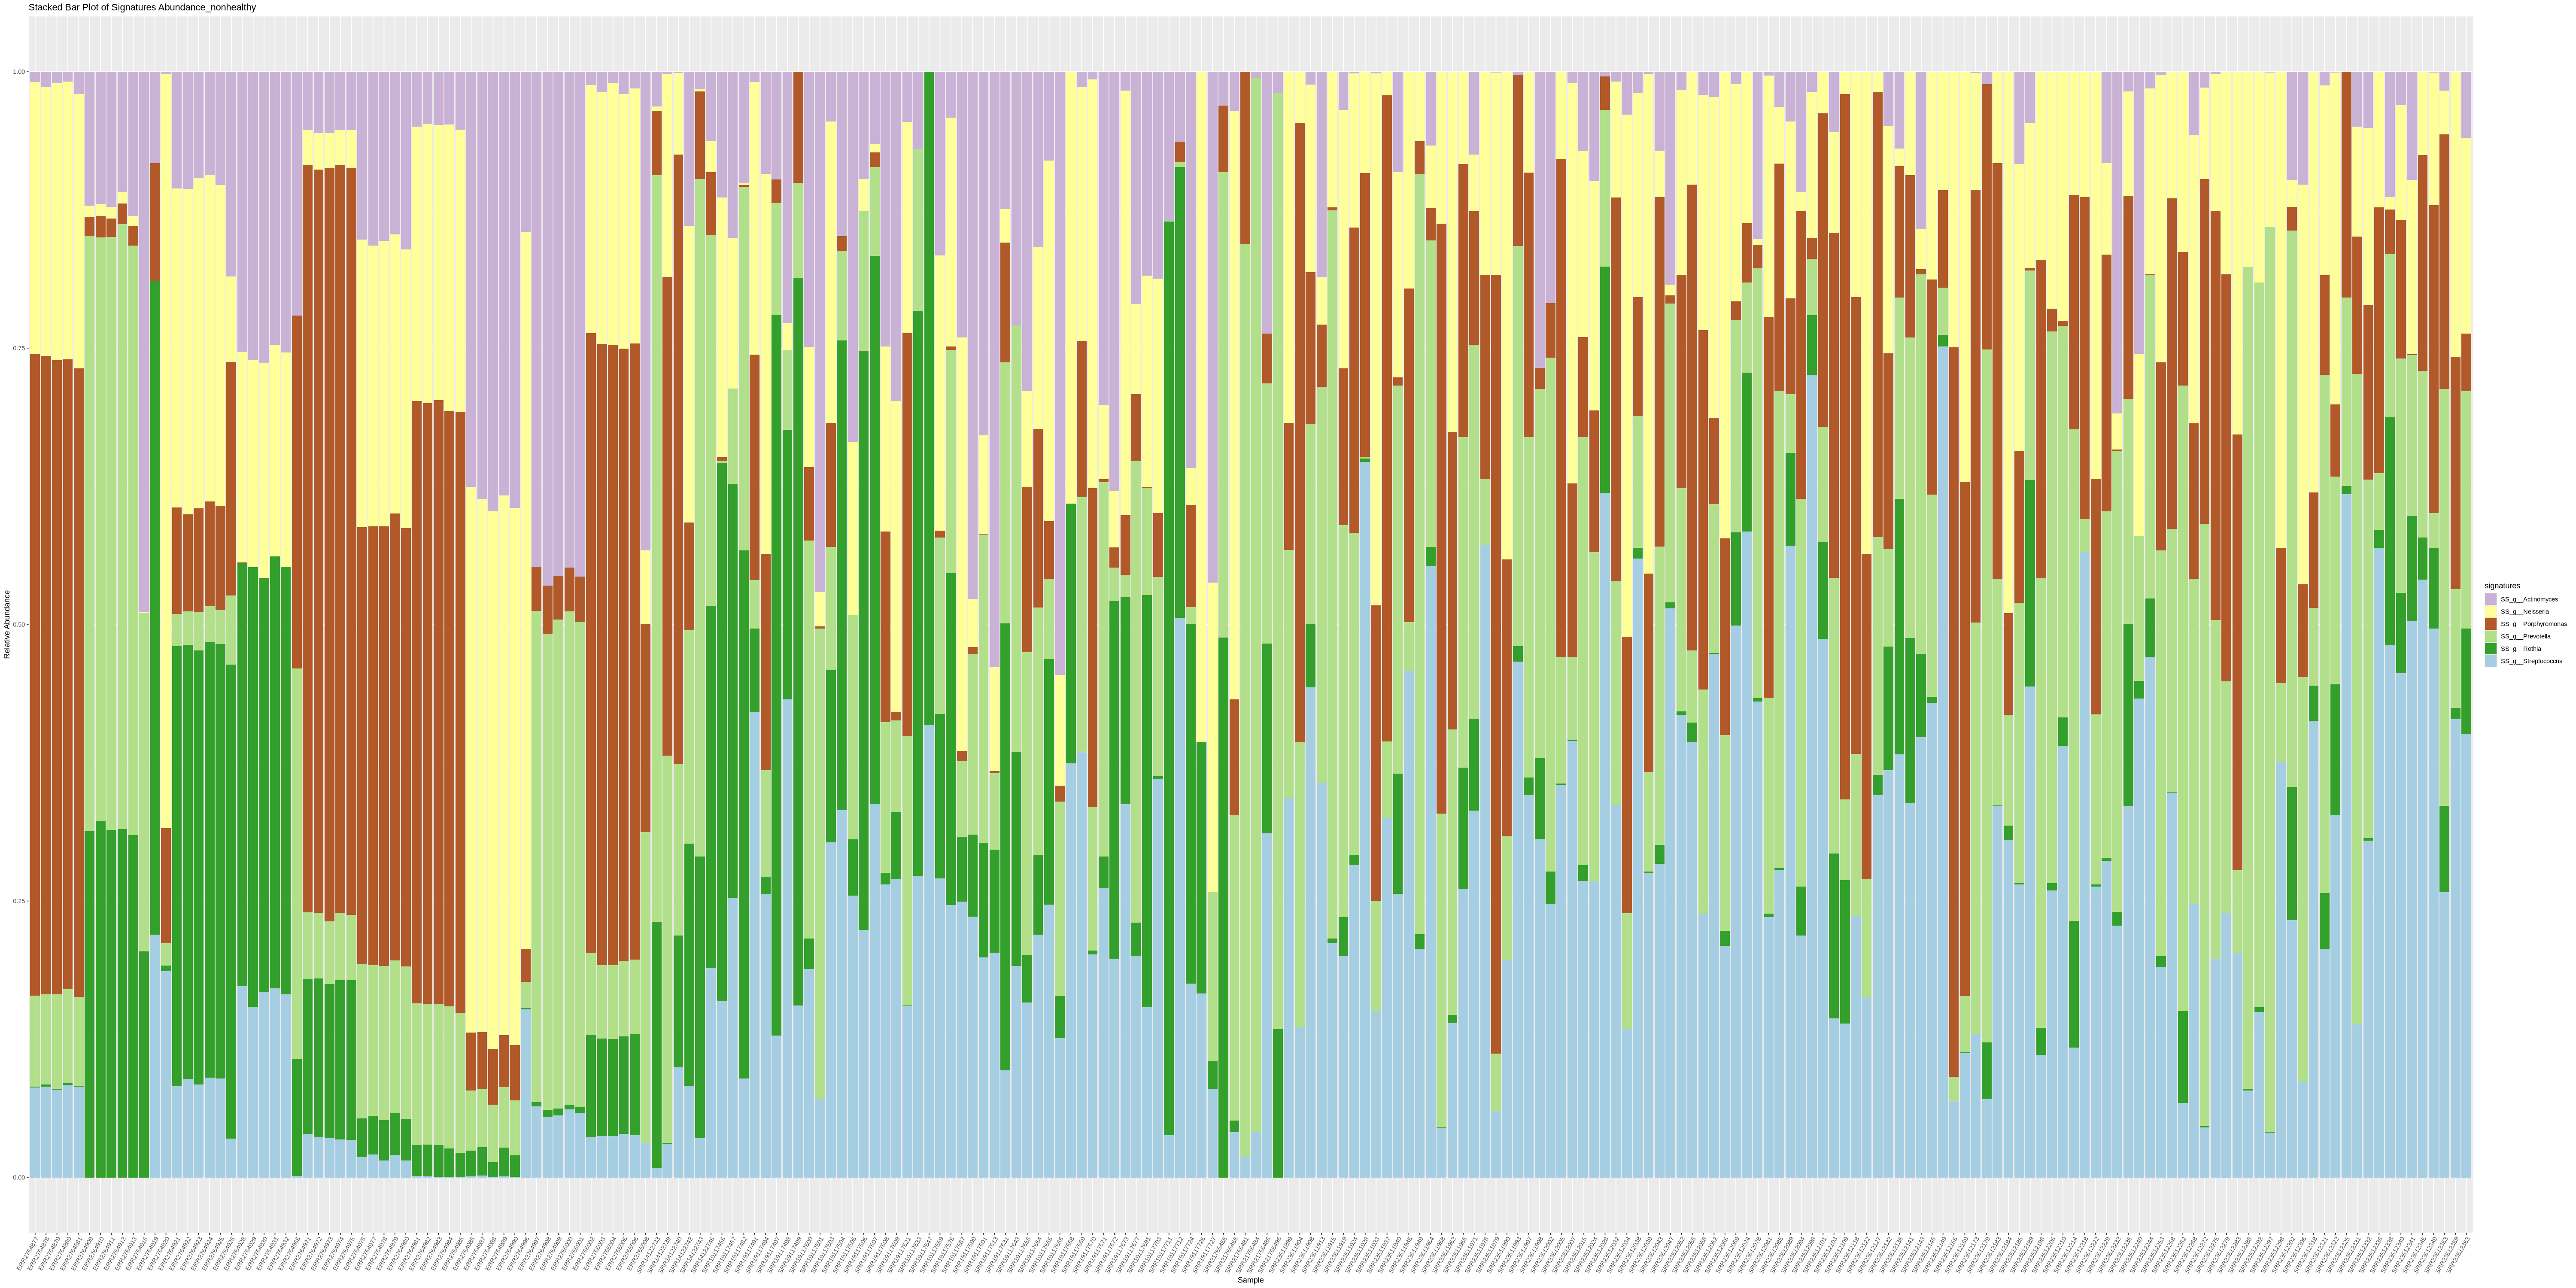

In [372]:
#custom_palette <- topo.colors(7)
#custom_palette <- rainbow(6)
#custom_palette <- heat.colors(6)
#custom_palette <- cm.colors(7)
options(repr.plot.width=50 , repr.plot.height= 25)
ggplot(df_long, aes(x = Samples, y = Abundance, fill = signatures)) +
  geom_bar(stat = "identity") +
  labs(title = "Stacked Bar Plot of Signatures Abundance_nonhealthy ",
       x = "Sample",
       y = "Relative Abundance") +
scale_fill_manual(values = custom_palette) + 
  theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [374]:
 pdf("signpattern_noncontrol-224_stack_all.pdf", width = 40, height = 30 )
ggplot(df_long, aes(x = Samples, y = Abundance, fill = signatures)) +
  geom_bar(stat = "identity") +
  labs(title = "Stacked Bar Plot of Signatures weight_noncontrol ",
       x = "Sample",
       y = "Weight of Saliva Signatures") +
scale_fill_manual(values = custom_palette) + 
  theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 15),  # Increase text size for x-axis
        axis.text.y = element_text(size = 35),  # Increase text size for y-axis
        axis.title = element_text(size = 35),  # Increase text size for axis titles
        plot.title = element_text(size = 35))   # Increase text size for plot title 
  
dev.off()

png 
  2

In [392]:
#dropping 0 from W_norm matrix
W_norm_no0 <- W_norm[rowSums(W_norm) != 0, ]
head(W_norm_no0)
dim(W_norm_no0)

,SS_g__Streptococcus,SS_g__Prevotella,SS_g__Neisseria,SS_g__Actinomyces,SS_g__Rothia,SS_g__Porphyromonas
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.02872577,0.21845499,1.724317e-01,2.400553e-01,3.403322e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.08448926,0.04287267,6.823470e-02,8.044003e-01,1.139646e-09,3.097719e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.00000000,1.00000000,0.000000e+00,7.457388e-11,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,0.17670036,0.29739445,0.000000e+00,4.219913e-01,1.039139e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,0.14001559,0.00000000,4.467984e-01,2.450097e-01,1.681763e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,0.28434809,0.16891828,8.725083e-08,1.270140e-01,0.000000e+00,4.197195e-01


[1] 222   6

In [393]:
# ES assignments of genera
    assignments = as.data.frame(apply(W_norm_no0,1,function(x) which(x==max(x))))
# ES assignments of samples
    sample_assignments = as.data.frame(apply(H_norm,2,function(x) which(x==max(x)))) 
    

In [394]:
head(W_norm_no0)
dim(W_norm_no0)

,SS_g__Streptococcus,SS_g__Prevotella,SS_g__Neisseria,SS_g__Actinomyces,SS_g__Rothia,SS_g__Porphyromonas
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.02872577,0.21845499,1.724317e-01,2.400553e-01,3.403322e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.08448926,0.04287267,6.823470e-02,8.044003e-01,1.139646e-09,3.097719e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.00000000,1.00000000,0.000000e+00,7.457388e-11,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,0.17670036,0.29739445,0.000000e+00,4.219913e-01,1.039139e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,0.14001559,0.00000000,4.467984e-01,2.450097e-01,1.681763e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,0.28434809,0.16891828,8.725083e-08,1.270140e-01,0.000000e+00,4.197195e-01


[1] 222   6

In [395]:
head(assignments)
dim(assignments)

,"apply(W_norm_no0, 1, function(x) which(x == max(x)))"
,<int>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,5
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,4
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,2
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,4
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,3
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,6


[1] 222   1

In [396]:
 names(assignments) = names(sample_assignments) = c("prediction")

In [397]:
head(sample_assignments)

,prediction
,<int>
SRR21765456,5
SRR21765466,3
SRR21765481,2
SRR21765484,2
SRR21765486,1
SRR21765496,2


In [398]:
head((assignments))

,prediction
,<int>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,5
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,4
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,2
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,4
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,3
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,6


In [399]:
# associate the name of ES to the assignment
    assignments$prediction_nm = es_names[assignments$prediction]
    sample_assignments$prediction_nm = es_names[sample_assignments$prediction]

In [400]:
head(assignments)
dim(assignments)
head(sample_assignments)
dim(sample_assignments)

,prediction,prediction_nm
,<int>,<chr>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,5,SS_g__Rothia
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,4,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,2,SS_g__Prevotella
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,4,SS_g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,3,SS_g__Neisseria
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,6,SS_g__Porphyromonas


[1] 222   2

,prediction,prediction_nm
,<int>,<chr>
SRR21765456,5,SS_g__Rothia
SRR21765466,3,SS_g__Neisseria
SRR21765481,2,SS_g__Prevotella
SRR21765484,2,SS_g__Prevotella
SRR21765486,1,SS_g__Streptococcus
SRR21765496,2,SS_g__Prevotella


[1] 224   2

In [401]:
 # add genus or sample as a column to the df
    assignments$genus <- rownames(assignments)
    sample_assignments$sample <- rownames(sample_assignments)

In [402]:
head(sample_assignments)

,prediction,prediction_nm,sample
,<int>,<chr>,<chr>
SRR21765456,5,SS_g__Rothia,SRR21765456
SRR21765466,3,SS_g__Neisseria,SRR21765466
SRR21765481,2,SS_g__Prevotella,SRR21765481
SRR21765484,2,SS_g__Prevotella,SRR21765484
SRR21765486,1,SS_g__Streptococcus,SRR21765486
SRR21765496,2,SS_g__Prevotella,SRR21765496


In [403]:
head(assignments)

,prediction,prediction_nm,genus
,<int>,<chr>,<chr>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,5,SS_g__Rothia,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,4,SS_g__Actinomyces,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,2,SS_g__Prevotella,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,4,SS_g__Actinomyces,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,3,SS_g__Neisseria,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,6,SS_g__Porphyromonas,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia


In [404]:
 # retrieve assignment probability
    prob = as.data.frame(apply(W_norm_no0,1,max)) 
    head(prob)
dim(prob)

,"apply(W_norm_no0, 1, max)"
,<dbl>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.3403322
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.8044003
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,1.0000000
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,0.4219913
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,0.4467984
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,0.4197195


[1] 222   1

In [405]:
sample_prob = as.data.frame(apply(H_norm,2,max)) 
    names(prob) =  names(sample_prob) = c("probability")
    prob$genus <- rownames(prob)
    sample_prob$sample <- rownames(sample_prob)

In [406]:
head(sample_prob)
dim(sample_prob)
head(prob)
dim(prob)

,probability,sample
,<dbl>,<chr>
SRR21765456,0.4880931,SRR21765456
SRR21765466,0.5320635,SRR21765466
SRR21765481,0.8252448,SRR21765481
SRR21765484,0.9529060,SRR21765484
SRR21765486,0.3112288,SRR21765486
SRR21765496,0.8467506,SRR21765496


[1] 224   2

,probability,genus
,<dbl>,<chr>
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.3403322,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.8044003,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,1.0000000,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,0.4219913,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,0.4467984,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia,0.4197195,k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Schaalia


[1] 222   2

In [407]:
str(sample_assignments$prediction_nm)

 chr [1:224] "SS_g__Rothia" "SS_g__Neisseria" "SS_g__Prevotella" ...


In [408]:
assigned_sample_color = es2Col[sample_assignments$prediction_nm]
  

In [409]:
head(assigned_sample_color)
str(assigned_sample_color)

SS_g__Rothia     SS_g__Neisseria    SS_g__Prevotella    SS_g__Prevotella 
          "#D55E00"           "#483838"           "#009E73"           "#009E73" 
SS_g__Streptococcus    SS_g__Prevotella 
          "#E69F00"           "#009E73"

 Named chr [1:224] "#D55E00" "#483838" "#009E73" "#009E73" "#E69F00" ...
 - attr(*, "names")= chr [1:224] "SS_g__Rothia" "SS_g__Neisseria" "SS_g__Prevotella" "SS_g__Prevotella" ...


In [410]:
  names(assigned_sample_color) = sample_assignments$sample

In [411]:
head(assigned_sample_color)
str(assigned_sample_color)

SRR21765456 SRR21765466 SRR21765481 SRR21765484 SRR21765486 SRR21765496 
  "#D55E00"   "#483838"   "#009E73"   "#009E73"   "#E69F00"   "#009E73"

 Named chr [1:224] "#D55E00" "#483838" "#009E73" "#009E73" "#E69F00" ...
 - attr(*, "names")= chr [1:224] "SRR21765456" "SRR21765466" "SRR21765481" "SRR21765484" ...


In [414]:
head(sample_assignments)
dim(mdmx)

,prediction,prediction_nm,sample
,<int>,<chr>,<chr>
SRR21765456,5,SS_g__Rothia,SRR21765456
SRR21765466,3,SS_g__Neisseria,SRR21765466
SRR21765481,2,SS_g__Prevotella,SRR21765481
SRR21765484,2,SS_g__Prevotella,SRR21765484
SRR21765486,1,SS_g__Streptococcus,SRR21765486
SRR21765496,2,SS_g__Prevotella,SRR21765496


[1] 224   7

In [413]:
head(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA


In [415]:
sample_assignments$disease_status <- mdmx[match(mdmx$SmplID, sample_assignments$sample), "disease_status"]
sample_assignments$sex <- mdmx[match(mdmx$SmplID, sample_assignments$sample), "sex"]
sample_assignments$age <- mdmx[match(mdmx$SmplID, sample_assignments$sample), "age"]
head(sample_assignments)

,prediction,prediction_nm,sample,disease_status,sex,age
,<int>,<chr>,<chr>,<chr>,<chr>,<int>
SRR21765456,5,SS_g__Rothia,SRR21765456,COVID,F,91
SRR21765466,3,SS_g__Neisseria,SRR21765466,COVID,M,54
SRR21765481,2,SS_g__Prevotella,SRR21765481,COVID,M,50
SRR21765484,2,SS_g__Prevotella,SRR21765484,COVID,F,49
SRR21765486,1,SS_g__Streptococcus,SRR21765486,COVID,F,73
SRR21765496,2,SS_g__Prevotella,SRR21765496,COVID,M,65


In [416]:
#sample_assignments$age <- mdmx[match(mdmx$SmplID, sample_assignments$sample), "age"]
sample_assignments$BMI <- mdmx[match(mdmx$SmplID, sample_assignments$sample), "BMI"]
head(sample_assignments)

,prediction,prediction_nm,sample,disease_status,sex,age,BMI
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
SRR21765456,5,SS_g__Rothia,SRR21765456,COVID,F,91,NA
SRR21765466,3,SS_g__Neisseria,SRR21765466,COVID,M,54,NA
SRR21765481,2,SS_g__Prevotella,SRR21765481,COVID,M,50,NA
SRR21765484,2,SS_g__Prevotella,SRR21765484,COVID,F,49,NA
SRR21765486,1,SS_g__Streptococcus,SRR21765486,COVID,F,73,NA
SRR21765496,2,SS_g__Prevotella,SRR21765496,COVID,M,65,NA


In [417]:
unique(sample_assignments$sex)
dim(sample_assignments)
table(sample_assignments$sex)
table(sample_assignments$disease_status)

[1] "F" "M" "0"

[1] 224   7


  0   F   M 
  6 156  62 


 colorectal cancer              COVID full-term delivery               PDAC 
                56                  6                 38                 46 
     periodontitis      pre-eclampsia  pre-term delivery      small adenoma 
                 6                 28                 43                  1 

In [418]:
table(sample_assignments$age)


19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 44 49 50 53 54 55 
 4  4  8  6  4  6  7  9  7  5  7  7  5  5  1  4  8  4  6  2  1  1  1  5  2  5 
60 62 63 64 65 67 68 69 70 73 76 79 80 91 
 1  5  6  5  1  5  5 10 46  6  1  1  1  1 

In [419]:
head(assigned_sample_color)

SRR21765456 SRR21765466 SRR21765481 SRR21765484 SRR21765486 SRR21765496 
  "#D55E00"   "#483838"   "#009E73"   "#009E73"   "#E69F00"   "#009E73"

In [420]:
sample_assignments$disease_status <- as.factor(sample_assignments$disease_status)
sample_assignments$sex <- as.factor(sample_assignments$sex)

In [421]:
all_es_names

[1] "SS_g__Streptococcus" "SS_g__Prevotella"    "SS_g__Neisseria"    
[4] "SS_g__Rothia"        "SS_g__Actinomyces"   "SS_g__Porphyromonas"

In [422]:
unique(sample_assignments$disease_status)
table(sample_assignments$disease_status)
dim(sample_assignments)

[1] COVID              colorectal cancer  small adenoma      periodontitis     
[5] PDAC               full-term delivery pre-term delivery  pre-eclampsia     
8 Levels: colorectal cancer COVID full-term delivery PDAC ... small adenoma


 colorectal cancer              COVID full-term delivery               PDAC 
                56                  6                 38                 46 
     periodontitis      pre-eclampsia  pre-term delivery      small adenoma 
                 6                 28                 43                  1 

[1] 224   7

In [423]:
es_pointshape=c(19,0,2,6,8,13,9,2)#10)  0: square :preeclampsia  ## 2:preterm_delivery   ## 19:circle: full
names(es_pointshape)= unique(sample_assignments$disease_status)
sample_shape = es_pointshape[sample_assignments$disease_status] 
    names(sample_shape) = sample_assignments$sample 

In [424]:
es_pointshape_sex=c(0, 19 ,2)#,6,8,13,9,2,10) 0:square=female , 4: cross =male
names(es_pointshape_sex)= unique(sample_assignments$sex)
sample_shape_sex = es_pointshape_sex[sample_assignments$sex] 
    names(sample_shape_sex) = sample_assignments$sample 

In [425]:
head(sample_shape)

SRR21765456 SRR21765466 SRR21765481 SRR21765484 SRR21765486 SRR21765496 
          0           0           0           0           0           0

In [426]:
head(sample_assignments)

,prediction,prediction_nm,sample,disease_status,sex,age,BMI
,<int>,<chr>,<chr>,<fct>,<fct>,<int>,<dbl>
SRR21765456,5,SS_g__Rothia,SRR21765456,COVID,F,91,NA
SRR21765466,3,SS_g__Neisseria,SRR21765466,COVID,M,54,NA
SRR21765481,2,SS_g__Prevotella,SRR21765481,COVID,M,50,NA
SRR21765484,2,SS_g__Prevotella,SRR21765484,COVID,F,49,NA
SRR21765486,1,SS_g__Streptococcus,SRR21765486,COVID,F,73,NA
SRR21765496,2,SS_g__Prevotella,SRR21765496,COVID,M,65,NA


In [427]:
head(pcoa)

,Samples,Dim1,Dim2
,<chr>,<dbl>,<dbl>
1,SRR21765456,0.2092211,-0.32783505
2,SRR21765466,0.2109088,-0.03505336
3,SRR21765481,0.2388132,-0.44149306
4,SRR21765484,0.1332855,-0.49053479
5,SRR21765486,-0.1945827,-0.11172799
6,SRR21765496,0.1650821,-0.47481246


In [428]:
mds_data <- merge(x=sample_assignments, y=pcoa, by.x="sample" , by.y="Samples")
head(mds_data)
dim(mds_data)

,sample,prediction,prediction_nm,disease_status,sex,age,BMI,Dim1,Dim2
,<chr>,<int>,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,ERR2764877,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3493289,0.2217070
2,ERR2764878,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3433344,0.2216985
3,ERR2764879,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3514684,0.2187840
4,ERR2764880,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3500559,0.2192902
5,ERR2764881,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3410541,0.2190539
6,ERR2764909,2,SS_g__Prevotella,colorectal cancer,M,63,25,0.1001265,-0.3211594


[1] 224   9

In [429]:
adonis2(mx_norm.bray ~ prediction_nm , data=mds_data, perm=999, na.action=na.omit)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
prediction_nm,5,2.84256,0.09020698,4.322988,0.001
Residual,218,28.66897,0.90979302,NA,NA
Total,223,31.51153,1.00000000,NA,NA


In [554]:
head(mds_data_ait)
head(mds_data)

,SmplID,age,disease_status,sex,Dim1,Dim2
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,ERR2764877,62,colorectal cancer,F,0.3493289,0.2217070
2,ERR2764878,62,colorectal cancer,F,0.3433344,0.2216985
3,ERR2764879,62,colorectal cancer,F,0.3514684,0.2187840
4,ERR2764880,62,colorectal cancer,F,0.3500559,0.2192902
5,ERR2764881,62,colorectal cancer,F,0.3410541,0.2190539
6,ERR2764909,63,colorectal cancer,M,0.1001265,-0.3211594


,sample,prediction,prediction_nm,disease_status,sex,age,BMI,Dim1,Dim2
,<chr>,<int>,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,ERR2764877,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3493289,0.2217070
2,ERR2764878,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3433344,0.2216985
3,ERR2764879,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3514684,0.2187840
4,ERR2764880,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3500559,0.2192902
5,ERR2764881,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3410541,0.2190539
6,ERR2764909,2,SS_g__Prevotella,colorectal cancer,M,63,25,0.1001265,-0.3211594


In [557]:
gr_mds <- mds_data %>%
  mutate(group = case_when(
    startsWith(sample, "ERR276") ~ "PRJEB28422",
    startsWith(sample, "SRR2176") ~ "PRJNA883997",
    startsWith(sample, "ERR1474") ~ "PRJEB14383",
    startsWith(sample, "SRR14122") ~ "PRJNA717815",
    startsWith(sample, "SRR19117") ~ "PRJNA832909",
      startsWith(sample, "SRR2351") ~ "PRJNA934596",
    TRUE ~ "PRJNA48479"
  ))
# Group the dataframe based on the 'group' column
gr_mds <- gr_mds %>% group_by(group)
gr_mds <- gr_mds %>% relocate(group, .after = sample)
head(gr_mds)
dim(gr_mds)

sample,group,prediction,prediction_nm,disease_status,sex,age,BMI,Dim1,Dim2
<chr>,<chr>,<int>,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
ERR2764877,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3493289,0.2217070
ERR2764878,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3433344,0.2216985
ERR2764879,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3514684,0.2187840
ERR2764880,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3500559,0.2192902
ERR2764881,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3410541,0.2190539
ERR2764909,PRJEB28422,2,SS_g__Prevotella,colorectal cancer,M,63,25,0.1001265,-0.3211594


[1] 224  10

In [559]:
unique(gr_mds$group)
table(gr_mds$group)

[1] "PRJEB28422"  "PRJNA717815" "PRJNA832909" "PRJNA883997" "PRJNA934596"


 PRJEB28422 PRJNA717815 PRJNA832909 PRJNA883997 PRJNA934596 
         57           6          46           6         109 

In [568]:
a <- gr_mds[(gr_mds$group)=="PRJEB28422",]
a <- as.data.frame(a)
head(a)
dim(a)


,sample,group,prediction,prediction_nm,disease_status,sex,age,BMI,Dim1,Dim2
,<chr>,<chr>,<int>,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,ERR2764877,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3493289,0.2217070
2,ERR2764878,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3433344,0.2216985
3,ERR2764879,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3514684,0.2187840
4,ERR2764880,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3500559,0.2192902
5,ERR2764881,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3410541,0.2190539
6,ERR2764909,PRJEB28422,2,SS_g__Prevotella,colorectal cancer,M,63,25,0.1001265,-0.3211594


[1] 57 10

In [605]:
rownames(a) <- a$sample

a$prediction_nm <- as.factor(a$prediction_nm)
assigned_sample_color_a = es2Col[a$prediction_nm]
head(assigned_sample_color_a)
 names(assigned_sample_color_a) = a$sample
head(a)

SS_g__Neisseria SS_g__Neisseria SS_g__Neisseria SS_g__Neisseria SS_g__Neisseria 
      "#483838"       "#483838"       "#483838"       "#483838"       "#483838" 
   SS_g__Rothia 
      "#D55E00"

,sample,group,prediction,prediction_nm,disease_status,sex,age,BMI,Dim1,Dim2
,<chr>,<chr>,<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
ERR2764877,ERR2764877,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3493289,0.2217070
ERR2764878,ERR2764878,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3433344,0.2216985
ERR2764879,ERR2764879,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3514684,0.2187840
ERR2764880,ERR2764880,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3500559,0.2192902
ERR2764881,ERR2764881,PRJEB28422,6,SS_g__Porphyromonas,colorectal cancer,F,62,21,0.3410541,0.2190539
ERR2764909,ERR2764909,PRJEB28422,2,SS_g__Prevotella,colorectal cancer,M,63,25,0.1001265,-0.3211594


In [606]:
es_pointshape_a=c(19,0,2,6,8,13,9,2)#10)  0: square :preeclampsia  ## 2:preterm_delivery   ## 19:circle: full
names(es_pointshape_a)= unique(a$disease_status)
sample_shape_a = es_pointshape_a[a$disease_status] 
    names(sample_shape_a) = a$sample 

In [607]:
pcoa_a <- as.data.frame(scores(mx_norm.b.pcoa, choices = c(1, 2)))
                        head(pcoa_a)
common_row_names <- intersect(rownames(a), rownames(pcoa_a))
# Subset pcoa_a based on common row names
sub <- pcoa_a[common_row_names, ]
head(sub)
dim(sub)

,Dim1,Dim2
,<dbl>,<dbl>
SRR21765456,0.2092211,-0.32783505
SRR21765466,0.2109088,-0.03505336
SRR21765481,0.2388132,-0.44149306
SRR21765484,0.1332855,-0.49053479
SRR21765486,-0.1945827,-0.11172799
SRR21765496,0.1650821,-0.47481246


,Dim1,Dim2
,<dbl>,<dbl>
ERR2764877,0.3493289,0.2217070
ERR2764878,0.3433344,0.2216985
ERR2764879,0.3514684,0.2187840
ERR2764880,0.3500559,0.2192902
ERR2764881,0.3410541,0.2190539
ERR2764909,0.1001265,-0.3211594


[1] 57  2

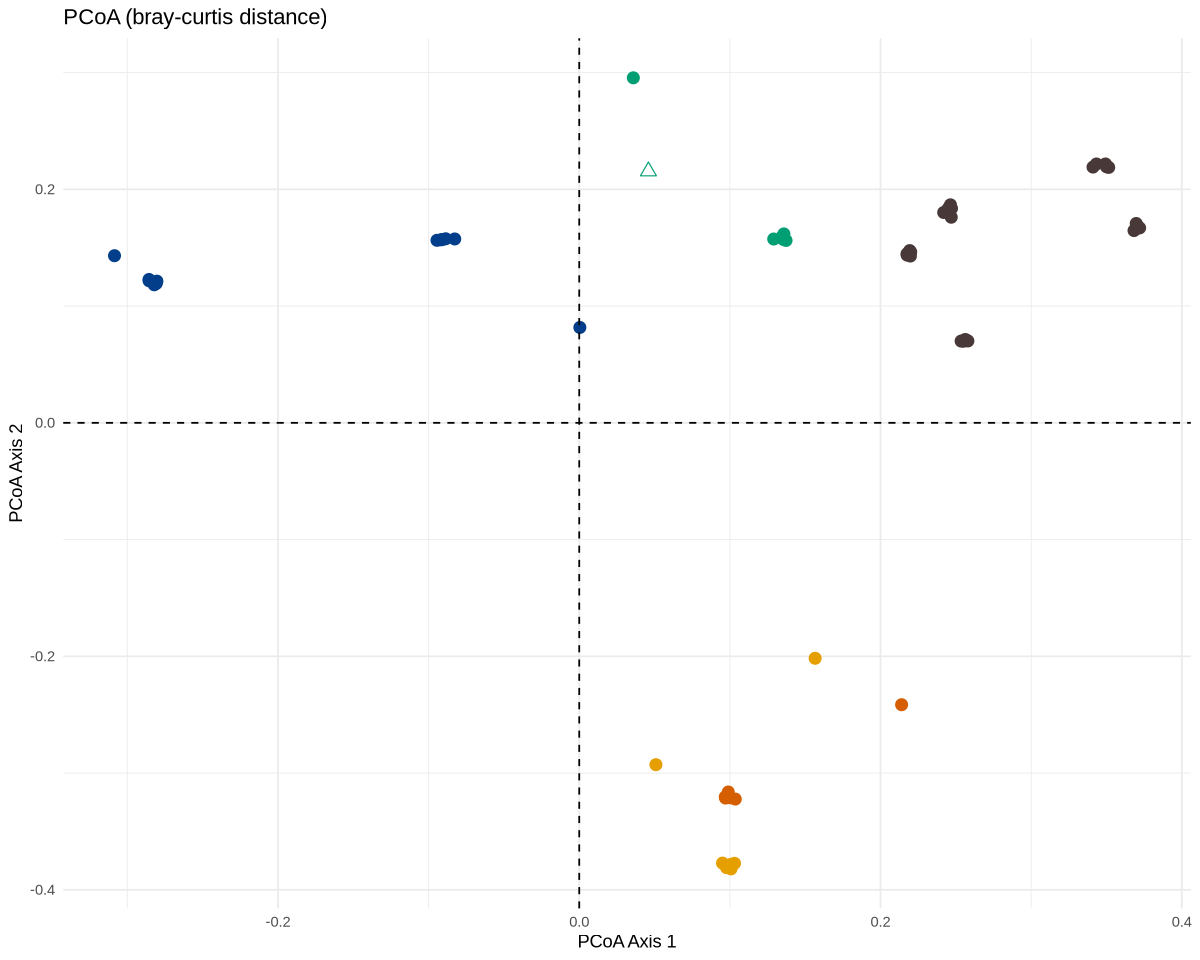

In [611]:
options(repr.plot.width=10, repr.plot.height= 8)
p <- ggplot() +
  geom_point(data = sub,
             aes(x = Dim1, y = Dim2, color = assigned_sample_color_a[rownames(a)], cex= 1.2),
             shape = sample_shape_a, size = 3) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_vline(xintercept = 0, linetype = "dashed") +
  labs(title = "PCoA (bray-curtis distance)",
       x = "PCoA Axis 1", y = "PCoA Axis 2") +
  scale_color_identity() +
  theme_minimal()


# Print the plot
print(p)

species scores not available

Warning message in complete.cases(pts) & !is.na(groups):
“longer object length is not a multiple of shorter object length”
Warning message in groups == is & kk:
“longer object length is not a multiple of shorter object length”


ERROR: Error in cov.wt(X, W): 'x' must contain finite values only


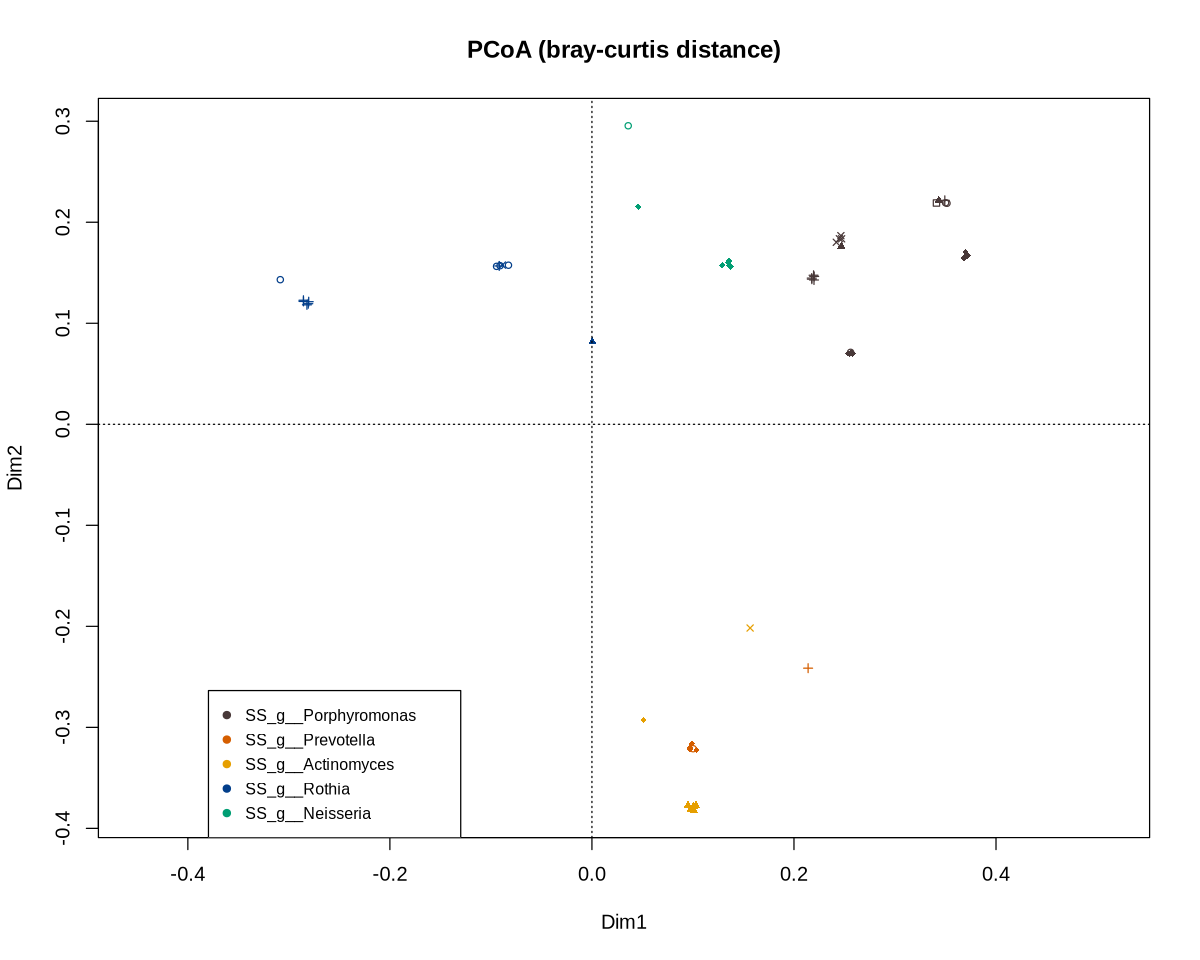

In [612]:
# Create the ordination plot
ordiplot(sub, type="none", main="PCoA (bray-curtis distance)")
points(sub, col = assigned_sample_color_a[rownames(a)], pch=sample_shape, cex=0.7)
abline(h=0, lty=3)
abline(v=0, lty=3)

# Extract unique colors and their corresponding labels
unique_colors <- unique(assigned_sample_color_a)
legend_labels <- unique(a$prediction_nm)

# Create legend based on colors
legend("bottomleft", legend=legend_labels, col=unique_colors, pch=rep(19, length(unique_colors)), cex=0.8)

# Annotate plot with variance explained
#total_variance <- sum(mx_norm.b.pcoa$eig)
#variance_explained <- (mx_norm.b.pcoa$eig / total_variance) * 100
#mtext(paste("Variance explained:\nPCoA Axis 1:", round(variance_explained[1], 2), "%\nPCoA Axis 2:", round(variance_explained[2], 2), "%"), side = 3, line = 0.5, adj = 0, cex = 0.8)

ordiellipse(mx_norm.b.pcoa, groups = a$prediction_nm, conf = 0.95, col = es2Col[names(summary(as.factor(a$prediction_nm)))])

# Add a pie chart in the margin
#par(fig= c(0.72,1,0.15,0.25), new=TRUE, mar=c(0,0,0,0))
#pie(summary(as.factor(sample_assignments$prediction_nm)), labels=NA, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])


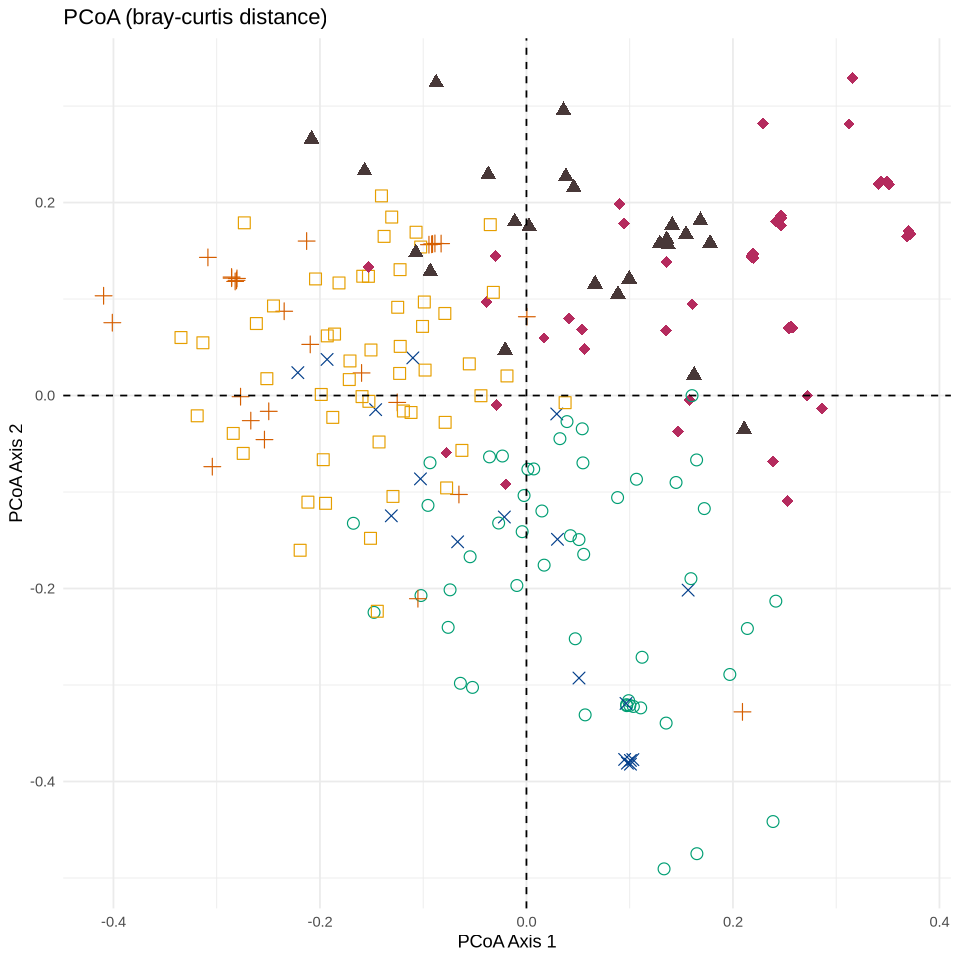

In [593]:
options(repr.plot.width=8, repr.plot.height= 8)
p <- ggplot() +
  geom_point(data = as.data.frame(scores(mx_norm.b.pcoa, choices = c(1, 2))),
             aes(x = Dim1, y = Dim2, color = assigned_sample_color[rownames(scores(mx_norm.b.pcoa, choices = c(1, 2)))]),
             shape = sample_shape, size = 3) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_vline(xintercept = 0, linetype = "dashed") +
  labs(title = "PCoA (bray-curtis distance)",
       x = "PCoA Axis 1", y = "PCoA Axis 2") +
  scale_color_identity() +
  theme_minimal()


# Print the plot
print(p)


species scores not available



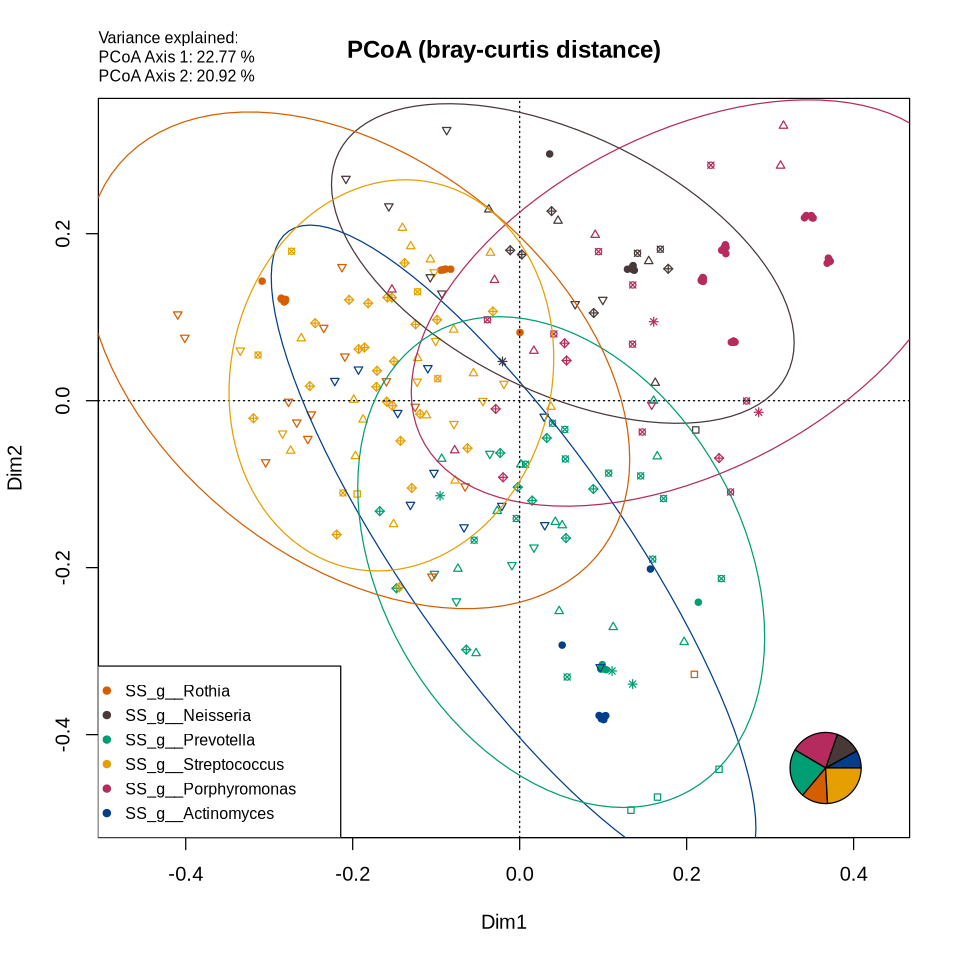

In [443]:
# Create the ordination plot
ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main="PCoA (bray-curtis distance)")
points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = assigned_sample_color[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))], pch=sample_shape, cex=0.7)
abline(h=0, lty=3)
abline(v=0, lty=3)

# Extract unique colors and their corresponding labels
unique_colors <- unique(assigned_sample_color)
legend_labels <- unique(sample_assignments$prediction_nm)

# Create legend based on colors
legend("bottomleft", legend=legend_labels, col=unique_colors, pch=rep(19, length(unique_colors)), cex=0.8)

# Annotate plot with variance explained
total_variance <- sum(mx_norm.b.pcoa$eig)
variance_explained <- (mx_norm.b.pcoa$eig / total_variance) * 100
mtext(paste("Variance explained:\nPCoA Axis 1:", round(variance_explained[1], 2), "%\nPCoA Axis 2:", round(variance_explained[2], 2), "%"), side = 3, line = 0.5, adj = 0, cex = 0.8)

ordiellipse(mx_norm.b.pcoa, groups = sample_assignments$prediction_nm, conf = 0.95, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])

# Add a pie chart in the margin
par(fig= c(0.72,1,0.15,0.25), new=TRUE, mar=c(0,0,0,0))
pie(summary(as.factor(sample_assignments$prediction_nm)), labels=NA, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])


In [444]:
# Create the ordination plot
pdf("all-noncontrols-224.pdf")
ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main="PCoA (bray-curtis distance)")
points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = assigned_sample_color[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))], pch=sample_shape, cex=0.7)
abline(h=0, lty=3)
abline(v=0, lty=3)

# Extract unique colors and their corresponding labels
unique_colors <- unique(assigned_sample_color)
legend_labels <- unique(sample_assignments$prediction_nm)

# Create legend based on colors
legend("bottomleft", legend=legend_labels, col=unique_colors, pch=rep(19, length(unique_colors)), cex=0.8)

# Annotate plot with variance explained
total_variance <- sum(mx_norm.b.pcoa$eig)
variance_explained <- (mx_norm.b.pcoa$eig / total_variance) * 100
mtext(paste("Variance explained:\nPCoA Axis 1:", round(variance_explained[1], 2), "%\nPCoA Axis 2:", round(variance_explained[2], 2), "%"), side = 3, line = 0.5, adj = 0, cex = 0.8)

ordiellipse(mx_norm.b.pcoa, groups = sample_assignments$prediction_nm, conf = 0.95, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])

# Add a pie chart in the margin
par(fig= c(0.72,1,0.15,0.25), new=TRUE, mar=c(0,0,0,0))
pie(summary(as.factor(sample_assignments$prediction_nm)), labels=NA, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])
dev.off()

species scores not available



png 
  2

In [168]:
setwd("/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test/")

In [432]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

In [433]:
pdf("pcoa_nonhealthy_all.pdf")
ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main="PCoA (bray-curtis distance)")
points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = assigned_sample_color[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))], pch=sample_shape, cex=0.7)
abline(h=0, lty=3)
abline(v=0, lty=3)

# Extract unique colors and their corresponding labels
unique_colors <- unique(assigned_sample_color)
legend_labels <- unique(sample_assignments$prediction_nm)

# Create legend based on colors
legend("bottomleft", legend=legend_labels, col=unique_colors, pch=rep(19, length(unique_colors)), cex=0.8)

# Annotate plot with variance explained
total_variance <- sum(mx_norm.b.pcoa$eig)
variance_explained <- (mx_norm.b.pcoa$eig / total_variance) * 100
mtext(paste("Variance explained:\nPCoA Axis 1:", round(variance_explained[1], 2), "%\nPCoA Axis 2:", round(variance_explained[2], 2), "%"), side = 3, line = 0.5, adj = 0, cex = 0.8)

ordiellipse(mx_norm.b.pcoa, groups = sample_assignments$prediction_nm, conf = 0.95, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])

# Add a pie chart in the margin
par(fig= c(0.72,0.97,0.1,0.2), new=TRUE, mar=c(0,0,0,0))
pie(summary(as.factor(sample_assignments$prediction_nm)), labels=NA, col = es2Col[names(summary(as.factor(sample_assignments$prediction_nm)))])
dev.off()

species scores not available



png 
  2

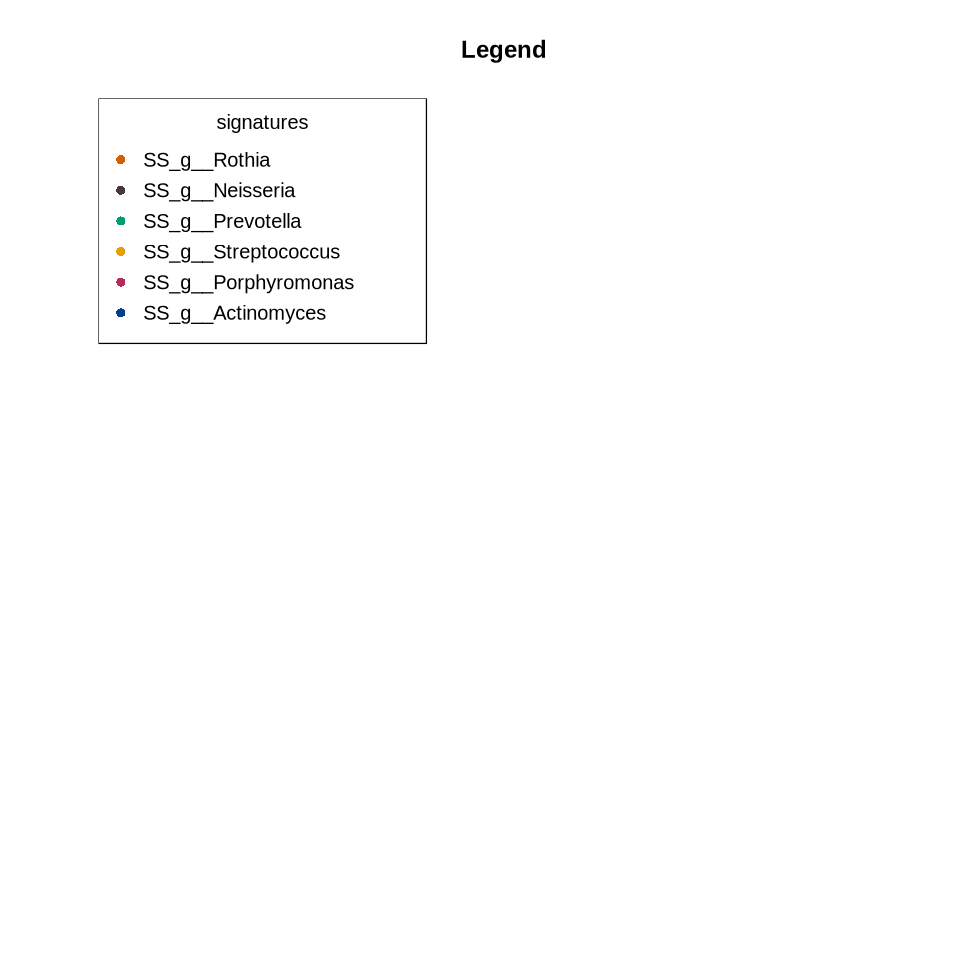

In [434]:
# Create an empty plot for the legend
plot(1, type="n", axes=FALSE, xlab="", ylab="", main="Legend")

# Add legend for point shapes based on disease status
legend("topleft", legend=legend_labels, col=unique_colors, pch=rep(16, length(unique_colors)), cex=1 , title= "signatures")

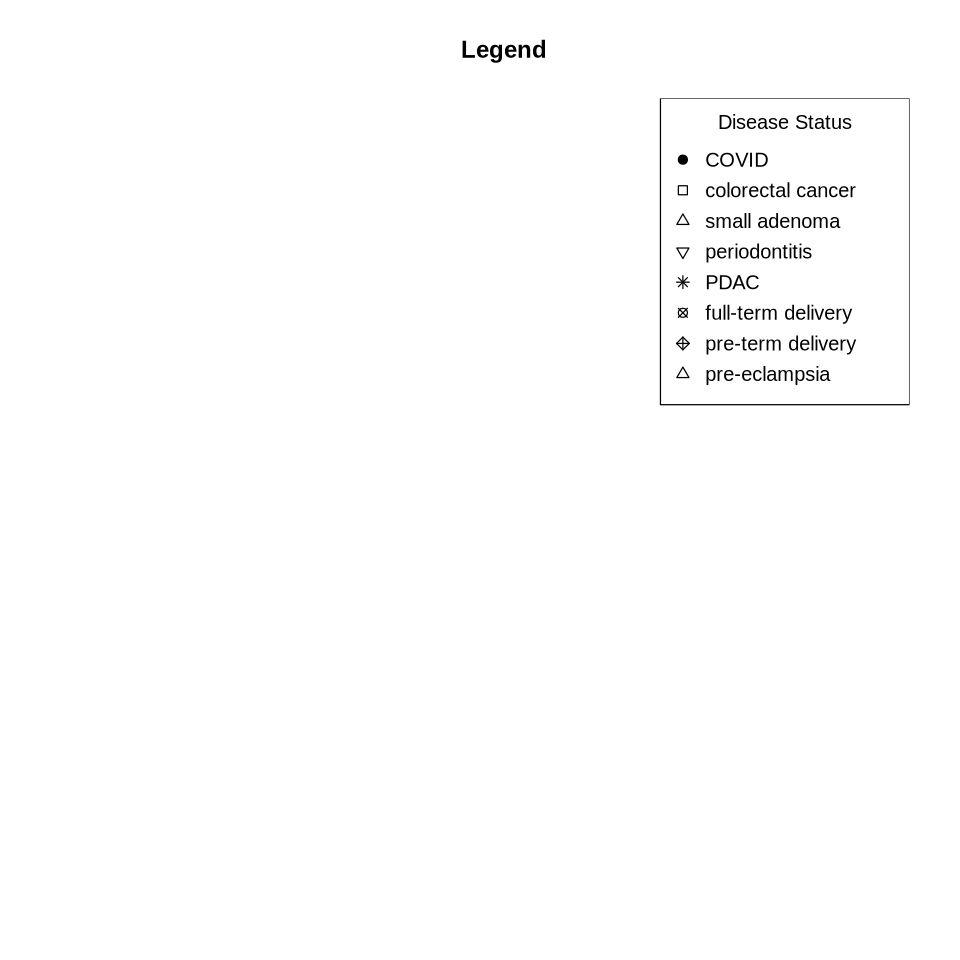

In [445]:
# Create an empty plot for the legend
plot(1, type="n", axes=FALSE, xlab="", ylab="", main="Legend")

# Add legend for point shapes based on disease status
legend("topright", legend = names(es_pointshape), pch = es_pointshape, cex = 1, title = "Disease Status")

## SS diversity analysis : 

In [446]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

In [447]:
head(H_norm)
head(W_norm)

,SRR21765456,SRR21765466,SRR21765481,SRR21765484,SRR21765486,SRR21765496,ERR2764879,ERR2764880,ERR2764881,ERR2764878,⋯,SRR23512052,SRR23512047,SRR23512043,SRR23512039,SRR23512034,SRR23512222,SRR23512218,SRR23512214,SRR23512210,SRR23512205
SS_g__Streptococcus,1.134934e-20,0.04092984,1.875988e-02,4.109615e-02,3.112288e-01,3.233417e-09,0.0795784485,0.083264707,0.0820630176,0.08230363,⋯,0.418251017,0.514875543,0.28363089,0.275121041,1.344511e-01,2.629862e-01,5.657532e-01,1.173488e-01,3.904333e-01,2.597617e-01
SS_g__Prevotella,4.212482e-01,0.27623985,8.252448e-01,9.529060e-01,2.353760e-01,8.467506e-01,0.0854298673,0.085012516,0.0806253952,0.08159637,⋯,0.201672880,0.270342113,0.26984431,0.090155128,1.044641e-01,1.537915e-01,2.949716e-02,4.444639e-01,3.541511e-01,4.991190e-01
SS_g__Neisseria,3.738529e-24,0.53206346,1.851590e-19,1.030522e-07,1.395079e-07,9.099591e-29,0.2507168855,0.251103898,0.2478677238,0.24375427,⋯,0.167316917,0.009654546,0.04178468,0.451764420,4.719522e-01,3.681308e-01,1.134820e-01,1.113686e-01,2.253065e-01,2.141977e-01
SS_g__Actinomyces,3.082441e-02,0.03552640,4.087063e-12,5.997733e-03,2.366424e-01,1.915260e-02,0.0103384437,0.008929674,0.0203300904,0.01337964,⋯,0.016237009,0.192502044,0.07142507,0.002052327,3.894050e-02,1.148717e-12,6.710521e-06,5.616698e-06,6.092914e-06,1.228168e-06
SS_g__Rothia,4.880931e-01,0.01044715,1.333865e-10,8.181748e-15,1.716353e-01,1.340968e-01,0.0004462666,0.001822292,0.0008052748,0.00180434,⋯,0.003347341,0.005056069,0.01697517,0.001462157,1.445508e-07,2.156127e-03,7.278886e-08,1.146729e-01,2.555269e-02,6.339751e-03
SS_g__Porphyromonas,5.983435e-02,0.10479329,1.559953e-01,3.156670e-13,4.511730e-02,3.965124e-23,0.5734900884,0.569866914,0.5683084981,0.57716174,⋯,0.193174837,0.007569686,0.31633988,0.179444928,2.501920e-01,2.129353e-01,2.912609e-01,2.121402e-01,4.550265e-03,2.058072e-02


,SS_g__Streptococcus,SS_g__Prevotella,SS_g__Neisseria,SS_g__Actinomyces,SS_g__Rothia,SS_g__Porphyromonas
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__GGB50949,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinobaculum,0.02872577,0.21845499,0.1724317,2.400553e-01,3.403322e-01,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,0.08448926,0.04287267,0.0682347,8.044003e-01,1.139646e-09,3.097719e-06
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Fannyhessea,0.00000000,0.00000000,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00
k__Bacteria;p__Actinobacteria;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__GGB9835,0.00000000,1.00000000,0.0000000,7.457388e-11,0.000000e+00,0.000000e+00


In [448]:
H_norm <- 100*H_norm
W_norm <- 100*W_norm


In [449]:
W_norm <- as.data.frame(W_norm)
H_norm <- as.data.frame(H_norm)

In [450]:
head(H_norm)

,SRR21765456,SRR21765466,SRR21765481,SRR21765484,SRR21765486,SRR21765496,ERR2764879,ERR2764880,ERR2764881,ERR2764878,⋯,SRR23512052,SRR23512047,SRR23512043,SRR23512039,SRR23512034,SRR23512222,SRR23512218,SRR23512214,SRR23512210,SRR23512205
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SS_g__Streptococcus,1.134934e-18,4.092984,1.875988e+00,4.109615e+00,3.112288e+01,3.233417e-07,7.95784485,8.3264707,8.20630176,8.230363,⋯,41.8251017,51.4875543,28.363089,27.5121041,1.344511e+01,2.629862e+01,5.657532e+01,1.173488e+01,3.904333e+01,2.597617e+01
SS_g__Prevotella,4.212482e+01,27.623985,8.252448e+01,9.529060e+01,2.353760e+01,8.467506e+01,8.54298673,8.5012516,8.06253952,8.159637,⋯,20.1672880,27.0342113,26.984431,9.0155128,1.044641e+01,1.537915e+01,2.949716e+00,4.444639e+01,3.541511e+01,4.991190e+01
SS_g__Neisseria,3.738529e-22,53.206346,1.851590e-17,1.030522e-05,1.395079e-05,9.099591e-27,25.07168855,25.1103898,24.78677238,24.375427,⋯,16.7316917,0.9654546,4.178468,45.1764420,4.719522e+01,3.681308e+01,1.134820e+01,1.113686e+01,2.253065e+01,2.141977e+01
SS_g__Actinomyces,3.082441e+00,3.552640,4.087063e-10,5.997733e-01,2.366424e+01,1.915260e+00,1.03384437,0.8929674,2.03300904,1.337964,⋯,1.6237009,19.2502044,7.142507,0.2052327,3.894050e+00,1.148717e-10,6.710521e-04,5.616698e-04,6.092914e-04,1.228168e-04
SS_g__Rothia,4.880931e+01,1.044715,1.333865e-08,8.181748e-13,1.716353e+01,1.340968e+01,0.04462666,0.1822292,0.08052748,0.180434,⋯,0.3347341,0.5056069,1.697517,0.1462157,1.445508e-05,2.156127e-01,7.278886e-06,1.146729e+01,2.555269e+00,6.339751e-01
SS_g__Porphyromonas,5.983435e+00,10.479329,1.559953e+01,3.156670e-11,4.511730e+00,3.965124e-21,57.34900884,56.9866914,56.83084981,57.716174,⋯,19.3174837,0.7569686,31.633988,17.9444928,2.501920e+01,2.129353e+01,2.912609e+01,2.121402e+01,4.550265e-01,2.058072e+00


In [451]:
rownames(W_norm) <- lapply(rownames(W_norm), shorten_genus, genera=rownames(W_norm))

In [452]:
if (dim(W_norm)[2] == 6){
    ordered_es_names <- c("SS_g__Streptococcus", "SS_g__Prevotella", "SS_g__Neisseria", "SS_g__Rothia", "SS_g__Actinomyces", "SS_g__Porphyromonas")
    W_norm <- W_norm[,ordered_es_names]
} else{
    ordered_es_names <- colnames(W_norm)
}



In [453]:
ordered_es_names
es_names

[1] "SS_g__Streptococcus" "SS_g__Prevotella"    "SS_g__Neisseria"    
[4] "SS_g__Rothia"        "SS_g__Actinomyces"   "SS_g__Porphyromonas"

[1] "SS_g__Streptococcus" "SS_g__Prevotella"    "SS_g__Neisseria"    
[4] "SS_g__Actinomyces"   "SS_g__Rothia"        "SS_g__Porphyromonas"

In [454]:
# assign samples to main ES
 W_norm_no0 <- W_norm[rowSums(W_norm) != 0, ]
 
assignments = as.data.frame(apply(W_norm_no0,1,function(x) which(x==max(x))))

In [455]:
head(assignments)

,"apply(W_norm_no0, 1, function(x) which(x == max(x)))"
,<int>
g__Actinobaculum,4
g__Actinomyces,5
g__GGB9835,2
g__Pauljensenia,5
g__Peptidiphaga,3
g__Schaalia,6


In [456]:
# ES assignments of samples
    sample_assignments = as.data.frame(apply(H_norm,2,function(x) which(x==max(x)))) 
  
   head(sample_assignments)


,"apply(H_norm, 2, function(x) which(x == max(x)))"
,<int>
SRR21765456,5
SRR21765466,3
SRR21765481,2
SRR21765484,2
SRR21765486,1
SRR21765496,2


In [457]:
 names(assignments) = names(sample_assignments) = c("prediction")

In [458]:
assignments$prediction_nm = es_names[assignments$prediction]
sample_assignments$prediction_nm = es_names[sample_assignments$prediction]

In [459]:
# add genus or sample as a column to the df
assignments$genus <- rownames(assignments)
sample_assignments$sample <- rownames(sample_assignments)

In [460]:
head(assignments)
head(sample_assignments)

,prediction,prediction_nm,genus
,<int>,<chr>,<chr>
g__Actinobaculum,4,SS_g__Actinomyces,g__Actinobaculum
g__Actinomyces,5,SS_g__Rothia,g__Actinomyces
g__GGB9835,2,SS_g__Prevotella,g__GGB9835
g__Pauljensenia,5,SS_g__Rothia,g__Pauljensenia
g__Peptidiphaga,3,SS_g__Neisseria,g__Peptidiphaga
g__Schaalia,6,SS_g__Porphyromonas,g__Schaalia


,prediction,prediction_nm,sample
,<int>,<chr>,<chr>
SRR21765456,5,SS_g__Rothia,SRR21765456
SRR21765466,3,SS_g__Neisseria,SRR21765466
SRR21765481,2,SS_g__Prevotella,SRR21765481
SRR21765484,2,SS_g__Prevotella,SRR21765484
SRR21765486,1,SS_g__Streptococcus,SRR21765486
SRR21765496,2,SS_g__Prevotella,SRR21765496


In [461]:
# retrieve assignment probability
    prob = as.data.frame(apply(W_norm_no0,1,max)) 
    sample_prob = as.data.frame(apply(H_norm,2,max)) 
    names(prob) =  names(sample_prob) = c("probability")
    prob$genus <- rownames(prob)
    sample_prob$sample <- rownames(sample_prob)
    

In [462]:
head(prob$genus)
length(prob$genus)


[1] "g__Actinobaculum" "g__Actinomyces"   "g__GGB9835"       "g__Pauljensenia" 
[5] "g__Peptidiphaga"  "g__Schaalia"

[1] 222

In [463]:
assignments$"proba" <- prob[match(assignments$genus, prob$genus), "probability"]
head(assignments)

,prediction,prediction_nm,genus,proba
,<int>,<chr>,<chr>,<dbl>
g__Actinobaculum,4,SS_g__Actinomyces,g__Actinobaculum,34.03322
g__Actinomyces,5,SS_g__Rothia,g__Actinomyces,80.44003
g__GGB9835,2,SS_g__Prevotella,g__GGB9835,100.00000
g__Pauljensenia,5,SS_g__Rothia,g__Pauljensenia,42.19913
g__Peptidiphaga,3,SS_g__Neisseria,g__Peptidiphaga,44.67984
g__Schaalia,6,SS_g__Porphyromonas,g__Schaalia,41.97195


In [464]:

sample_assignments$"proba" <- sample_prob[match(sample_assignments$sample, sample_prob$sample), "probability"]

In [678]:
library(dplyr)
sample_assignments %>% 
  group_by(prediction_nm) %>% 
  summarize(mean = mean(proba, na.rm = TRUE),
            median = median(proba, na.rm = TRUE),
            sd = sd(proba, na.rm = TRUE),
            min = min(proba, na.rm = TRUE),
            max = max(proba, na.rm = TRUE))

prediction_nm,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SS_g__Streptococcus,45.37709,43.82724,11.007844,26.50806,75.16541
SS_g__Prevotella,47.87207,42.45859,16.820530,22.36817,95.29060
SS_g__Neisseria,44.91479,44.63282,9.746890,26.84301,68.17007
SS_g__Rothia,46.31796,40.44117,11.585176,30.01280,82.60974
SS_g__Actinomyces,42.64264,45.20219,7.706886,28.89722,54.56420
SS_g__Porphyromonas,49.94763,54.33125,11.473178,31.21008,70.43413


In [677]:
head(sample_assignments)

,prediction,prediction_nm,id,proba,type
,<int>,<fct>,<chr>,<dbl>,<chr>
SRR21765456,5,SS_g__Rothia,SRR21765456,48.80931,sample
SRR21765466,3,SS_g__Neisseria,SRR21765466,53.20635,sample
SRR21765481,2,SS_g__Prevotella,SRR21765481,82.52448,sample
SRR21765484,2,SS_g__Prevotella,SRR21765484,95.29060,sample
SRR21765486,1,SS_g__Streptococcus,SRR21765486,31.12288,sample
SRR21765496,2,SS_g__Prevotella,SRR21765496,84.67506,sample


In [465]:
sample_assignments$"type" <- "sample"
assignments$"type" <- "taxa"

In [466]:
head(sample_assignments)
head(assignments)

,prediction,prediction_nm,sample,proba,type
,<int>,<chr>,<chr>,<dbl>,<chr>
SRR21765456,5,SS_g__Rothia,SRR21765456,48.80931,sample
SRR21765466,3,SS_g__Neisseria,SRR21765466,53.20635,sample
SRR21765481,2,SS_g__Prevotella,SRR21765481,82.52448,sample
SRR21765484,2,SS_g__Prevotella,SRR21765484,95.29060,sample
SRR21765486,1,SS_g__Streptococcus,SRR21765486,31.12288,sample
SRR21765496,2,SS_g__Prevotella,SRR21765496,84.67506,sample


,prediction,prediction_nm,genus,proba,type
,<int>,<chr>,<chr>,<dbl>,<chr>
g__Actinobaculum,4,SS_g__Actinomyces,g__Actinobaculum,34.03322,taxa
g__Actinomyces,5,SS_g__Rothia,g__Actinomyces,80.44003,taxa
g__GGB9835,2,SS_g__Prevotella,g__GGB9835,100.00000,taxa
g__Pauljensenia,5,SS_g__Rothia,g__Pauljensenia,42.19913,taxa
g__Peptidiphaga,3,SS_g__Neisseria,g__Peptidiphaga,44.67984,taxa
g__Schaalia,6,SS_g__Porphyromonas,g__Schaalia,41.97195,taxa


In [467]:
names(sample_assignments)[names(sample_assignments) == 'sample'] <- 'id'
names(assignments)[names(assignments) == 'genus'] <- 'id'

In [468]:
ordered_es_names

[1] "SS_g__Streptococcus" "SS_g__Prevotella"    "SS_g__Neisseria"    
[4] "SS_g__Rothia"        "SS_g__Actinomyces"   "SS_g__Porphyromonas"

In [469]:
all_assign <- rbind(assignments, sample_assignments)
head(all_assign)
dim(all_assign)
unique(all_assign$type)

,prediction,prediction_nm,id,proba,type
,<int>,<chr>,<chr>,<dbl>,<chr>
g__Actinobaculum,4,SS_g__Actinomyces,g__Actinobaculum,34.03322,taxa
g__Actinomyces,5,SS_g__Rothia,g__Actinomyces,80.44003,taxa
g__GGB9835,2,SS_g__Prevotella,g__GGB9835,100.00000,taxa
g__Pauljensenia,5,SS_g__Rothia,g__Pauljensenia,42.19913,taxa
g__Peptidiphaga,3,SS_g__Neisseria,g__Peptidiphaga,44.67984,taxa
g__Schaalia,6,SS_g__Porphyromonas,g__Schaalia,41.97195,taxa


[1] 446   5

[1] "taxa"   "sample"

In [470]:
all_assign$prediction_nm <- factor(all_assign$prediction_nm, levels = ordered_es_names)

In [471]:
sample_assignments$prediction_nm <- factor(sample_assignments$prediction_nm, levels = ordered_es_names)
assignments$prediction_nm <- factor(assignments$prediction_nm, levels = ordered_es_names)


In [472]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

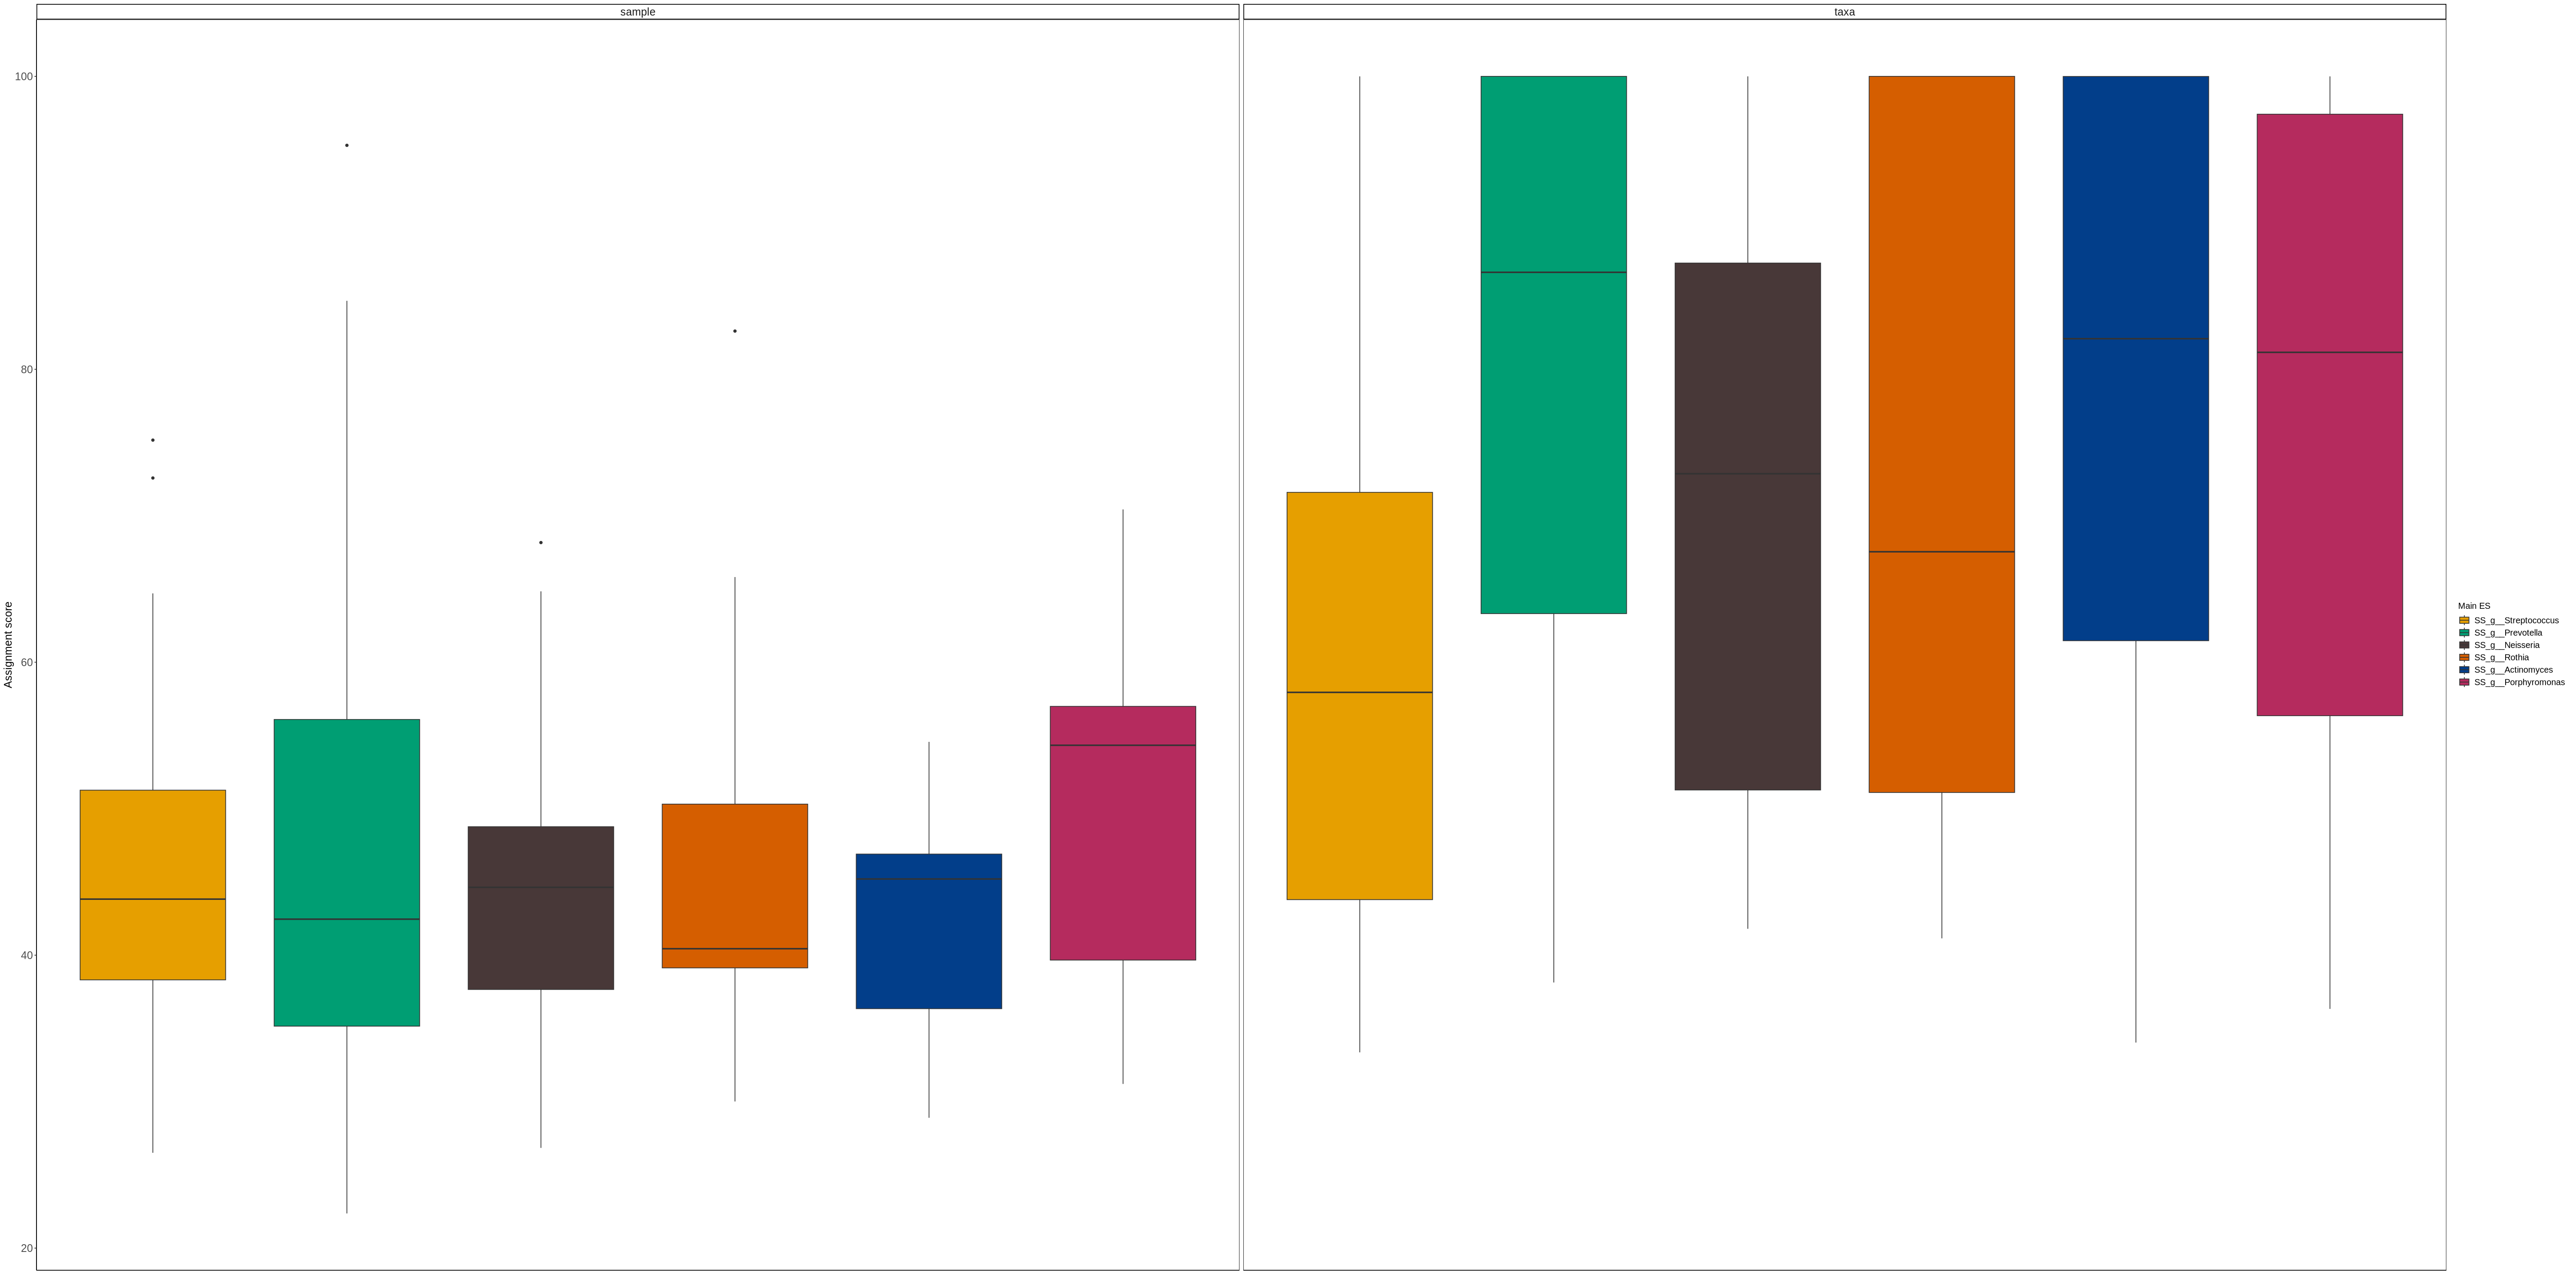

In [623]:
# figure
f = ggplot(all_assign, aes(x=prediction_nm, y=proba, fill=prediction_nm))+
    geom_boxplot()+ #width=0.1, alpha=0.4
    facet_grid(~ type, labeller = label_wrap_gen(width=12)) +
    theme_classic() +
    scale_fill_manual(values=es2Col) + 
    labs(y= "Assignment score", x="", fill="Main ES") +
    theme(panel.grid = element_blank(),
        axis.text.x = element_blank(), #element_text(angle = 45, hjust = 1),
        # legend.position = "none",
        panel.border = element_rect(colour = "black", fill=NA),
        axis.text=element_text(size=15),
        axis.ticks.x = element_blank(),
        legend.text=element_text(size=12),
        legend.title=element_text(size=12),
        axis.title=element_text(size=15),
        strip.text.x=element_text(size=15)
        )

f

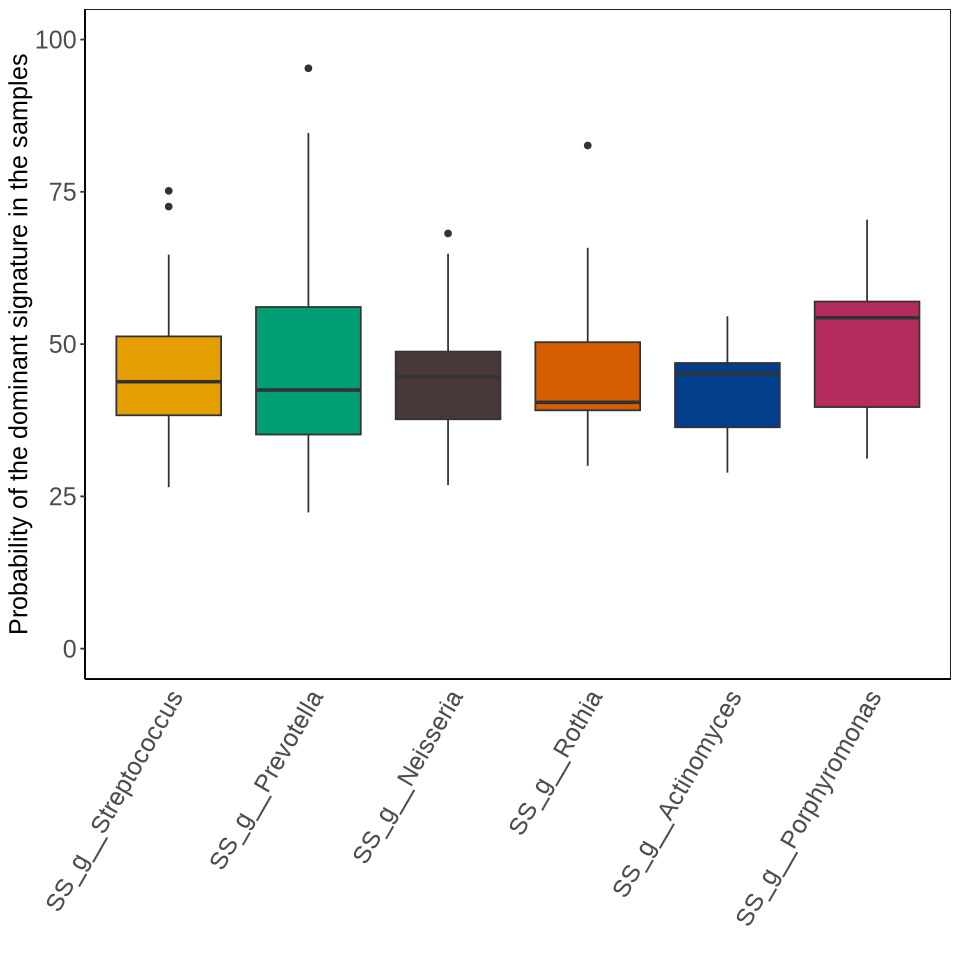

In [628]:
options(repr.plot.width=8, repr.plot.height= 8)
f1 = ggplot(sample_assignments, aes(x=prediction_nm, y=proba, fill=prediction_nm))+
    geom_boxplot()+ #width=0.1, alpha=0.4
    theme_classic() +
    scale_fill_manual(values=es2Col) + 
    labs(y= "Probability of the dominant signature in the samples", x="", fill="Main ES") +
    theme(panel.grid = element_blank(),
        axis.text.x = element_text(angle = 60, hjust = 1),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill=NA),
        axis.text=element_text(size=15),
        axis.ticks.x = element_blank(),
        legend.text=element_text(size=12),
        legend.title=element_text(size=12),
        axis.title=element_text(size=15),
        strip.text.x=element_text(size=15)
        )+
        ylim(0, 100)
f1

Warning message in `[.data.table`(df.outliers, , list(x.outliers = unlist(x.outliers), :
“Item 2 of j's result for group 1 is zero length. This will be filled with 2 NAs to match the longest column in this result. Later groups may have a similar problem but only the first is reported to save filling the warning buffer.”


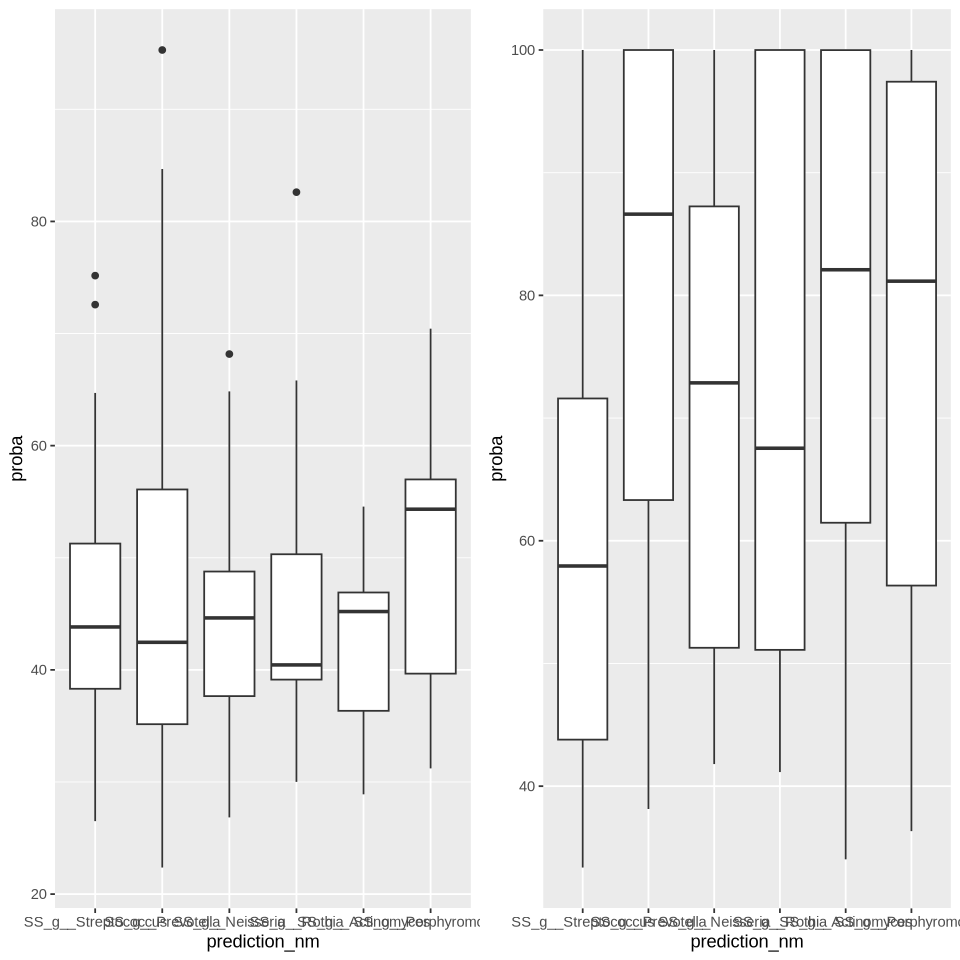

In [475]:
# Step 1. Plot each dimension's boxplot separately:
plot.x = ggplot(sample_assignments, aes(x=prediction_nm, y=proba)) + geom_boxplot()
plot.y = ggplot(assignments, aes(x=prediction_nm, y=proba)) + geom_boxplot()
grid.arrange(plot.x, plot.y, ncol=2)
# Step 2. Obtain the calculated boxplot values (including outliers) in 1 data frame:
plot.x <- layer_data(plot.x)[,1:6]
plot.y <- layer_data(plot.y)[,1:6]
colnames(plot.x) <- paste0("x.", gsub("y", "", colnames(plot.x)))
colnames(plot.y) <- paste0("y.", gsub("y", "", colnames(plot.y)))
df <- cbind(plot.x, plot.y); rm(plot.x, plot.y)
df$category <- sort(unique(assignments$prediction_nm))
# Step 3. Create a separate data frame for outliers:
library(dplyr)
df.outliers <- df %>%
dplyr::select(category, x.middle, x.outliers, y.middle, y.outliers) %>%
data.table::data.table()
df.outliers <- df.outliers[, list(x.outliers = unlist(x.outliers), y.outliers = unlist(y.outliers)), 
                        by = list(category, x.middle, y.middle)]

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


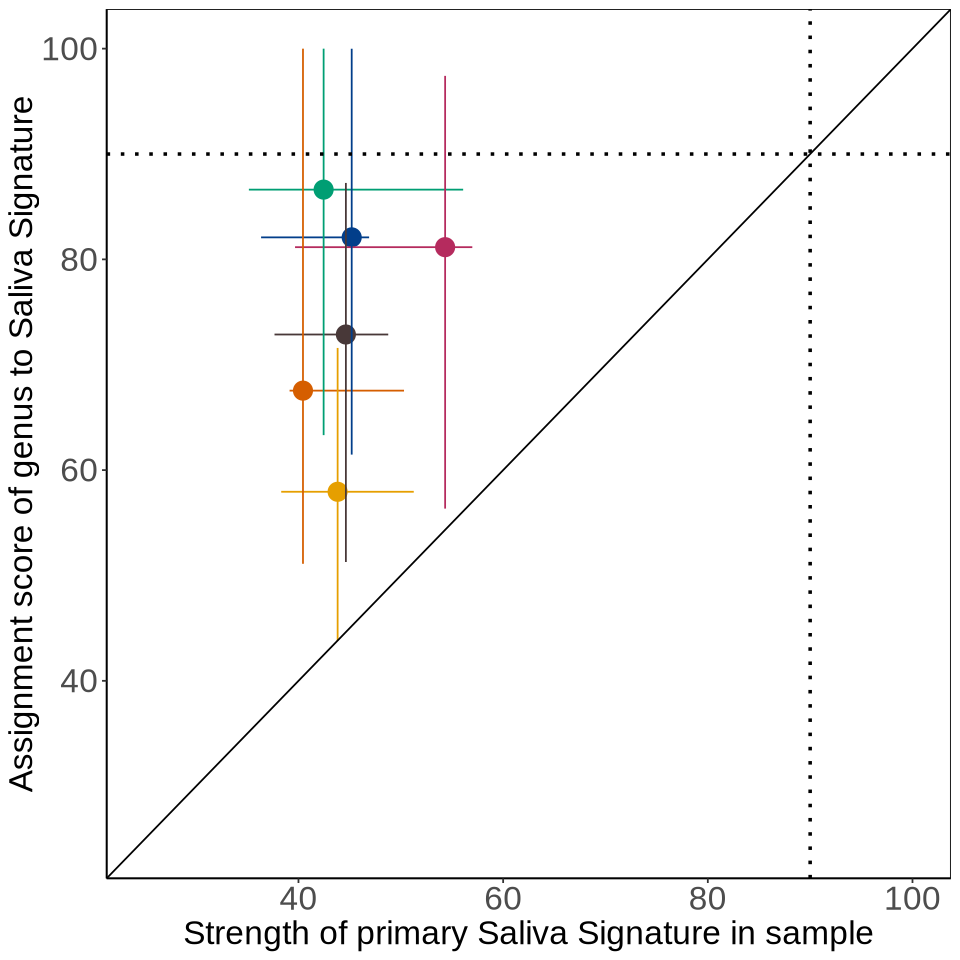

In [476]:
h <- ggplot(df) + geom_point(aes(x = x.middle, y = y.middle, color = category), size = 5) + 
        geom_segment(aes(x = x.lower, y = y.middle, xend = x.upper, yend = y.middle, color = category)) + #whiskers
        geom_segment(aes(x = x.middle, y = y.lower, xend = x.middle, yend = y.upper, color = category)) + #whiskers
            scale_color_manual(values=es2Col) + 
            coord_cartesian(xlim = c(25, 100), ylim = c(25, 100)) +
            xlab("Strength of primary Saliva Signature in sample") +
            ylab("Assignment score of genus to Saliva Signature") +
            theme_classic() +
            theme(panel.grid = element_blank(),
                legend.position = "none",
                panel.border = element_rect(colour = "black", fill=NA),
                axis.text=element_text(size=20),
                legend.text=element_text(size=20),
                legend.title=element_text(size=20),
                axis.title=element_text(size=20),
                strip.text.x=element_text(size=20)
                ) + 
                geom_vline(xintercept = 90, linetype="dotted", color = "black", size=1) + 
                geom_hline(yintercept = 90, linetype="dotted", color = "black", size=1) +
                geom_abline(intercept = 0, slope = 1)
h

In [477]:
all_assign$proba_taxa <- NA  # Initialize the new column with NA values
all_assign$proba_sample <- NA
head(all_assign)

,prediction,prediction_nm,id,proba,type,proba_taxa,proba_sample
,<int>,<fct>,<chr>,<dbl>,<chr>,<lgl>,<lgl>
g__Actinobaculum,4,SS_g__Actinomyces,g__Actinobaculum,34.03322,taxa,NA,NA
g__Actinomyces,5,SS_g__Rothia,g__Actinomyces,80.44003,taxa,NA,NA
g__GGB9835,2,SS_g__Prevotella,g__GGB9835,100.00000,taxa,NA,NA
g__Pauljensenia,5,SS_g__Rothia,g__Pauljensenia,42.19913,taxa,NA,NA
g__Peptidiphaga,3,SS_g__Neisseria,g__Peptidiphaga,44.67984,taxa,NA,NA
g__Schaalia,6,SS_g__Porphyromonas,g__Schaalia,41.97195,taxa,NA,NA


In [478]:
tail(all_assign)

,prediction,prediction_nm,id,proba,type,proba_taxa,proba_sample
,<int>,<fct>,<chr>,<dbl>,<chr>,<lgl>,<lgl>
SRR23512034,3,SS_g__Neisseria,SRR23512034,47.19522,sample,NA,NA
SRR23512222,3,SS_g__Neisseria,SRR23512222,36.81308,sample,NA,NA
SRR23512218,1,SS_g__Streptococcus,SRR23512218,56.57532,sample,NA,NA
SRR23512214,2,SS_g__Prevotella,SRR23512214,44.44639,sample,NA,NA
SRR23512210,1,SS_g__Streptococcus,SRR23512210,39.04333,sample,NA,NA
SRR23512205,2,SS_g__Prevotella,SRR23512205,49.91190,sample,NA,NA


In [479]:
all_assign$proba_taxa <- ifelse(all_assign$type == "taxa", all_assign$proba, NA)
all_assign$proba_sample <- ifelse(all_assign$type == "sample", all_assign$proba, NA)

In [480]:
head(all_assign)

,prediction,prediction_nm,id,proba,type,proba_taxa,proba_sample
,<int>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
g__Actinobaculum,4,SS_g__Actinomyces,g__Actinobaculum,34.03322,taxa,34.03322,NA
g__Actinomyces,5,SS_g__Rothia,g__Actinomyces,80.44003,taxa,80.44003,NA
g__GGB9835,2,SS_g__Prevotella,g__GGB9835,100.00000,taxa,100.00000,NA
g__Pauljensenia,5,SS_g__Rothia,g__Pauljensenia,42.19913,taxa,42.19913,NA
g__Peptidiphaga,3,SS_g__Neisseria,g__Peptidiphaga,44.67984,taxa,44.67984,NA
g__Schaalia,6,SS_g__Porphyromonas,g__Schaalia,41.97195,taxa,41.97195,NA


In [481]:
tail(all_assign)

,prediction,prediction_nm,id,proba,type,proba_taxa,proba_sample
,<int>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
SRR23512034,3,SS_g__Neisseria,SRR23512034,47.19522,sample,NA,47.19522
SRR23512222,3,SS_g__Neisseria,SRR23512222,36.81308,sample,NA,36.81308
SRR23512218,1,SS_g__Streptococcus,SRR23512218,56.57532,sample,NA,56.57532
SRR23512214,2,SS_g__Prevotella,SRR23512214,44.44639,sample,NA,44.44639
SRR23512210,1,SS_g__Streptococcus,SRR23512210,39.04333,sample,NA,39.04333
SRR23512205,2,SS_g__Prevotella,SRR23512205,49.91190,sample,NA,49.91190


In [629]:
summary(all_assign$proba_sample)
summary(all_assign$proba_taxa)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.37   37.54   44.61   46.77   54.56   95.29     222 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  33.37   59.03   80.09   77.09  100.00  100.00     224 

In [631]:
ss <- all_assign[all_assign$type == "sample",]
head(ss)
dim(ss)

,prediction,prediction_nm,id,proba,type,proba_taxa,proba_sample
,<int>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
SRR21765456,5,SS_g__Rothia,SRR21765456,48.80931,sample,NA,48.80931
SRR21765466,3,SS_g__Neisseria,SRR21765466,53.20635,sample,NA,53.20635
SRR21765481,2,SS_g__Prevotella,SRR21765481,82.52448,sample,NA,82.52448
SRR21765484,2,SS_g__Prevotella,SRR21765484,95.29060,sample,NA,95.29060
SRR21765486,1,SS_g__Streptococcus,SRR21765486,31.12288,sample,NA,31.12288
SRR21765496,2,SS_g__Prevotella,SRR21765496,84.67506,sample,NA,84.67506


[1] 224   7

In [632]:
ss_gr <- ss %>%
  mutate(group = case_when(
    startsWith(id, "ERR276") ~ "PRJEB28422",
    startsWith(id, "SRR2176") ~ "PRJNA883997",
    startsWith(id, "ERR1474") ~ "PRJEB14383",
    startsWith(id, "SRR14122") ~ "PRJNA717815",
    startsWith(id, "SRR19117") ~ "PRJNA832909",
      startsWith(id, "SRR2351") ~ "PRJNA934596",
    TRUE ~ "PRJNA48479"
  ))

# Group the dataframe based on the 'group' column
ss_gr <- ss_gr %>% group_by(group)
ss_gr <- ss_gr %>% relocate(group, .after = id)
head(ss_gr,10)
dim(ss_gr)

prediction,prediction_nm,id,group,proba,type,proba_taxa,proba_sample
<int>,<fct>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
5,SS_g__Rothia,SRR21765456,PRJNA883997,48.80931,sample,NA,48.80931
3,SS_g__Neisseria,SRR21765466,PRJNA883997,53.20635,sample,NA,53.20635
2,SS_g__Prevotella,SRR21765481,PRJNA883997,82.52448,sample,NA,82.52448
2,SS_g__Prevotella,SRR21765484,PRJNA883997,95.29060,sample,NA,95.29060
1,SS_g__Streptococcus,SRR21765486,PRJNA883997,31.12288,sample,NA,31.12288
2,SS_g__Prevotella,SRR21765496,PRJNA883997,84.67506,sample,NA,84.67506
6,SS_g__Porphyromonas,ERR2764879,PRJEB28422,57.34901,sample,NA,57.34901
6,SS_g__Porphyromonas,ERR2764880,PRJEB28422,56.98669,sample,NA,56.98669
6,SS_g__Porphyromonas,ERR2764881,PRJEB28422,56.83085,sample,NA,56.83085


[1] 224   8

In [667]:
head(ss_gr,10)
dim(ss_gr)

prediction,prediction_nm,id,group,proba,type,proba_taxa,proba_sample
<int>,<fct>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
5,SS_g__Rothia,SRR21765456,PRJNA883997,48.80931,sample,NA,48.80931
3,SS_g__Neisseria,SRR21765466,PRJNA883997,53.20635,sample,NA,53.20635
2,SS_g__Prevotella,SRR21765481,PRJNA883997,82.52448,sample,NA,82.52448
2,SS_g__Prevotella,SRR21765484,PRJNA883997,95.29060,sample,NA,95.29060
1,SS_g__Streptococcus,SRR21765486,PRJNA883997,31.12288,sample,NA,31.12288
2,SS_g__Prevotella,SRR21765496,PRJNA883997,84.67506,sample,NA,84.67506
6,SS_g__Porphyromonas,ERR2764879,PRJEB28422,57.34901,sample,NA,57.34901
6,SS_g__Porphyromonas,ERR2764880,PRJEB28422,56.98669,sample,NA,56.98669
6,SS_g__Porphyromonas,ERR2764881,PRJEB28422,56.83085,sample,NA,56.83085


[1] 224   8

In [668]:
head(mdmx)
head(mdmx1)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3,age_category
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID,70s&more
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID,50s
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID,50s
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID,40s
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID,70s&more
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID,60s


,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3,age_category,BMI_category
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<chr>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID,70s&more,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID,50s,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID,50s,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID,40s,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID,70s&more,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID,60s,NA


In [669]:
mdmx_prob <- merge(x=mdmx, y=ss_gr, by.x="SmplID" , by.y="id")
head(mdmx_prob)
dim(mdmx_prob)

,SmplID,accession,age,disease_status,sex,race.country,BMI,AgeCat3,age_category,prediction,prediction_nm,group,proba,type,proba_taxa,proba_sample
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<int>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ERR2764877,SAMEA4873316,62,colorectal cancer,F,France,21,colorectal cancer,60s,6,SS_g__Porphyromonas,PRJEB28422,58.05077,sample,NA,58.05077
2,ERR2764878,SAMEA4873316,62,colorectal cancer,F,France,21,colorectal cancer,60s,6,SS_g__Porphyromonas,PRJEB28422,57.71617,sample,NA,57.71617
3,ERR2764879,SAMEA4873316,62,colorectal cancer,F,France,21,colorectal cancer,60s,6,SS_g__Porphyromonas,PRJEB28422,57.34901,sample,NA,57.34901
4,ERR2764880,SAMEA4873316,62,colorectal cancer,F,France,21,colorectal cancer,60s,6,SS_g__Porphyromonas,PRJEB28422,56.98669,sample,NA,56.98669
5,ERR2764881,SAMEA4873316,62,colorectal cancer,F,France,21,colorectal cancer,60s,6,SS_g__Porphyromonas,PRJEB28422,56.83085,sample,NA,56.83085
6,ERR2764909,SAMEA4873324,63,colorectal cancer,M,France,25,colorectal cancer,60s,2,SS_g__Prevotella,PRJEB28422,53.84157,sample,NA,53.84157


[1] 224  16

In [675]:
library(plyr)

data_summary_1 <- function(data, varname, groupnames) {
  summary_func <- function(x, col) {
    c(
      mean = mean(x[[col]], na.rm = TRUE),
        sd = sd(x[[col]], na.rm = TRUE),
      median = median(x[[col]], na.rm = TRUE),
      min = min(x[[col]], na.rm = TRUE),
      max = max(x[[col]], na.rm = TRUE),
      Q1 = quantile(x[[col]], probs = 0.25, na.rm = TRUE),
      Q3 = quantile(x[[col]], probs = 0.75, na.rm = TRUE)
    )
  }
  
  data_sum <- ddply(data, groupnames, .fun = summary_func, varname)
  data_sum <- plyr::rename(data_sum, c("mean" = varname))
  return(data_sum)
}

In [676]:
df_summary_mod_disease <- data_summary_1(mdmx_prob, varname="proba", 
                    groupnames=c("AgeCat3", "prediction_nm"))
(df_summary_mod_disease)

AgeCat3,prediction_nm,proba,sd,median,min,max,Q1.25%,Q3.75%
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
colorectal cancer,SS_g__Prevotella,50.59508,7.528938,53.47172,35.28093,54.70769,52.92595,53.78873
colorectal cancer,SS_g__Neisseria,51.95878,7.950852,48.72483,48.19404,68.17007,48.59696,49.21964
colorectal cancer,SS_g__Rothia,41.00239,5.840428,39.26137,37.41140,59.09319,38.94871,39.76642
colorectal cancer,SS_g__Actinomyces,45.63989,1.734366,45.57813,43.28945,48.87193,44.80440,46.06547
colorectal cancer,SS_g__Porphyromonas,54.99872,9.101441,56.03328,39.50644,68.14732,54.33125,57.71617
COVID,SS_g__Streptococcus,31.12288,NA,31.12288,31.12288,31.12288,31.12288,31.12288
COVID,SS_g__Prevotella,87.49671,6.834819,84.67506,82.52448,95.29060,83.59977,89.98283
COVID,SS_g__Neisseria,53.20635,NA,53.20635,53.20635,53.20635,53.20635,53.20635
COVID,SS_g__Rothia,48.80931,NA,48.80931,48.80931,48.80931,48.80931,48.80931


In [636]:
df_summary_mod <- data_summary_1(ss_gr, varname="proba", 
                    groupnames=c("group", "prediction_nm"))
(df_summary_mod)

group,prediction_nm,proba,median,min,max,Q1.25%,Q3.75%
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PRJEB28422,SS_g__Prevotella,50.59508,53.47172,35.28093,54.70769,52.92595,53.78873
PRJEB28422,SS_g__Neisseria,53.79905,48.81963,48.19404,68.17007,48.60799,57.09681
PRJEB28422,SS_g__Rothia,41.00239,39.26137,37.41140,59.09319,38.94871,39.76642
PRJEB28422,SS_g__Actinomyces,45.63989,45.57813,43.28945,48.87193,44.80440,46.06547
PRJEB28422,SS_g__Porphyromonas,54.99872,56.03328,39.50644,68.14732,54.33125,57.71617
PRJNA717815,SS_g__Prevotella,54.09466,61.25573,33.49551,67.53275,47.37562,64.39424
PRJNA717815,SS_g__Neisseria,26.84301,26.84301,26.84301,26.84301,26.84301,26.84301
PRJNA717815,SS_g__Porphyromonas,49.19152,49.19152,43.28331,55.09973,46.23742,52.14563
PRJNA832909,SS_g__Streptococcus,36.77643,37.23287,26.50806,50.60012,29.48970,42.36475


In [673]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

In [674]:
write.table(df_summary_mod_disease, file = "summary_unhealthy_diseases_sep.txt", sep = "\t", row.names = FALSE)

In [207]:
es2Col

SS_g__Streptococcus    SS_g__Prevotella     SS_g__Neisseria        SS_g__Rothia 
          "#E69F00"           "#009E73"           "#483838"           "#D55E00" 
  SS_g__Actinomyces SS_g__Porphyromonas 
          "#023e8a"           "#b52b5e"

In [484]:
# colors
assigned_sample_color = es2Col[as.character(sample_assignments$prediction_nm)]
names(assigned_sample_color) = sample_assignments$id
es_pointshape=c(0,1,17,3,4,18,6,8,13,9,2)
names(es_pointshape) = all_es_names
sample_shape = es_pointshape[as.character(sample_assignments$prediction_nm)] 
names(sample_shape) = sample_assignments$id 


In [485]:
head(sample_assignments)
head(assignments)

,prediction,prediction_nm,id,proba,type
,<int>,<fct>,<chr>,<dbl>,<chr>
SRR21765456,5,SS_g__Rothia,SRR21765456,48.80931,sample
SRR21765466,3,SS_g__Neisseria,SRR21765466,53.20635,sample
SRR21765481,2,SS_g__Prevotella,SRR21765481,82.52448,sample
SRR21765484,2,SS_g__Prevotella,SRR21765484,95.29060,sample
SRR21765486,1,SS_g__Streptococcus,SRR21765486,31.12288,sample
SRR21765496,2,SS_g__Prevotella,SRR21765496,84.67506,sample


,prediction,prediction_nm,id,proba,type
,<int>,<fct>,<chr>,<dbl>,<chr>
g__Actinobaculum,4,SS_g__Actinomyces,g__Actinobaculum,34.03322,taxa
g__Actinomyces,5,SS_g__Rothia,g__Actinomyces,80.44003,taxa
g__GGB9835,2,SS_g__Prevotella,g__GGB9835,100.00000,taxa
g__Pauljensenia,5,SS_g__Rothia,g__Pauljensenia,42.19913,taxa
g__Peptidiphaga,3,SS_g__Neisseria,g__Peptidiphaga,44.67984,taxa
g__Schaalia,6,SS_g__Porphyromonas,g__Schaalia,41.97195,taxa


In [210]:
unique(mdmx$disease_status)

[1] "COVID"              "colorectal cancer"  "small adenoma"     
[4] "periodontitis"      "PDAC"               "full-term delivery"
[7] "pre-term delivery"  "pre-eclampsia"

In [486]:
agecat2col = c("#7FFFD4", "#FF4040","#0000EE","#458B00","#9A32CD","#FF6EB4", "#CD2990", "#CD6889") #brewer.pal(4, "Pastel1")
names(agecat2col) = c("COVID","colorectal cancer", "periodontitis","small adenoma","PDAC","pre-term delivery", "full-term delivery","pre-eclampsia") #, "adult", "elder")

In [487]:
head(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA


In [488]:
mdmx$AgeCat3 <- as.factor(mdmx$disease_status)
head(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID


In [489]:
datalist = list()
for (nbsig in c(1:es_nb)){
    pcexplained_sample <- data.frame(SmplID=rownames(t(H_norm)), ageCat=mdmx[mdmx$SmplID %in% rownames(t(H_norm)),"AgeCat3"], nb_es = nbsig)
    pcexplained_sample$variance = apply(t(H_norm),1, function(x) sum(sort(x, decreasing = TRUE)[1:nbsig]))
    datalist[[nbsig]] <- pcexplained_sample
}

In [490]:
final_df = do.call(rbind, datalist)
head(final_df)

,SmplID,ageCat,nb_es,variance
,<chr>,<fct>,<int>,<dbl>
1,SRR21765456,COVID,1,48.80931
2,SRR21765466,COVID,1,53.20635
3,SRR21765481,COVID,1,82.52448
4,SRR21765484,COVID,1,95.29060
5,SRR21765486,COVID,1,31.12288
6,SRR21765496,COVID,1,84.67506


In [633]:
# calculate descriptive statistics by group
data_summary <- function(data, varname, groupnames){
    summary_func <- function(x, col){
        c(mean = mean(x[[col]], na.rm=TRUE),
        sd = sd(x[[col]], na.rm=TRUE))
    }
    data_sum<-ddply(data, groupnames, .fun=summary_func,
                    varname)
    data_sum <- plyr::rename(data_sum, c("mean" = varname))
    return(data_sum)
}


In [494]:
df_summary1 <- data_summary(final_df, varname="variance", 
                    groupnames=c("nb_es"))
(df_summary1)

nb_es,variance,sd
<int>,<dbl>,<dbl>
1,46.77383,1.244548e+01
2,73.11389,1.120859e+01
3,87.76835,7.480569e+00
4,96.12980,4.209799e+00
5,99.23749,1.402582e+00
6,100.00000,7.613034e-15


In [492]:
df_summary <- data_summary(final_df, varname="variance", 
                    groupnames=c("nb_es", "ageCat"))
(df_summary)

nb_es,ageCat,variance,sd
<int>,<fct>,<dbl>,<dbl>
1,colorectal cancer,50.03213,9.278678e+00
1,COVID,65.93811,2.512108e+01
1,full-term delivery,44.60306,1.163729e+01
1,PDAC,42.18340,1.181386e+01
1,periodontitis,47.91834,1.604901e+01
1,pre-eclampsia,49.10270,1.509508e+01
1,pre-term delivery,44.58910,8.838011e+00
1,small adenoma,64.84063,NA
2,colorectal cancer,77.93369,8.719563e+00


In [493]:
head(final_df)
dim(final_df)
tail(final_df)

,SmplID,ageCat,nb_es,variance
,<chr>,<fct>,<int>,<dbl>
1,SRR21765456,COVID,1,48.80931
2,SRR21765466,COVID,1,53.20635
3,SRR21765481,COVID,1,82.52448
4,SRR21765484,COVID,1,95.29060
5,SRR21765486,COVID,1,31.12288
6,SRR21765496,COVID,1,84.67506


[1] 1344    4

,SmplID,ageCat,nb_es,variance
,<chr>,<fct>,<int>,<dbl>
1339,SRR23512034,pre-term delivery,6,100
1340,SRR23512222,pre-term delivery,6,100
1341,SRR23512218,pre-term delivery,6,100
1342,SRR23512214,pre-term delivery,6,100
1343,SRR23512210,pre-term delivery,6,100
1344,SRR23512205,pre-term delivery,6,100


In [495]:
# Convertir nb_es et agecat en facteur
df_summary$nb_es=as.factor(df_summary$nb_es)


In [496]:
df_summary$ageCat = factor(df_summary$ageCat, levels =c("COVID","colorectal cancer", "periodontitis","small adenoma","PDAC","pre-term delivery", "full-term delivery","pre-eclampsia")) 
head(df_summary)

,nb_es,ageCat,variance,sd
,<fct>,<fct>,<dbl>,<dbl>
1,1,colorectal cancer,50.03213,9.278678
2,1,COVID,65.93811,25.121080
3,1,full-term delivery,44.60306,11.637288
4,1,PDAC,42.18340,11.813858
5,1,periodontitis,47.91834,16.049015
6,1,pre-eclampsia,49.10270,15.095080


In [497]:
# find the min nb ES enabling to explain more than 90% of the sample
# get rid of rows <90% variance
min_es_nb = final_df[final_df$variance >= 90,]
head(min_es_nb)
dim(min_es_nb)

,SmplID,ageCat,nb_es,variance
,<chr>,<fct>,<int>,<dbl>
4,SRR21765484,COVID,1,95.29060
225,SRR21765456,COVID,2,90.93412
227,SRR21765481,COVID,2,98.12401
228,SRR21765484,COVID,2,99.40022
230,SRR21765496,COVID,2,98.08474
305,SRR19117712,PDAC,2,91.38881


[1] 758   4

In [498]:
# keep the min ES for each sample
library(dplyr)
min_es_nb_min <- min_es_nb %>% group_by(SmplID) %>% slice(which.min(nb_es))
head(min_es_nb_min)
dim(min_es_nb_min)

SmplID,ageCat,nb_es,variance
<chr>,<fct>,<int>,<dbl>
ERR2764877,colorectal cancer,3,90.83793
ERR2764878,colorectal cancer,3,90.32196
ERR2764879,colorectal cancer,3,90.96368
ERR2764880,colorectal cancer,3,90.59833
ERR2764881,colorectal cancer,4,97.88646
ERR2764909,colorectal cancer,3,97.25371


[1] 224   4

In [499]:
min_es_nb_min$nb_es = as.factor(min_es_nb_min$nb_es)

In [500]:
head(min_es_nb_min)

SmplID,ageCat,nb_es,variance
<chr>,<fct>,<fct>,<dbl>
ERR2764877,colorectal cancer,3,90.83793
ERR2764878,colorectal cancer,3,90.32196
ERR2764879,colorectal cancer,3,90.96368
ERR2764880,colorectal cancer,3,90.59833
ERR2764881,colorectal cancer,4,97.88646
ERR2764909,colorectal cancer,3,97.25371


In [501]:
# get the proportion of samples in each nb_es
min_es_summary <- as.data.frame(min_es_nb_min %>%
                    group_by(ageCat, nb_es) %>%
                    dplyr::summarise(n = n()) %>%
                    mutate(freq = n / sum(n)))

`summarise()` has grouped output by 'ageCat'. You can override using the `.groups` argument.


In [503]:
min_es_summary
#write.table(min_es_summary, file = "min-es-summary-noncontrol.txt", sep = "\t", row.names = FALSE)

ageCat,nb_es,n,freq
<fct>,<fct>,<int>,<dbl>
colorectal cancer,3,28,0.50000000
colorectal cancer,4,23,0.41071429
colorectal cancer,5,5,0.08928571
COVID,1,1,0.16666667
COVID,2,3,0.50000000
COVID,3,1,0.16666667
COVID,4,1,0.16666667
full-term delivery,2,1,0.02631579
full-term delivery,3,14,0.36842105


In [504]:
min_es_summary_all <- as.data.frame(min_es_nb_min %>%
                    group_by(nb_es) %>%
                    dplyr::summarise(n = n()) %>%
                    mutate(freq = n / sum(n)))

In [505]:
min_es_summary_all

nb_es,n,freq
<fct>,<int>,<dbl>
1,1,0.004464286
2,11,0.049107143
3,82,0.366071429
4,109,0.486607143
5,21,0.093750000


In [506]:
# calculate the frequency out of the total nb of sample by ageCat
min_es_summary$freq_ac = 100 * ave(min_es_summary$n, min_es_summary$ageCat, FUN=function(x)x/sum(x))


In [507]:
min_es_summary

ageCat,nb_es,n,freq,freq_ac
<fct>,<fct>,<int>,<dbl>,<dbl>
colorectal cancer,3,28,0.50000000,50.000000
colorectal cancer,4,23,0.41071429,41.071429
colorectal cancer,5,5,0.08928571,8.928571
COVID,1,1,0.16666667,16.666667
COVID,2,3,0.50000000,50.000000
COVID,3,1,0.16666667,16.666667
COVID,4,1,0.16666667,16.666667
full-term delivery,2,1,0.02631579,2.631579
full-term delivery,3,14,0.36842105,36.842105


In [508]:
head(sample_assignments)

,prediction,prediction_nm,id,proba,type
,<int>,<fct>,<chr>,<dbl>,<chr>
SRR21765456,5,SS_g__Rothia,SRR21765456,48.80931,sample
SRR21765466,3,SS_g__Neisseria,SRR21765466,53.20635,sample
SRR21765481,2,SS_g__Prevotella,SRR21765481,82.52448,sample
SRR21765484,2,SS_g__Prevotella,SRR21765484,95.29060,sample
SRR21765486,1,SS_g__Streptococcus,SRR21765486,31.12288,sample
SRR21765496,2,SS_g__Prevotella,SRR21765496,84.67506,sample


In [509]:
sp_assignments <- sample_assignments
sp_assignments$"agecat" <- mdmx[match(rownames(sp_assignments), mdmx$SmplID), "AgeCat3"]
dim(sp_assignments)
head(sp_assignments)

[1] 224   6

,prediction,prediction_nm,id,proba,type,agecat
,<int>,<fct>,<chr>,<dbl>,<chr>,<fct>
SRR21765456,5,SS_g__Rothia,SRR21765456,48.80931,sample,COVID
SRR21765466,3,SS_g__Neisseria,SRR21765466,53.20635,sample,COVID
SRR21765481,2,SS_g__Prevotella,SRR21765481,82.52448,sample,COVID
SRR21765484,2,SS_g__Prevotella,SRR21765484,95.29060,sample,COVID
SRR21765486,1,SS_g__Streptococcus,SRR21765486,31.12288,sample,COVID
SRR21765496,2,SS_g__Prevotella,SRR21765496,84.67506,sample,COVID


In [510]:
head(mdmx)
dim(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID


[1] 224   8

In [233]:
#sp_assignments$"agecat" <- mdmx[match(rownames(sp_assignments), mdmx$SmplID), "AgeCat3"]

In [642]:
head(sp_assignments)

,prediction,prediction_nm,id,proba,type,agecat
,<int>,<fct>,<chr>,<dbl>,<chr>,<fct>
SRR21765456,5,SS_g__Rothia,SRR21765456,48.80931,sample,COVID
SRR21765466,3,SS_g__Neisseria,SRR21765466,53.20635,sample,COVID
SRR21765481,2,SS_g__Prevotella,SRR21765481,82.52448,sample,COVID
SRR21765484,2,SS_g__Prevotella,SRR21765484,95.29060,sample,COVID
SRR21765486,1,SS_g__Streptococcus,SRR21765486,31.12288,sample,COVID
SRR21765496,2,SS_g__Prevotella,SRR21765496,84.67506,sample,COVID


In [643]:
main_es_summary <- as.data.frame(sp_assignments %>%
                    group_by(agecat, prediction_nm) %>%
                    dplyr::summarise(n = n()) %>%
                    mutate(freq = n / sum(n)))
(main_es_summary)
#write.table(main_es_summary, file = "main-es_name-summary-noncontrol.txt", sep = "\t", row.names = FALSE)

`summarise()` has grouped output by 'agecat'. You can override using the `.groups` argument.


agecat,prediction_nm,n,freq
<fct>,<fct>,<int>,<dbl>
colorectal cancer,SS_g__Prevotella,6,0.10714286
colorectal cancer,SS_g__Neisseria,6,0.10714286
colorectal cancer,SS_g__Rothia,12,0.21428571
colorectal cancer,SS_g__Actinomyces,7,0.12500000
colorectal cancer,SS_g__Porphyromonas,25,0.44642857
COVID,SS_g__Streptococcus,1,0.16666667
COVID,SS_g__Prevotella,3,0.50000000
COVID,SS_g__Neisseria,1,0.16666667
COVID,SS_g__Rothia,1,0.16666667


In [645]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

In [647]:
main_es_summary11 <- as.data.frame(sp_assignments %>%
                    group_by(prediction_nm) %>%
                    dplyr::summarise(n = n()) %>%
                    mutate(freq = n / sum(n)))
(main_es_summary11)
write.table(main_es_summary11, file = "main-es_name-summary-noncontrol_allgen.txt", sep = "\t", row.names = FALSE)

prediction_nm,n,freq
<fct>,<int>,<dbl>
SS_g__Streptococcus,54,0.24107143
SS_g__Prevotella,50,0.22321429
SS_g__Neisseria,26,0.11607143
SS_g__Rothia,27,0.12053571
SS_g__Actinomyces,18,0.08035714
SS_g__Porphyromonas,49,0.21875000


In [515]:
head(main_es_summary)
dim(main_es_summary)

,agecat,prediction_nm,n,freq
,<fct>,<fct>,<int>,<dbl>
1,colorectal cancer,SS_g__Prevotella,6,0.1071429
2,colorectal cancer,SS_g__Neisseria,6,0.1071429
3,colorectal cancer,SS_g__Rothia,12,0.2142857
4,colorectal cancer,SS_g__Actinomyces,7,0.1250000
5,colorectal cancer,SS_g__Porphyromonas,25,0.4464286
6,COVID,SS_g__Streptococcus,1,0.1666667


[1] 31  4

In [516]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

In [517]:
# write.table(main_es_summary, file = "mainSS_nonhealthy.txt", sep = "\t", row.names = FALSE)
  
 
head(read.table("main-es_name-summary-noncontrol.txt", header = TRUE, sep = "\t"))
dim(read.table("main-es_name-summary-noncontrol.txt", header = TRUE, sep = "\t"))

,agecat,prediction_nm,n,freq
,<chr>,<chr>,<int>,<dbl>
1,colorectal cancer,SS_g__Prevotella,6,0.1071429
2,colorectal cancer,SS_g__Neisseria,6,0.1071429
3,colorectal cancer,SS_g__Rothia,12,0.2142857
4,colorectal cancer,SS_g__Actinomyces,7,0.1250000
5,colorectal cancer,SS_g__Porphyromonas,25,0.4464286
6,COVID,SS_g__Streptococcus,1,0.1666667


[1] 31  4

In [518]:
head(min_es_nb_min)

SmplID,ageCat,nb_es,variance
<chr>,<fct>,<fct>,<dbl>
ERR2764877,colorectal cancer,3,90.83793
ERR2764878,colorectal cancer,3,90.32196
ERR2764879,colorectal cancer,3,90.96368
ERR2764880,colorectal cancer,3,90.59833
ERR2764881,colorectal cancer,4,97.88646
ERR2764909,colorectal cancer,3,97.25371


In [520]:
unique(min_es_nb_min$nb_es)
table(min_es_nb_min$nb_es)

[1] 3 4 5 2 1
Levels: 1 2 3 4 5


  1   2   3   4   5 
  1  11  82 109  21 

In [521]:
head(mdmx)
unique(mdmx$age)
table(mdmx$age)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID


[1] 91 54 50 49 73 65 62 63 80 44 60 55 79 64 69 68 76 53 67 NA 70 32 31 34 24
[26] 27 30 22 38 25 19 26 36 28 33 21 39 37 35 20 23


19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 44 49 50 53 54 55 
 4  4  8  6  4  6  7  9  7  5  7  7  5  5  1  4  8  4  6  2  1  1  1  5  2  5 
60 62 63 64 65 67 68 69 70 73 76 79 80 91 
 1  5  6  5  1  5  5 10 46  6  1  1  1  1 

In [522]:
dim(mdmx)

[1] 224   8

In [523]:
# Create a new column "age_category" based on conditions using case_when
mdmx <- mdmx %>%
  mutate(age_category = case_when(
    age < 20 ~ "19",
    age >= 20 & age < 30 ~ "20s",
    age >= 30 & age < 40 ~ "30s",
    age >= 40 & age < 50 ~ "40s",
    age >= 50 & age < 60 ~ "50s",
      age >= 60 & age < 70 ~ "60s",
      age >= 70 ~ "70s&more",
    TRUE ~ NA_character_  # Default value if none of the conditions are met
  ))
head(mdmx)

,accession,SmplID,age,disease_status,sex,race.country,BMI,AgeCat3,age_category
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>
1,SAMN31005893,SRR21765456,91,COVID,F,white,NA,COVID,70s&more
2,SAMN31005884,SRR21765466,54,COVID,M,white,NA,COVID,50s
3,SAMN31005870,SRR21765481,50,COVID,M,white,NA,COVID,50s
4,SAMN31005814,SRR21765484,49,COVID,F,white,NA,COVID,40s
5,SAMN31005866,SRR21765486,73,COVID,F,white,NA,COVID,70s&more
6,SAMN31005857,SRR21765496,65,COVID,M,black,NA,COVID,60s


In [524]:
unique(mdmx$sex)

[1] "F" "M" "0"

In [525]:
mdmx$age_category <- as.factor(mdmx$age_category)

In [527]:
head(min_es_nb_min)

SmplID,ageCat,nb_es,variance
<chr>,<fct>,<fct>,<dbl>
ERR2764877,colorectal cancer,3,90.83793
ERR2764878,colorectal cancer,3,90.32196
ERR2764879,colorectal cancer,3,90.96368
ERR2764880,colorectal cancer,3,90.59833
ERR2764881,colorectal cancer,4,97.88646
ERR2764909,colorectal cancer,3,97.25371


In [528]:
min_es_nb_min$Age <- mdmx[match(min_es_nb_min$SmplID, mdmx$SmplID), "age_category"]
min_es_nb_min$sex <- mdmx[match(min_es_nb_min$SmplID, mdmx$SmplID), "sex"]
head(min_es_nb_min)

SmplID,ageCat,nb_es,variance,Age,sex
<chr>,<fct>,<fct>,<dbl>,<fct>,<chr>
ERR2764877,colorectal cancer,3,90.83793,60s,F
ERR2764878,colorectal cancer,3,90.32196,60s,F
ERR2764879,colorectal cancer,3,90.96368,60s,F
ERR2764880,colorectal cancer,3,90.59833,60s,F
ERR2764881,colorectal cancer,4,97.88646,60s,F
ERR2764909,colorectal cancer,3,97.25371,60s,M


In [531]:
summary(min_es_nb_min$nb_es)
table(min_es_nb_min$ageCat)

1   2   3   4   5 
  1  11  82 109  21


 colorectal cancer              COVID full-term delivery               PDAC 
                56                  6                 38                 46 
     periodontitis      pre-eclampsia  pre-term delivery      small adenoma 
                 6                 28                 43                  1 

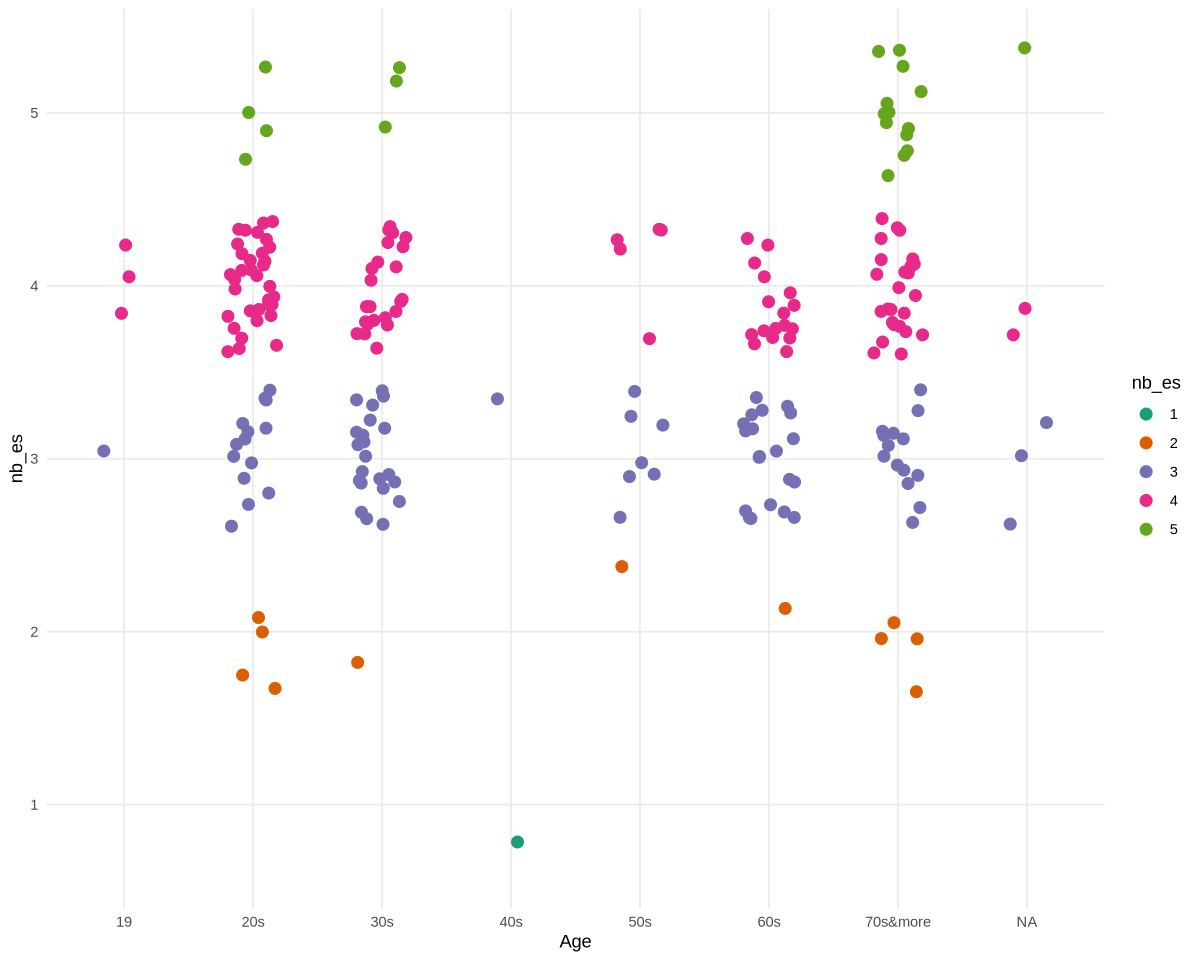

In [529]:
options(repr.plot.width=10, repr.plot.height= 8)
ggplot(data = min_es_nb_min, aes(x = Age, y = nb_es, fill = nb_es, col = nb_es )) +  #shape = ageCat
  #geom_boxplot(outlier.shape = 16, alpha = 0.5) + 
  geom_jitter(position = position_jitter(0.2), alpha = 1, size = 3 ) +
  scale_color_brewer(palette = "Dark2") +
  scale_fill_brewer(palette = "Dark2") +
  #scale_shape_manual(values = c("COVID"=0,"colorectal cancer"= 16 , "periodontitis"= 15, "pre-eclampsia" = 13, "pre-term delivery" = 20 , "full-term delivery"= 4)) +
  theme_minimal()

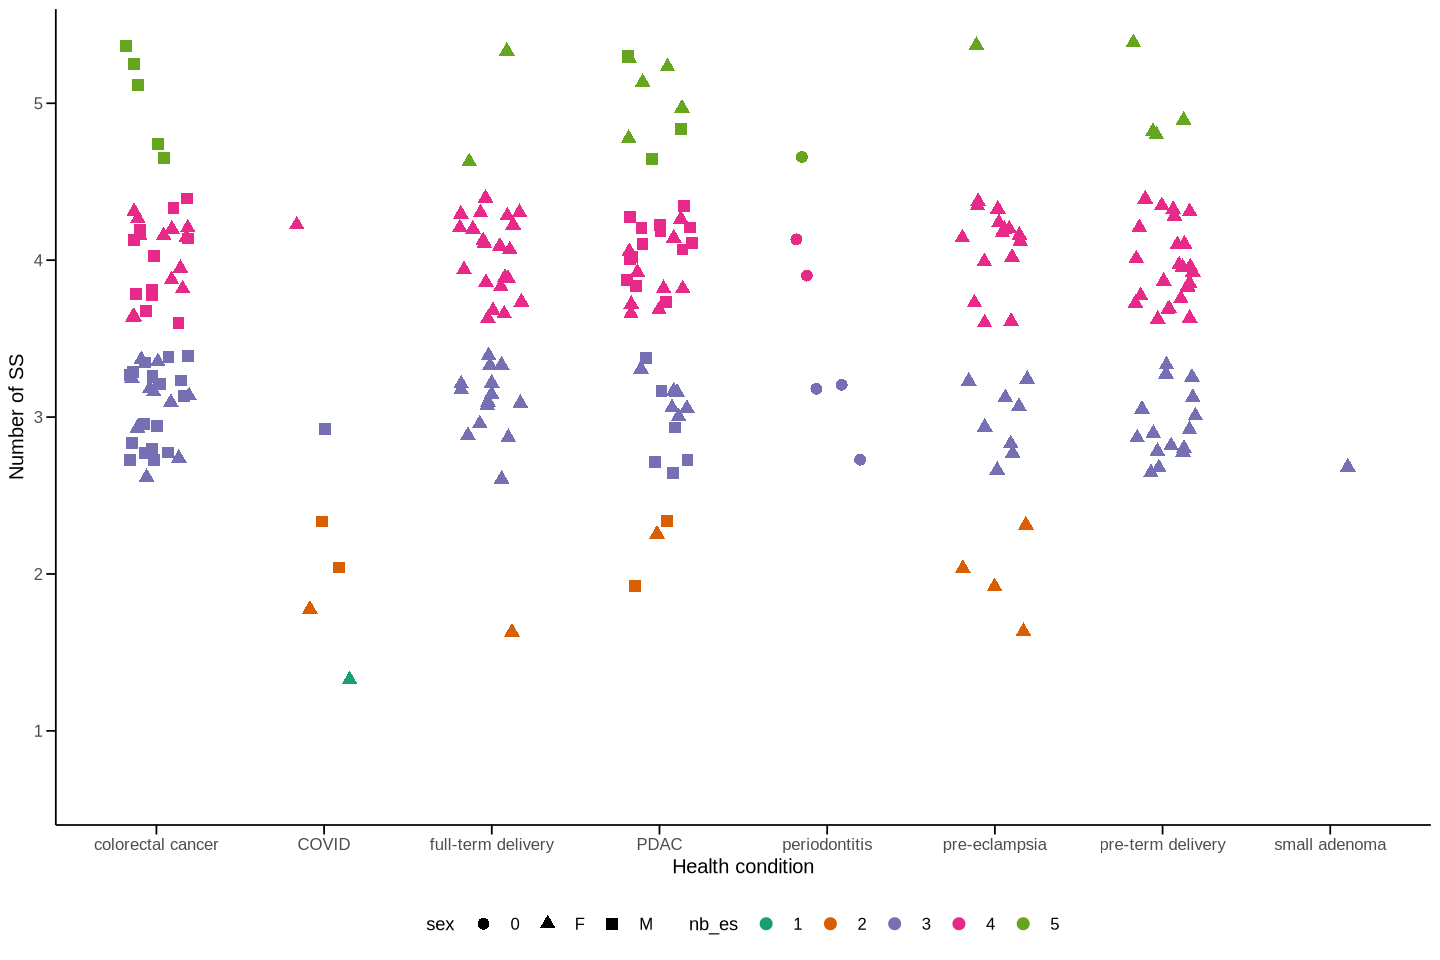

In [543]:
options(repr.plot.width=12, repr.plot.height= 8)
ggplot(data = min_es_nb_min, aes(x = ageCat, y = nb_es, fill = nb_es, col = nb_es , shape = sex)) +
  #geom_boxplot(outlier.shape = 16, alpha = 0.5) + 
  geom_jitter(position = position_jitter(0.2), alpha = 1, size = 3 ) +
  scale_color_brewer(palette = "Dark2") +
  scale_fill_brewer(palette = "Dark2") +
  #scale_shape_manual(values = c("19" = 13, "early20s" = 20, "late20s" = 18 , "early30s" = 0 ,"late30s"= 2)) +
  theme_minimal() +
theme(legend.position = "bottom", # Change legend position to bottom
    legend.box = "horizontal", # Display legend items horizontally
    legend.direction = "horizontal", # Align legend items horizontally
    legend.key.size = unit(1.5, "lines"), # Adjust the size of legend key
    legend.text = element_text(size = 10), # Modify legend text size
    axis.title = element_text(size = 12), # Modify axis title size
    axis.text = element_text(size = 10), # Modify axis text size
    axis.line = element_line(color = "black"), # Modify axis line color
    axis.ticks = element_line(color = "black"), # Modify axis tick color
    axis.ticks.length = unit(0.2, "cm"), # Adjust the length of axis ticks
    axis.ticks.margin = unit(0.1, "cm"), # Adjust the margin of axis ticks
    panel.grid.major = element_blank(), # Remove major gridlines
    panel.grid.minor = element_blank()) +
labs( x = "Health condition", # Modify x-axis label
    y = "Number of SS") # Modify y-axis label


In [544]:
getwd()

[1] "/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non"

In [545]:
head(df_summary)

,nb_es,ageCat,variance,sd
,<fct>,<fct>,<dbl>,<dbl>
1,1,colorectal cancer,50.03213,9.278678
2,1,COVID,65.93811,25.121080
3,1,full-term delivery,44.60306,11.637288
4,1,PDAC,42.18340,11.813858
5,1,periodontitis,47.91834,16.049015
6,1,pre-eclampsia,49.10270,15.095080


Warning message in geom_point(lwd = 3):
“Ignoring unknown parameters: `linewidth`”


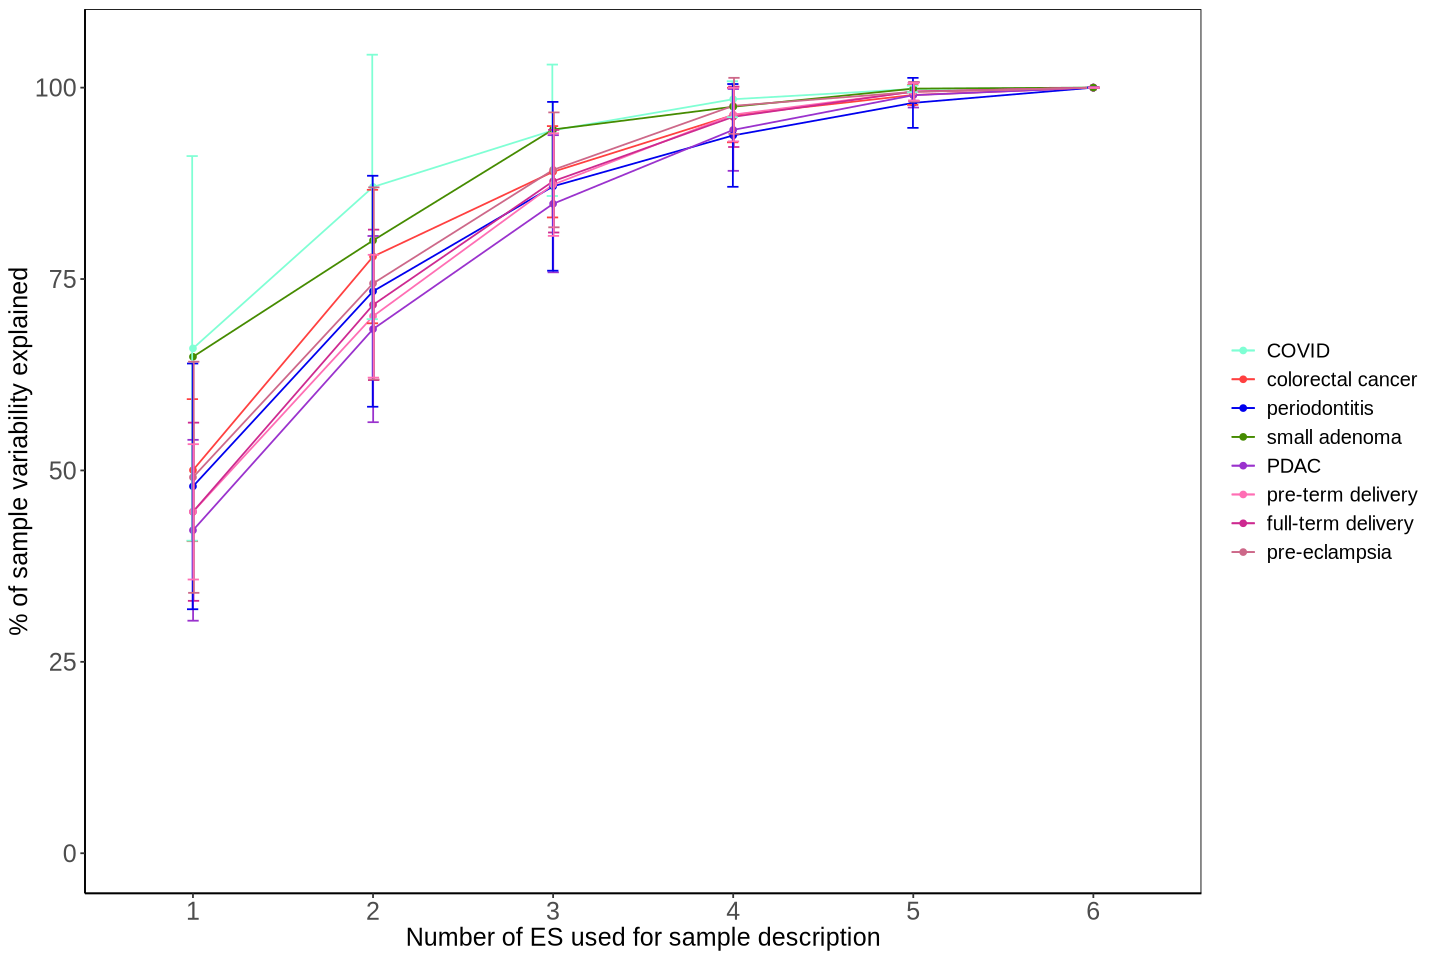

In [546]:
p = ggplot(df_summary, aes(x=nb_es, y=variance, group=ageCat, color=ageCat)) + 
    geom_line()+
    geom_point(lwd=3)+
    geom_errorbar(aes(ymin=variance-sd, ymax=variance+sd), width=.5,
                position=position_dodge(0.01)) +
    scale_color_manual(values=agecat2col) +
    labs(y= "% of sample variability explained", x="Number of ES used for sample description") + #, fill="Number of ES considered") +
    ylim(0, 105) +
    theme_classic() +
    theme(panel.grid = element_blank(),
        panel.border = element_rect(colour = "black", fill=NA),
        axis.text=element_text(size=15),
        legend.text=element_text(size=12),
        legend.title=element_blank(),
        axis.title=element_text(size=15),
        strip.text.x=element_text(size=15)
          )


p


In [ ]:
pdf("variability_sample_explained_nb_ES.pdf", width = 14, height = 12)
print(p)
dev.off()

In [547]:
# PcoA plot coloured by the number of needed ES by sample to reach 90% of variance
es_nb_col = c("#233d4d","#fe7f2d","#fcca46","#a1c181","#d1b3c4","#39a9db","#881b48","#48a9a6","#2d1012","#fe72a3")
names(es_nb_col) = c(1:10)
min_es_by_sp = min_es_nb_min$nb_es
names(min_es_by_sp) = min_es_nb_min$SmplID
min_es_by_sp_col = es_nb_col[min_es_by_sp]
names(min_es_by_sp_col) = names(min_es_by_sp)

In [ ]:
getwd()

In [ ]:
setwd("/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/output_reapply_healthy_SS_non/test")

In [550]:
# PCoA plot coloured by main ES. Show only the samples accurately explained by n ES.
if (es_nb >= 6){
    pdf("pcoa_ab_samples_subset_lg_6k_noncontrol-224.pdf", width = 18, height = 18 ) 
    par(mfrow=c(2,2),mar = c(4,4,4,4))
    # title('PCoA (bray-curtis distance)', outer = TRUE)
    for (i in c(1:6)){
        # all colors gray
        new_colors_sp = assigned_sample_color
        new_colors_sp[names(assigned_sample_color)] = "#A9A9A9"
        # put colors to the samples we want to keep
        selected_samples = as.data.frame(subset(min_es_nb_min, nb_es==i))[,"SmplID"]
        new_colors_sp[names(new_colors_sp) %in% selected_samples] = assigned_sample_color[names(new_colors_sp) %in% selected_samples]
        ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main=paste0(i,"-SS samples")) #paste0("Samples described by ", i, " ES")
        points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = new_colors_sp[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))], pch=sample_shape, cex=1)
        abline(h=0, lty=3)
        abline(v=0, lty=3)
        legend("topleft", legend=ordered_es_names, pch=es_pointshape[ordered_es_names], col=es2Col[ordered_es_names])
    }
    
    dev.off()
}

species scores not available

species scores not available

species scores not available

species scores not available

species scores not available

species scores not available



png 
  2

In [551]:
if (es_nb >= 6){
    pdf("pcoa_ab_samples_subset_lg_percent_6k_trial_noncontrol_224.pdf", width = 18, height = 18 ) 
    par(mfrow=c(2,2),mar = c(4,4,4,4))
    
    for (i in c(1:6)){
        new_colors_sp <- assigned_sample_color
        new_colors_sp[names(assigned_sample_color)] <- "#A9A9A9"
        
        selected_samples <- as.data.frame(subset(min_es_nb_min, nb_es==i))[,"SmplID"]
        new_colors_sp[names(new_colors_sp) %in% selected_samples] <- assigned_sample_color[names(new_colors_sp) %in% selected_samples]
        
        ordiplot(scores(mx_norm.b.pcoa, choices=c(1,2)), type="none", main=paste0(i,"-SS samples")) 
        points(scores(mx_norm.b.pcoa, choices=c(1,2)), col = new_colors_sp[rownames(scores(mx_norm.b.pcoa, choices=c(1,2)))], pch=sample_shape, cex=1.8)
        abline(h=0, lty=3)
        abline(v=0, lty=3)
        
        # Calculate the percentage of selected points
        percentage_selected <- round(length(selected_samples) / nrow(min_es_nb_min) * 100, 2)
        
        # Add legend with cluster names
        legend("topleft", legend=ordered_es_names, pch=es_pointshape[ordered_es_names], col=es2Col[ordered_es_names], cex= 1.1)
        
        # Add text annotation for percentage of selected points
        text(x = max(mx_norm.b.pcoa$points[, 1]), y = max(mx_norm.b.pcoa$points[, 2]), labels = paste("Selected samples explainedby either 1-6 clusters:", percentage_selected, "%"), pos = 2 , cex= 1.2)
    }
    
    dev.off()
}

species scores not available

species scores not available

species scores not available

species scores not available

species scores not available

species scores not available



png 
  2